In [20]:
#Importation des bibliothèques

import fonctions as f


In [6]:
df = f.pd.read_csv("data.csv", index_col=0)
df

,DATE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,TNSOL,...,BRUME,ECLAIR,ETPMON,ETPGRILLE,UV,TMERMAX,TMERMIN,HNEIGEF,NEIGETOTX,NEIGETOT06
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,20220105,"2,6",NaN,"-0,4",1759.0,"3,4",1217.0,"0,9","1,50",NaN,...,NaN,NaN,NaN,"0,4",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220106,"0,0",NaN,"-2,5",1746.0,"4,3",1327.0,"-0,6","0,90",NaN,...,NaN,NaN,NaN,"0,6",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220107,"10,0",NaN,"-6,9",718.0,"1,6",2229.0,"-1,2","-2,65",NaN,...,NaN,NaN,NaN,"0,0",NaN,NaN,NaN,NaN,0.0,NaN
1014002,20220108,"13,2",NaN,"-0,7",733.0,"6,3",2319.0,"2,4","2,80",NaN,...,NaN,NaN,NaN,"0,5",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20220109,"7,6",NaN,"0,4",737.0,"2,2",601.0,"1,8","1,30",NaN,...,NaN,NaN,NaN,"0,1",NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014002,20241027,"0,2",NaN,"5,7",633.0,"21,9",1354.0,"13,3","13,80",NaN,...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20241028,"0,2",NaN,"6,7",546.0,"21,9",1236.0,"12,6","14,30",NaN,...,NaN,NaN,NaN,"1,3",NaN,NaN,NaN,NaN,0.0,0.0
1014002,20241029,"0,4",NaN,"6,4",2251.0,"21,7",1236.0,"12,0","14,05",NaN,...,NaN,NaN,NaN,"1,1",NaN,NaN,NaN,NaN,0.0,0.0


On commence par supprimer les doublons de notre data-frame

In [7]:
#Suppression des doublons
df = df.drop_duplicates()

## Vue d'ensemble sur les variables ##

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 1014002 to 1014002
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        1022 non-null   int64  
 1   RR          1002 non-null   object 
 2   DRR         0 non-null      float64
 3   TN          1001 non-null   object 
 4   HTN         984 non-null    float64
 5   TX          1002 non-null   object 
 6   HTX         987 non-null    float64
 7   TM          1001 non-null   object 
 8   TMNX        1001 non-null   object 
 9   TNSOL       0 non-null      float64
 10  TN50        0 non-null      float64
 11  DG          996 non-null    float64
 12  TAMPLI      1001 non-null   object 
 13  TNTXM       1001 non-null   object 
 14  PMERM       0 non-null      float64
 15  PMERMIN     0 non-null      float64
 16  FFM         1001 non-null   object 
 17  FXI         1001 non-null   object 
 18  DXI         985 non-null    float64
 19  HXI         984 non-nul

On constate qu'il y'a des variables quantitatives ( de type int et float) et des variables classés de type object, soit qualitatives.En réalité ces variables de type object contiennent des réels mais sont juste classé sous type object car les points dans les nombres décimaux ont été remplacés par la virgule. Mais pour le moment, nous allons le conserver ainsi pour une meilleure analyse (surtout le traitement des valeurs manquantes).

## Détection des valeurs manquantes ##

DATE---------------------------------------------- 0.0
DRR----------------------------------------------- 1.0
HTN----------------------------------------------- 0.03718199608610567
HTX----------------------------------------------- 0.03424657534246575
TNSOL--------------------------------------------- 1.0
TN50---------------------------------------------- 1.0
DG------------------------------------------------ 0.025440313111545987
PMERM--------------------------------------------- 1.0
PMERMIN------------------------------------------- 1.0
DXI----------------------------------------------- 0.036203522504892366
HXI----------------------------------------------- 0.03718199608610567
DXY----------------------------------------------- 0.036203522504892366
HXY----------------------------------------------- 0.03718199608610567
FF2M---------------------------------------------- 1.0
FXI2---------------------------------------------- 1.0
DXI2---------------------------------------------- 1.0
HXI2-

<Axes: ylabel='POSTE'>

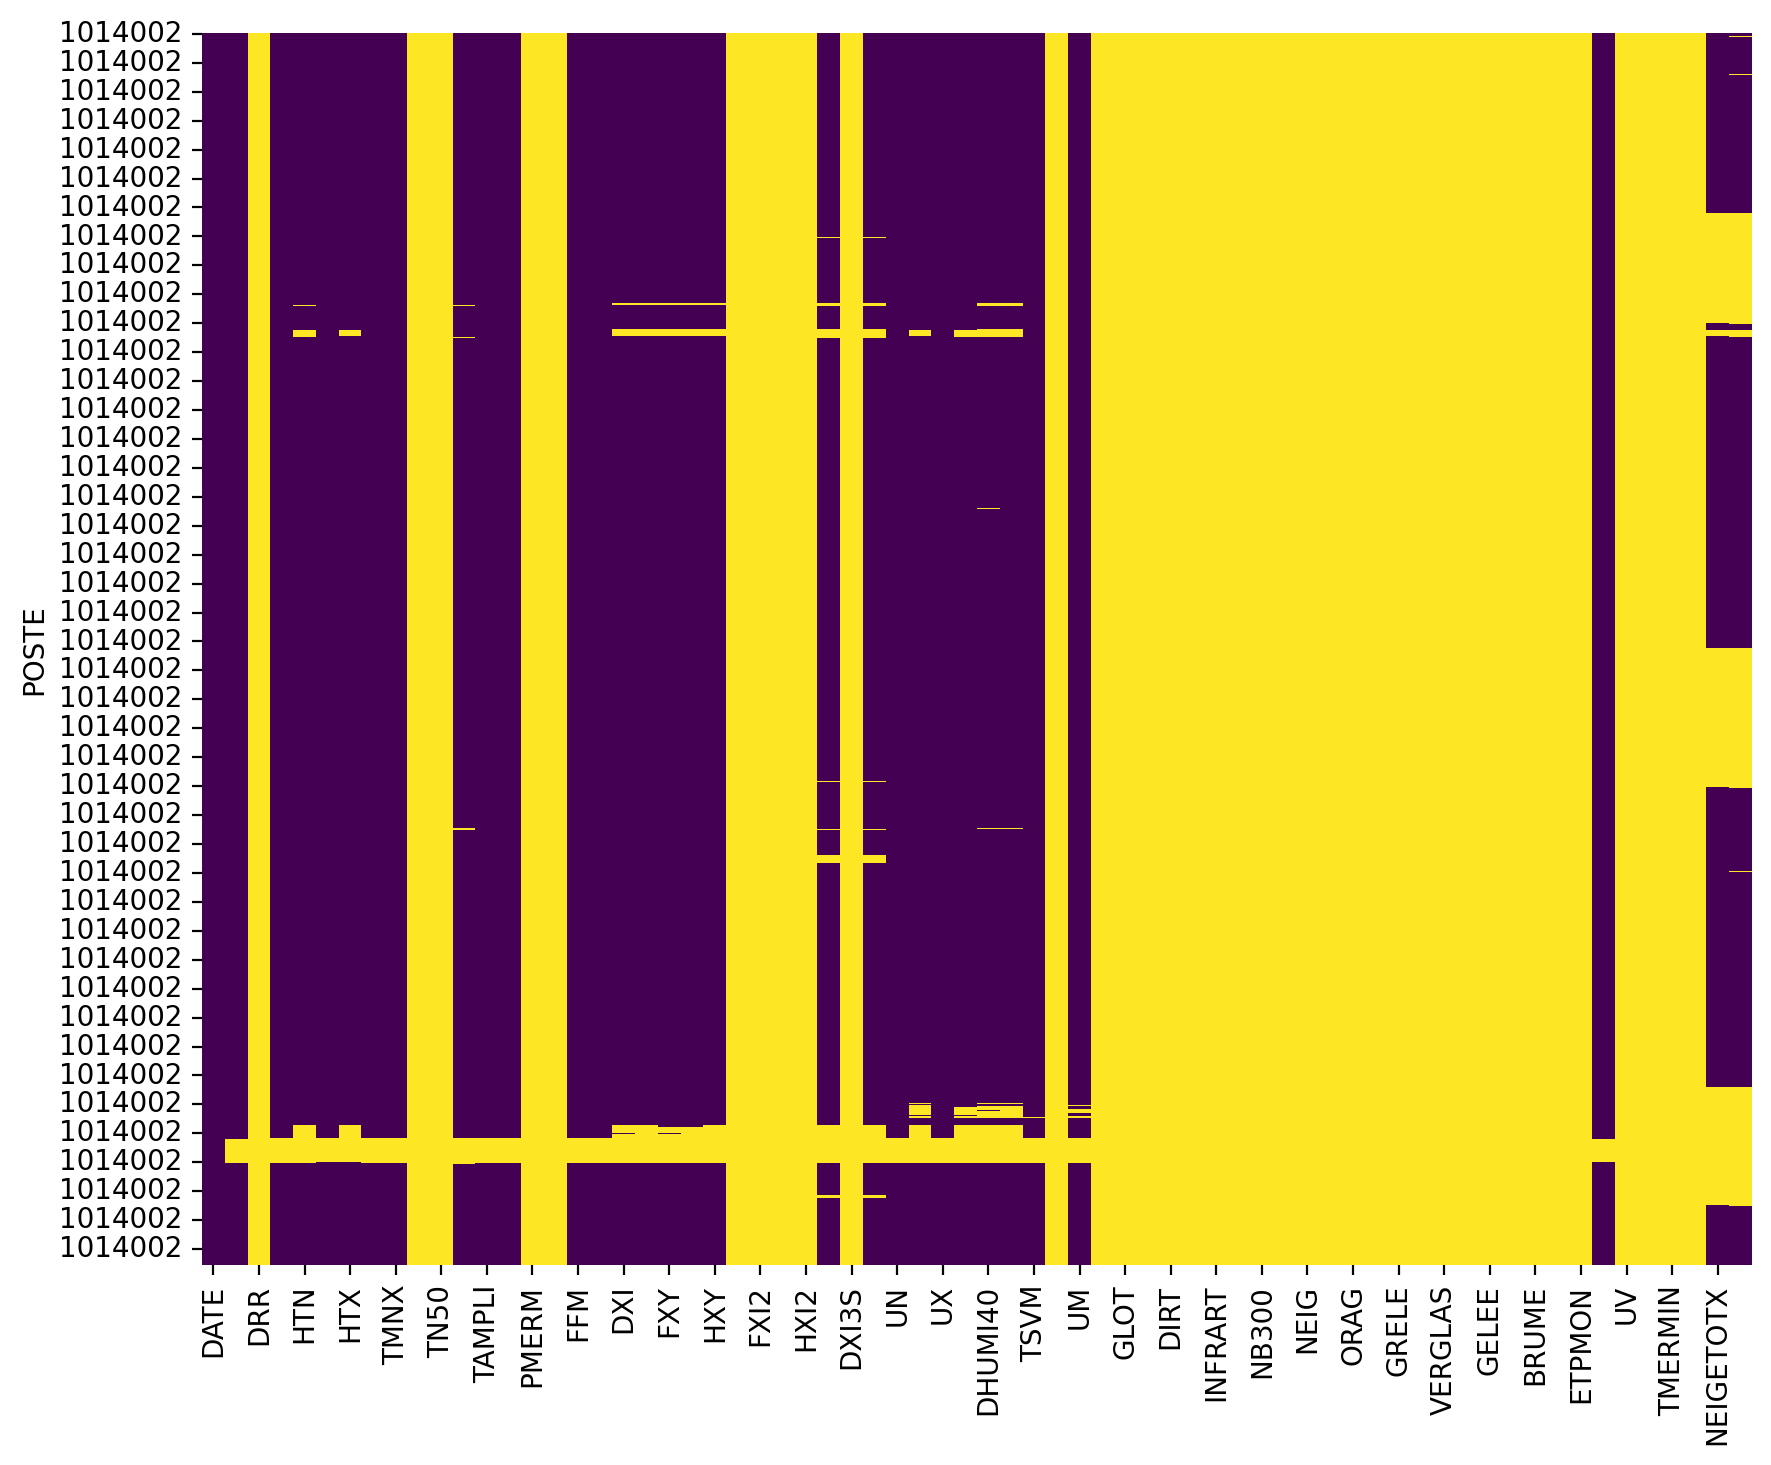

In [9]:
# Data Visualisation Libraries
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!pip install seaborn --upgrade
import seaborn as sns

for col in df.select_dtypes(include="number"):
    print(f'{col:-<50} {df[col].isna().sum()/df.shape[0]}') 

# Création de la heatmap des valeurs manquantes
f.plt.figure(figsize=(10,8))
f.sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

En observant cde heatmap, on se rend compte que toutes les variables ont des valeurs manquantes. Mais cela n'est pas le plus grand constat à faire. On remarque qu'il des variables pour lesquelles toutes les valeurs manquantes. Le premier traitement que nous ferons est de supprimer toutes les variables pour lesquelles toutes les valeurs sont manquantes.

In [10]:
# Suppression des variables avec des valeurs manquantes : 
# Supprimer les colonnes où toutes les valeurs sont NaN
df_cleaned = df.dropna(axis=1, how='all')

print("\nDataFrame après suppression des colonnes vides :")
print(df_cleaned)


DataFrame après suppression des colonnes vides :
             DATE    RR    TN     HTN    TX     HTX    TM   TMNX     DG  \
POSTE                                                                     
1014002  20220105   2,6  -0,4  1759.0   3,4  1217.0   0,9   1,50  389.0   
1014002  20220106   0,0  -2,5  1746.0   4,3  1327.0  -0,6   0,90  964.0   
1014002  20220107  10,0  -6,9   718.0   1,6  2229.0  -1,2  -2,65  674.0   
1014002  20220108  13,2  -0,7   733.0   6,3  2319.0   2,4   2,80   87.0   
1014002  20220109   7,6   0,4   737.0   2,2   601.0   1,8   1,30    0.0   
...           ...   ...   ...     ...   ...     ...   ...    ...    ...   
1014002  20241027   0,2   5,7   633.0  21,9  1354.0  13,3  13,80    0.0   
1014002  20241028   0,2   6,7   546.0  21,9  1236.0  12,6  14,30    0.0   
1014002  20241029   0,4   6,4  2251.0  21,7  1236.0  12,0  14,05    0.0   
1014002  20241030   0,2   4,9   632.0  21,8  1253.0  11,0  13,35    0.0   
1014002  20241031   0,0   2,9   657.0  20,2  1341.

<Axes: ylabel='POSTE'>

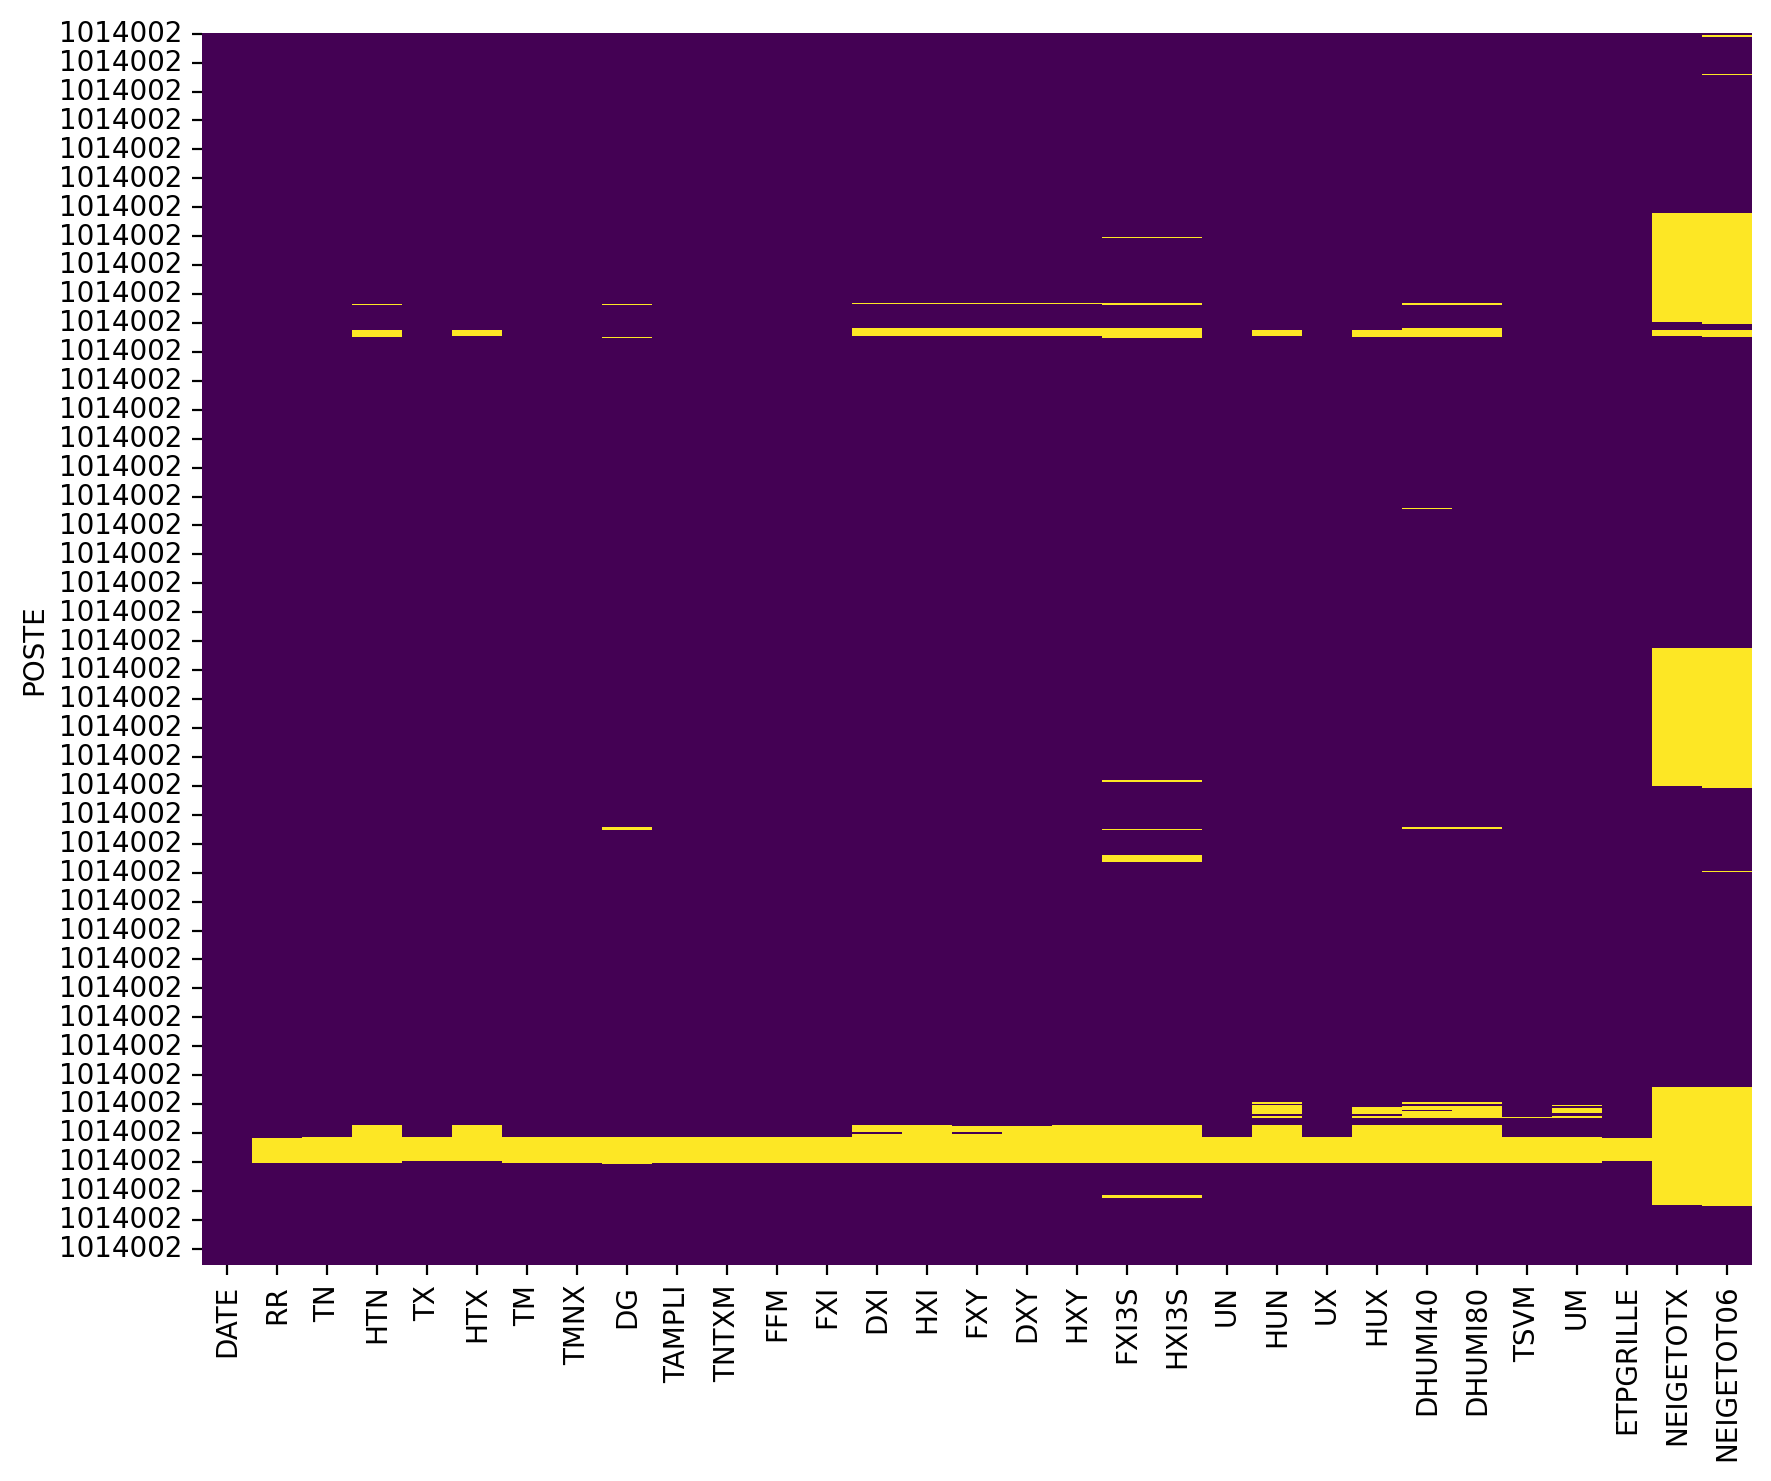

In [11]:
# Création de la heatmap des valeurs manquantes dans la base df_cleaned
f.plt.figure(figsize=(10,8))
f.sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')

Après avoir supprimé toutes les variables n ayant aucune observation, on constate que les valeurs manquantes persistent chez les autres variables. On va donc procéder à l'imputation de ces valeurs manuantes.

In [12]:
# Vérification des variables avec des valeurs manquantes dans le dataframe
missing_data = df_cleaned.isnull().sum()

# Filtrer les variables ayant des valeurs manquantes
missing_data = missing_data[missing_data > 0]

# Afficher les variables ayant des valeurs manquantes et le nombre de valeurs manquantes
print(missing_data)

RR             20
TN             21
HTN            38
TX             20
HTX            35
TM             21
TMNX           21
DG             26
TAMPLI         21
TNTXM          21
FFM            21
FXI            21
DXI            37
HXI            38
FXY            36
DXY            37
HXY            38
FXI3S          52
HXI3S          52
UN             21
HUN            47
UX             21
HUX            45
DHUMI40        52
DHUMI80        52
TSVM           22
UM             28
ETPGRILLE      19
NEIGETOTX     309
NEIGETOT06    316
dtype: int64


In [13]:
print(df_cleaned.columns.tolist())

['DATE', 'RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06']


On divise le data frame en 2 data frame , une contenant uniquement les variables avec valeurs manquantes et une autre avec des variables sans valeurs manquantes.

In [15]:
# Identifier les colonnes avec des valeurs manquantes
missing_columns = missing_data.index.tolist()

# Ajouter les colonnes 'postes' et 'dates' si elles ne sont pas déjà dans missing_columns
important_columns = ['DATE']
for col in important_columns:
    if col not in missing_columns:
        missing_columns.append(col)

# Créer le premier dataframe contenant les colonnes avec valeurs manquantes ('dates')
df_with_missing = df_cleaned[missing_columns]

# Créer le second dataframe contenant les colonnes sans valeurs manquantes ('dates')
df_clean_columns = [col for col in df_cleaned.columns if col not in missing_data.index or col in important_columns]
df_clean = df_cleaned[df_clean_columns]

# Affichage des résultats pour validation
print("Colonnes avec valeurs manquantes :", df_with_missing.columns.tolist())
print("Colonnes sans valeurs manquantes :", df_clean.columns.tolist())


Colonnes avec valeurs manquantes : ['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06', 'DATE']
Colonnes sans valeurs manquantes : ['DATE']


On constate donc que toutes les autres variables possèdent des valeurs manquantes, d'ou on n'a pas vraiment intéret à séparer le data frame comme on l'a fait.

A présent nous allons passer à l'imputation; et avant cela, nous allons arranger le format de ces variables réelles qui étaient sous le format object.

In [16]:
# Fonction pour convertir les chaînes avec des virgules en float
def convertir_virgule_en_float(serie):
    return f.pd.to_numeric(serie.str.replace(",", ".", regex=False), errors="coerce")

# Liste des colonnes à traiter
colonnes_a_corriger = ['RR', 'TN', 'TX', 'TM', 'TMNX', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'FXY', 'FXI3S', 'TSVM', 'ETPGRILLE']

# Application de la fonction sur les colonnes concernées
df_with_missing[colonnes_a_corriger] = df_with_missing[colonnes_a_corriger].apply(convertir_virgule_en_float)

In [17]:
# Sélectionner uniquement les variables quantitatives
quant_var = df_with_missing.select_dtypes(include=['int64', 'float64'])
quant_var.columns

Index(['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM',
       'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN',
       'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE',
       'NEIGETOTX', 'NEIGETOT06', 'DATE'],
      dtype='object')

In [18]:
# Sélectionner uniquement les variables qualitatives
qual_var = df_with_missing.select_dtypes(include=['object'])
qual_var.columns

Index([], dtype='object')

Après avoir rendu toutes ces variables quantitatives comme prévu, on peut actuellement passer à l'imputation de nos variables.

In [ ]:
from sklearn.impute import SimpleImputer

# Définir les colonnes quantitatives
quantitative_columns = df_with_missing.select_dtypes(include=['float64', 'int64']).columns

# Initialiser l'imputeur avec la stratégie "médiane"
imputer = f.SimpleImputer(strategy='median')

# Appliquer l'imputation
df_with_missing[quantitative_columns] = f.imputer.fit_transform(df_with_missing[quantitative_columns])

# Vérifier que toutes les valeurs manquantes ont été imputées
print(df_with_missing[quantitative_columns].isnull().sum())



RR            0
TN            0
HTN           0
TX            0
HTX           0
TM            0
TMNX          0
DG            0
TAMPLI        0
TNTXM         0
FFM           0
FXI           0
DXI           0
HXI           0
FXY           0
DXY           0
HXY           0
FXI3S         0
HXI3S         0
UN            0
HUN           0
UX            0
HUX           0
DHUMI40       0
DHUMI80       0
TSVM          0
UM            0
ETPGRILLE     0
NEIGETOTX     0
NEIGETOT06    0
DATE          0
dtype: int64


In [23]:
df_with_missing.head()

,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,TNTXM,...,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06,DATE
POSTE,,,,,,,,,,,,,,,,,,,,,
1014002,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,1.5,...,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0,20220105.0
1014002,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,0.9,...,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0,20220106.0
1014002,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,-2.7,...,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0,20220107.0
1014002,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,2.8,...,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0,20220108.0
1014002,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,1.3,...,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0,20220109.0


Maintenant que notre base est propre, nous pouvons actuellement passer à l'analyse descriptive

## Statistiques descriptives ##

### 1. Statistiques descriptives de base ###

In [24]:
# Statistiques descriptives de base
desc_stats = df_with_missing.describe()
print(desc_stats)


                RR           TN          HTN           TX          HTX  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      3.637671     5.390117   792.382583    18.341292  1310.477495   
std       7.132529     6.614221   690.770377     8.637562   230.321946   
min       0.000000   -15.700000     0.000000    -1.200000    20.000000   
25%       0.000000     0.900000   347.250000    11.700000  1231.250000   
50%       0.200000     6.100000   480.000000    18.300000  1330.000000   
75%       4.200000    10.600000   936.000000    25.300000  1423.000000   
max      53.300000    19.500000  2355.000000    38.000000  2352.000000   

                TM         TMNX           DG       TAMPLI        TNTXM  ...  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  ...   
mean     11.558219    11.857632   132.815068    12.949413    11.879061  ...   
std       7.200483     7.077268   307.192545     6.004188     7.082783  ...   
min      -6.60000

Les données météorologiques présentent une large variabilité, reflétant des conditions climatiques diversifiées. Les précipitations (RR), bien que faibles en moyenne (3,64 mm), affichent une distribution asymétrique avec une forte concentration de jours sans pluie et des événements extrêmes atteignant 53,3 mm, illustrant un climat marqué par des épisodes de précipitations intenses mais rares.

Les températures minimales (TN) varient de -15,7 °C à 19,5 °C, tandis que les températures maximales (TX) vont de -1,2 °C à 38 °C, avec une moyenne de 18,34 °C. La température moyenne (TM) se situe autour de 11,56 °C, indiquant un climat tempéré. Cette amplitude thermique souligne une dynamique saisonnière marquée, avec des périodes de froid intense et des vagues de chaleur.

Les hauteurs de neige (NEIGETOTX, NEIGETOT06) sont particulièrement rares, comme le suggère leur faible moyenne et leur concentration autour de zéro. Cela indique une prévalence limitée de conditions neigeuses, probablement en raison d'un climat modérément froid.

Les indices d’humidité (HUN, HUX) montrent des valeurs généralement élevées, avec des moyennes respectives de 1251 et 96,8, reflétant une atmosphère souvent humide. Cependant, les écarts-types importants (383 et 5,3 respectivement) et les minimums proches de zéro révèlent des périodes occasionnelles de sécheresse.

Le vent (FFM, FXI, DXI) affiche une faible intensité moyenne, avec des rafales occasionnelles atteignant des vitesses plus élevées, mais sans dépasser des niveaux alarmants.

L’ensoleillement (DG, TSVM) est fortement variable, avec des valeurs maximales atteignant 1440 (en minutes), témoignant de journées très ensoleillées, contre une absence totale d’ensoleillement lors des jours de forte couverture nuageuse.

Ces observations montrent un climat contrasté, oscillant entre des périodes calmes et des événements météorologiques extrêmes. L’analyse approfondie des corrélations entre ces variables, combinée à une étude temporelle, pourrait éclairer les tendances climatiques locales et leur impact potentiel sur les activités humaines.

### 2. Analyse des distributions ###

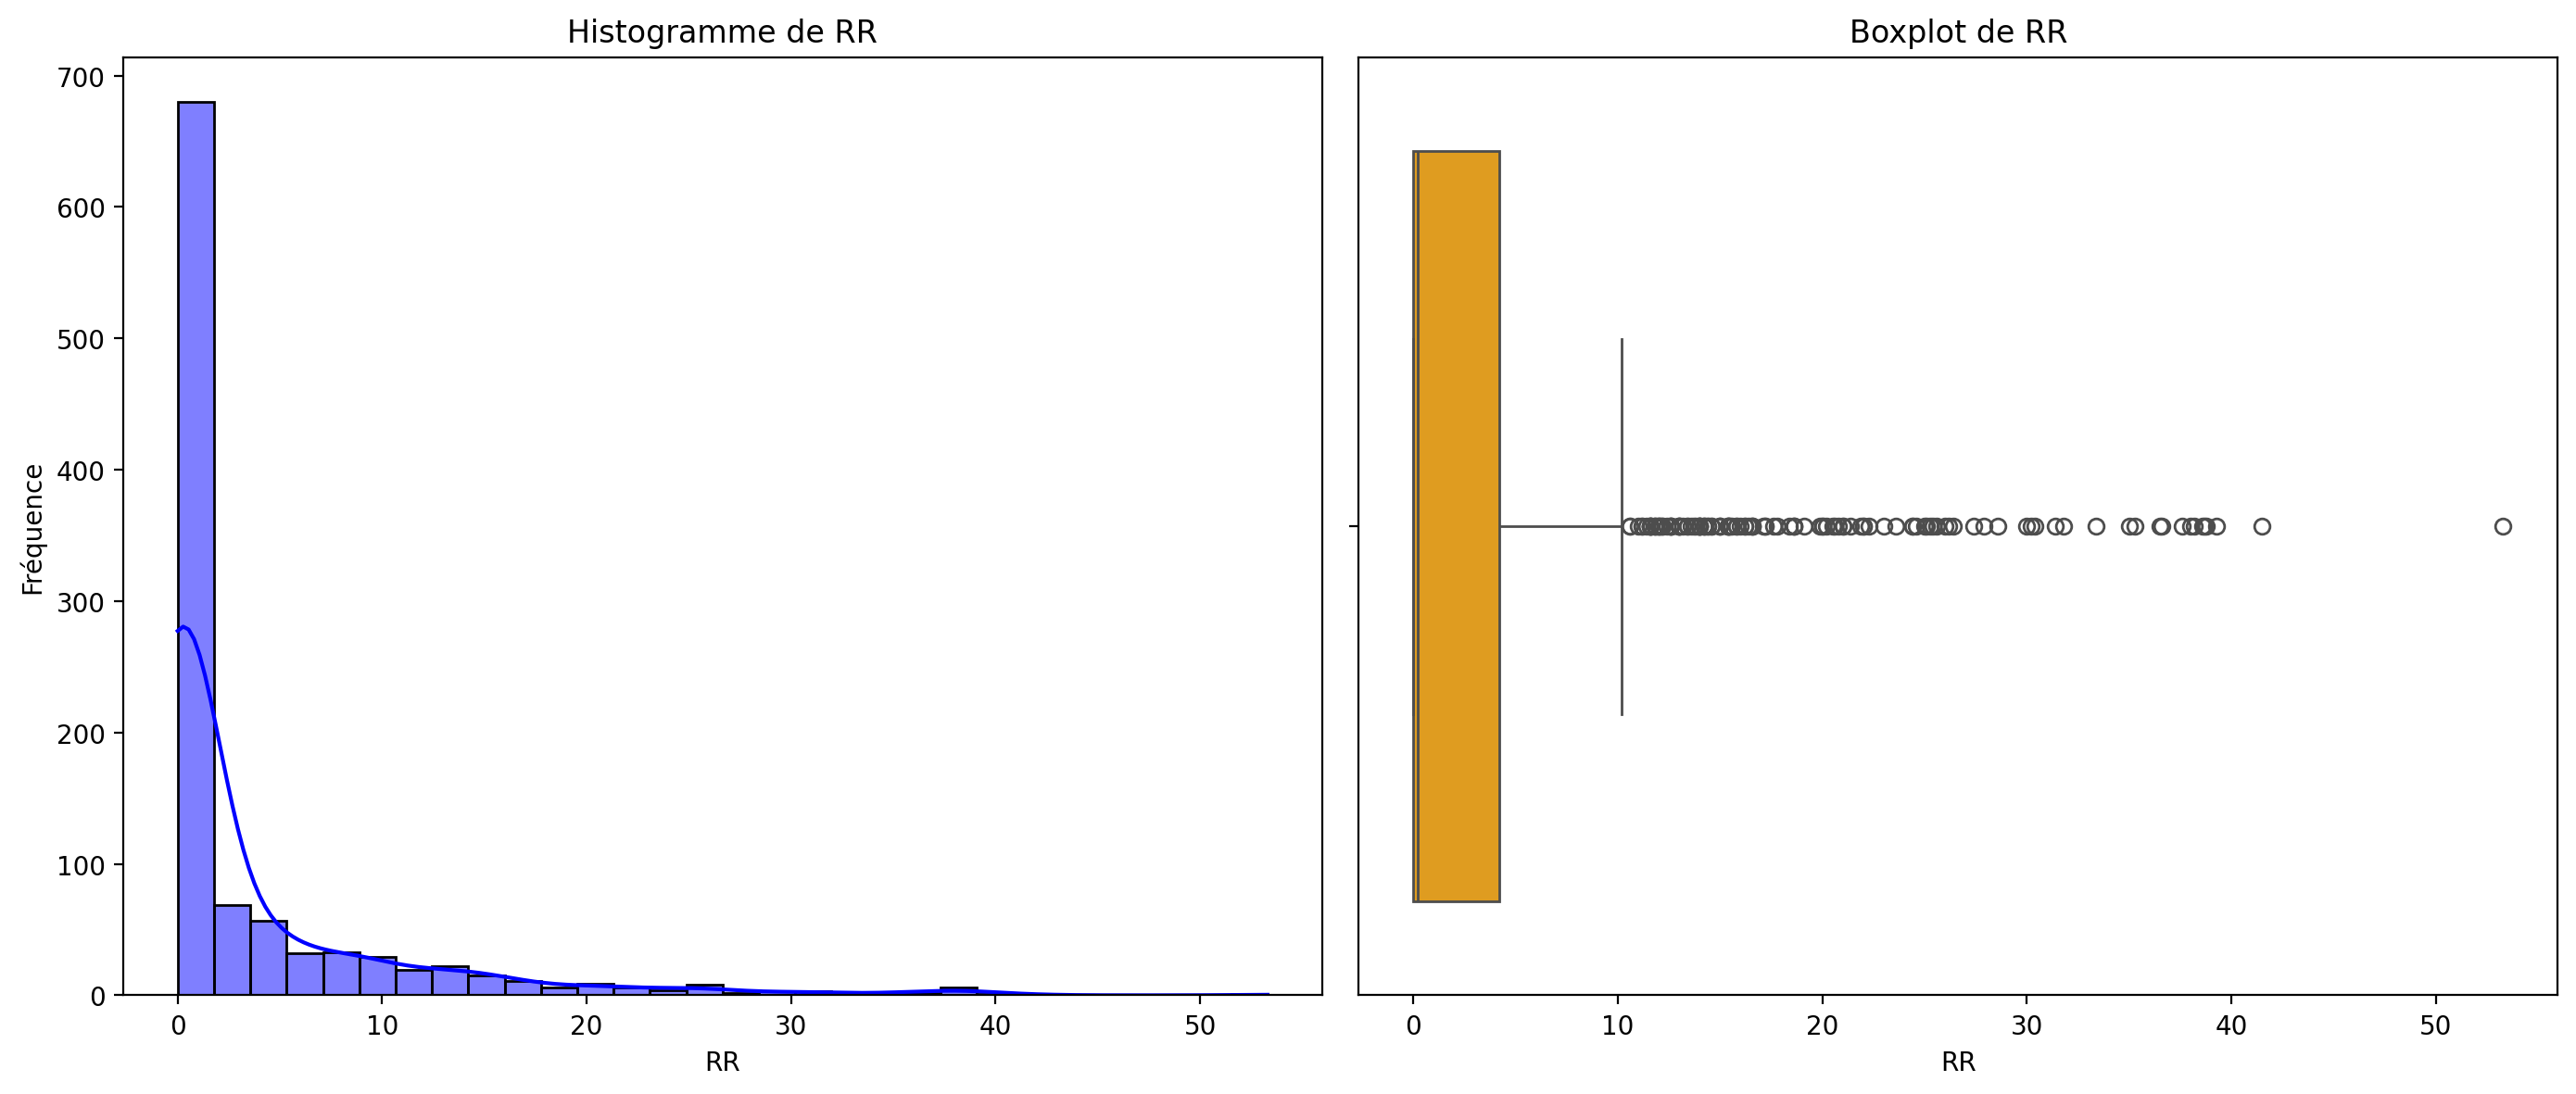

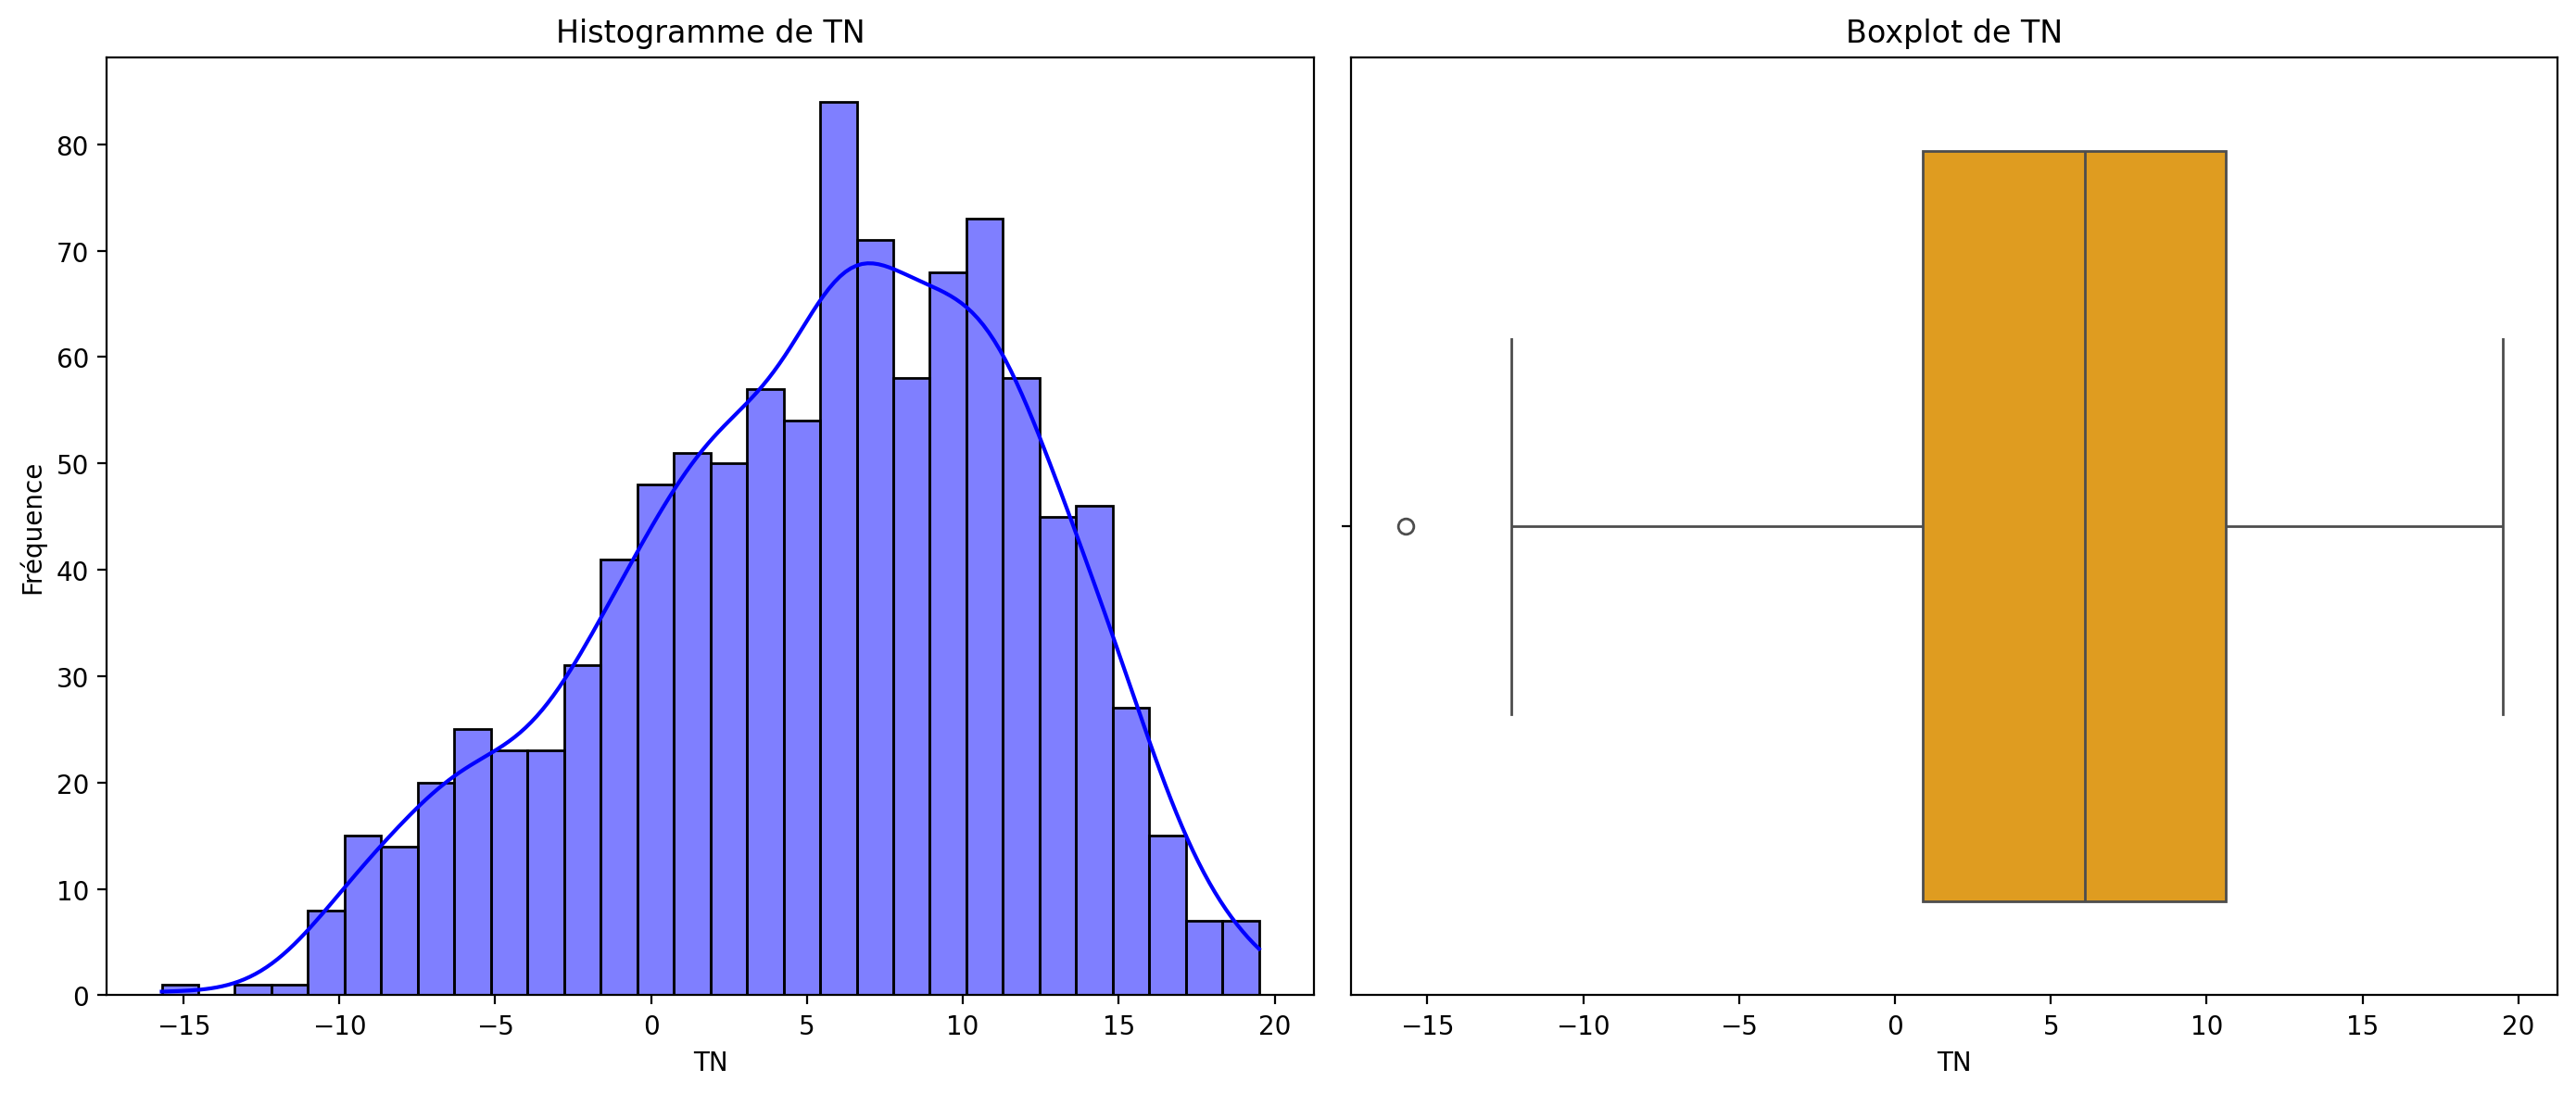

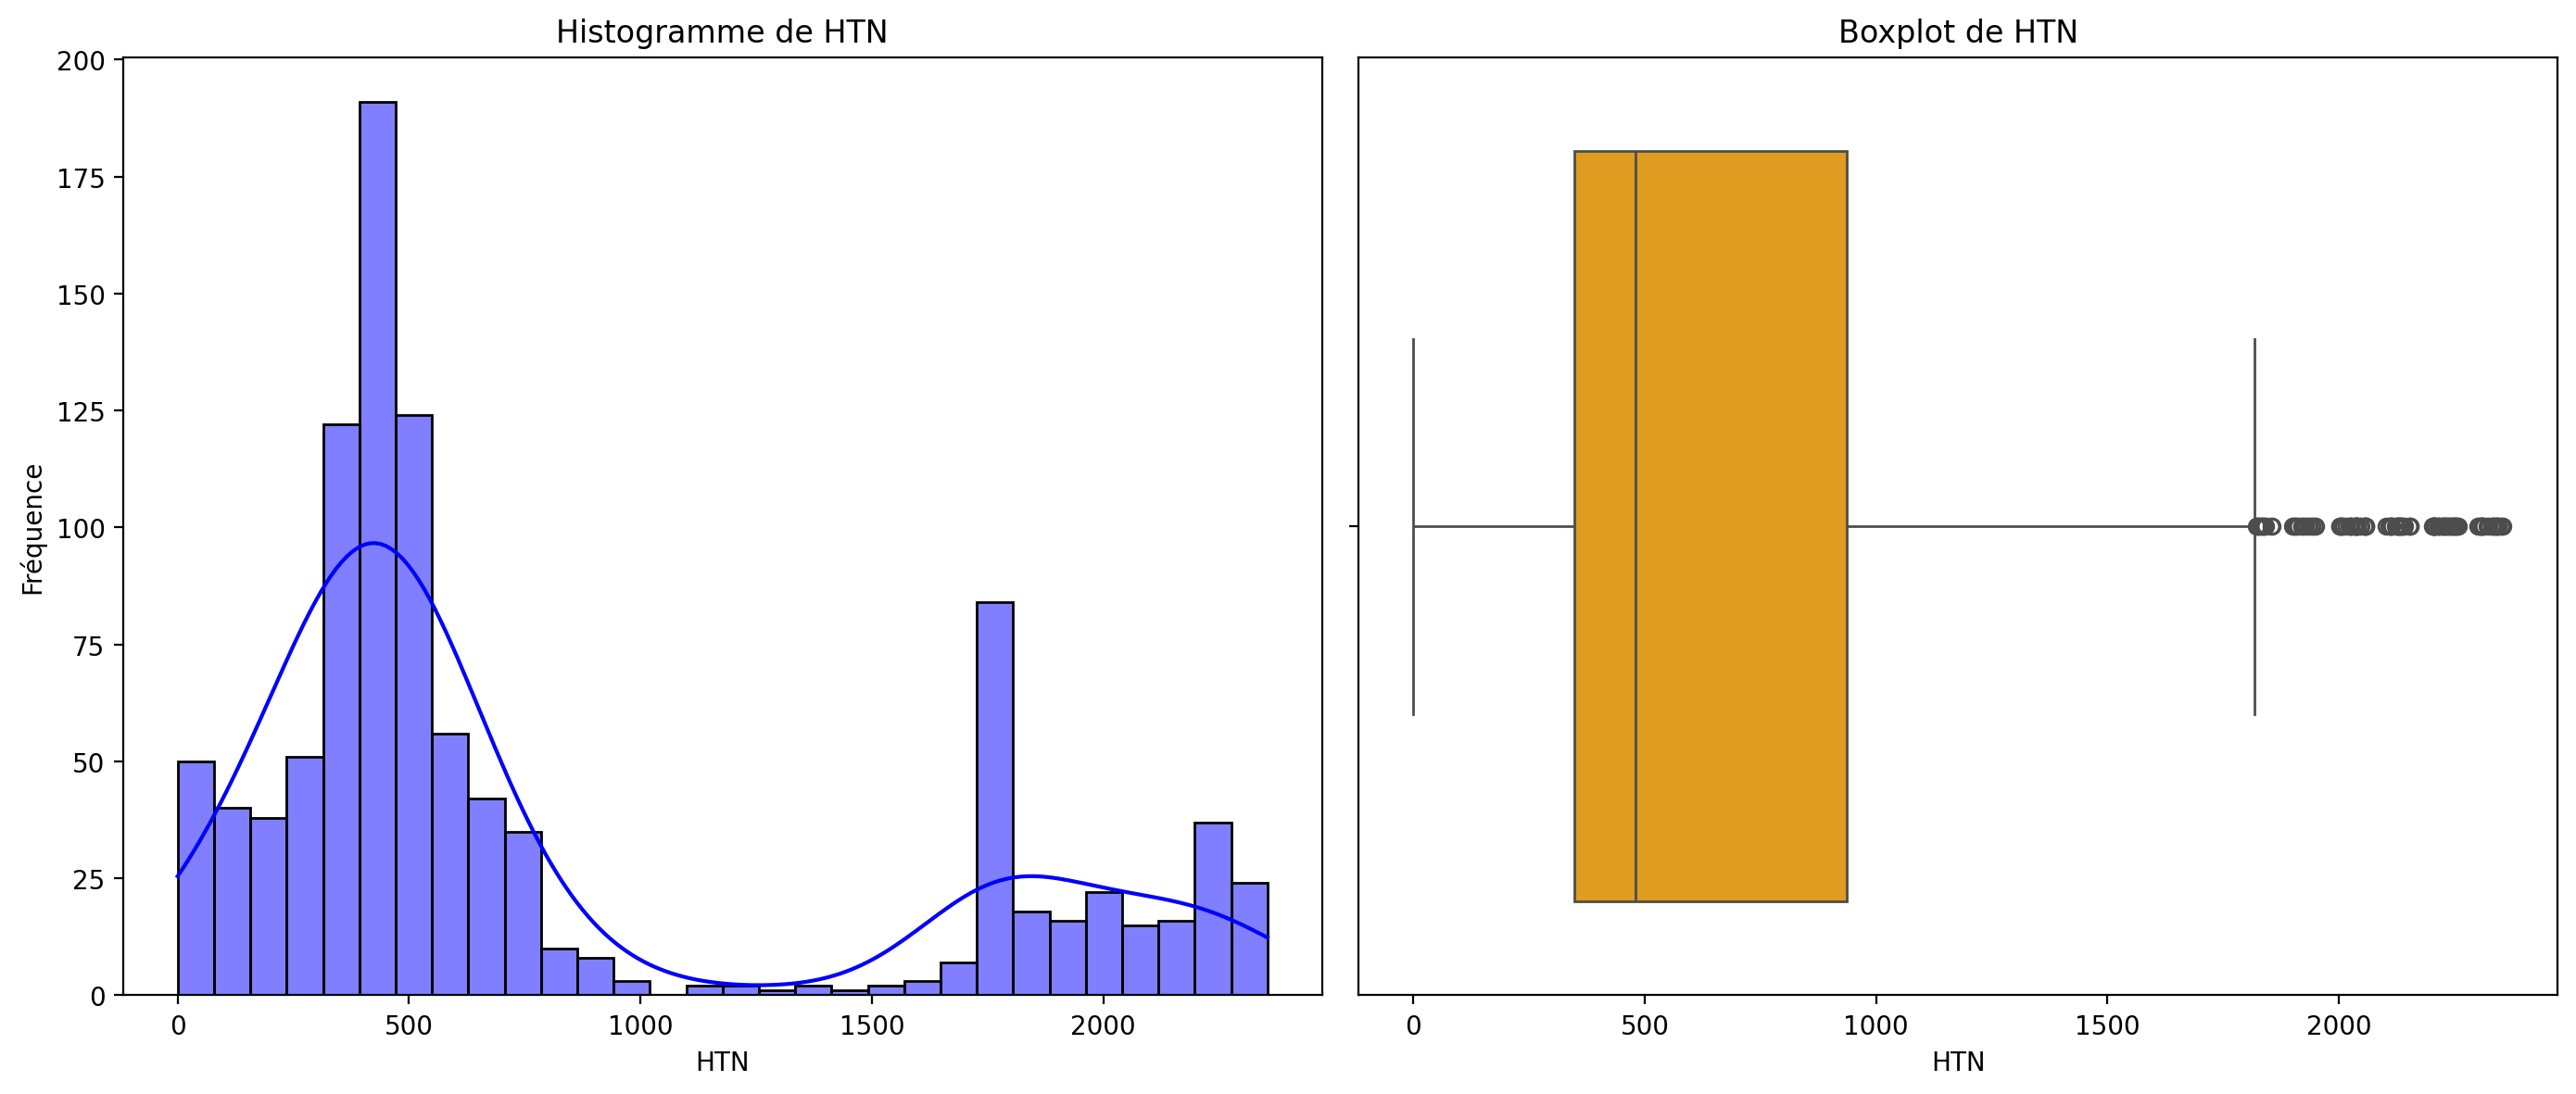

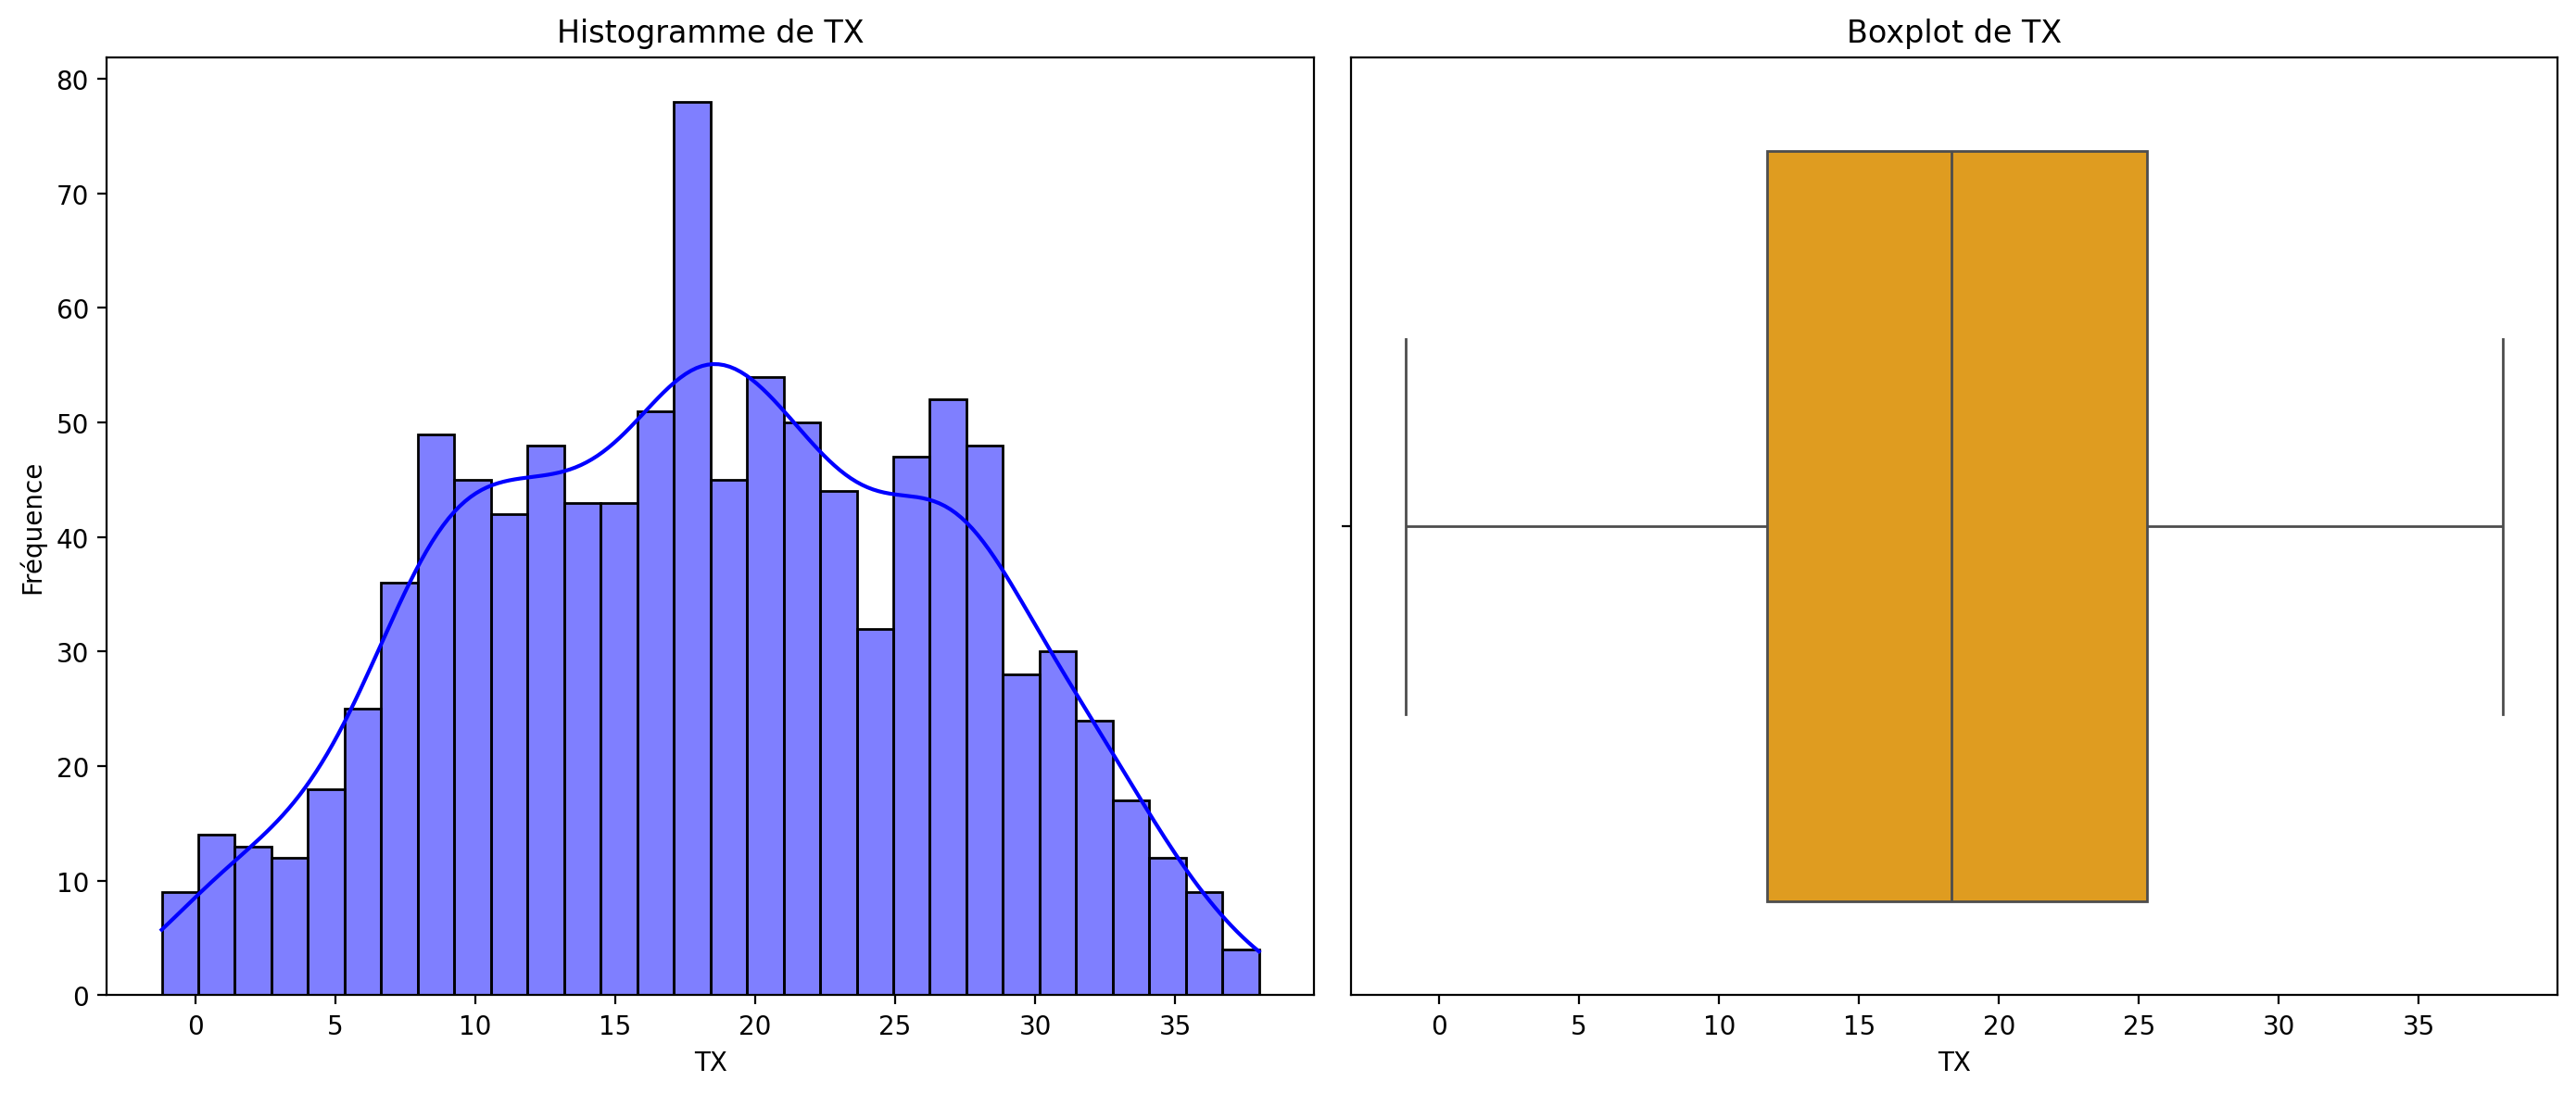

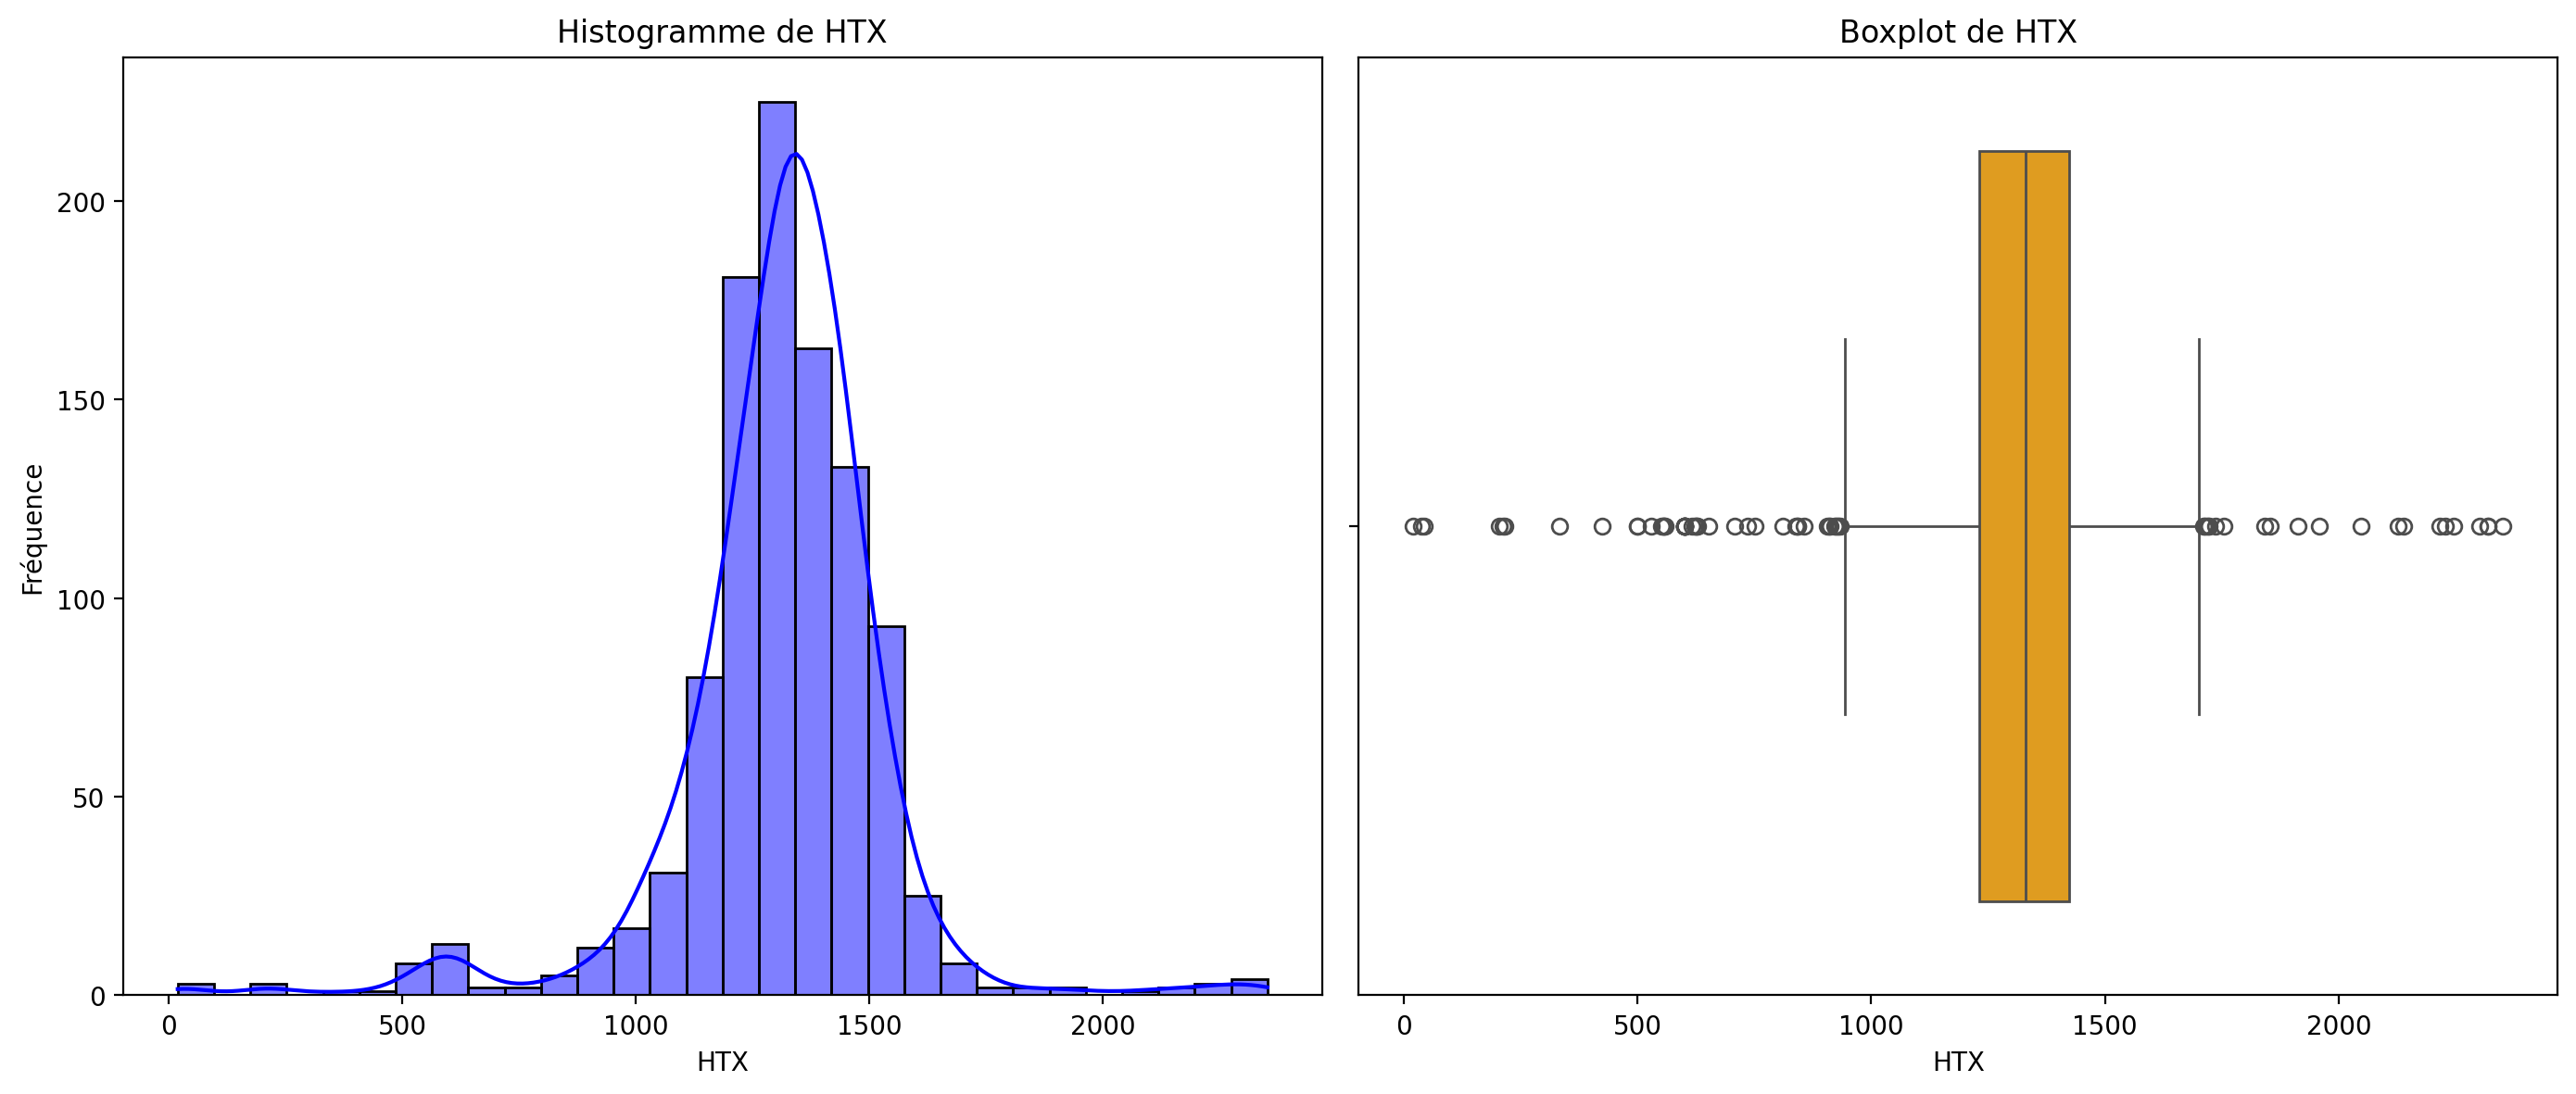

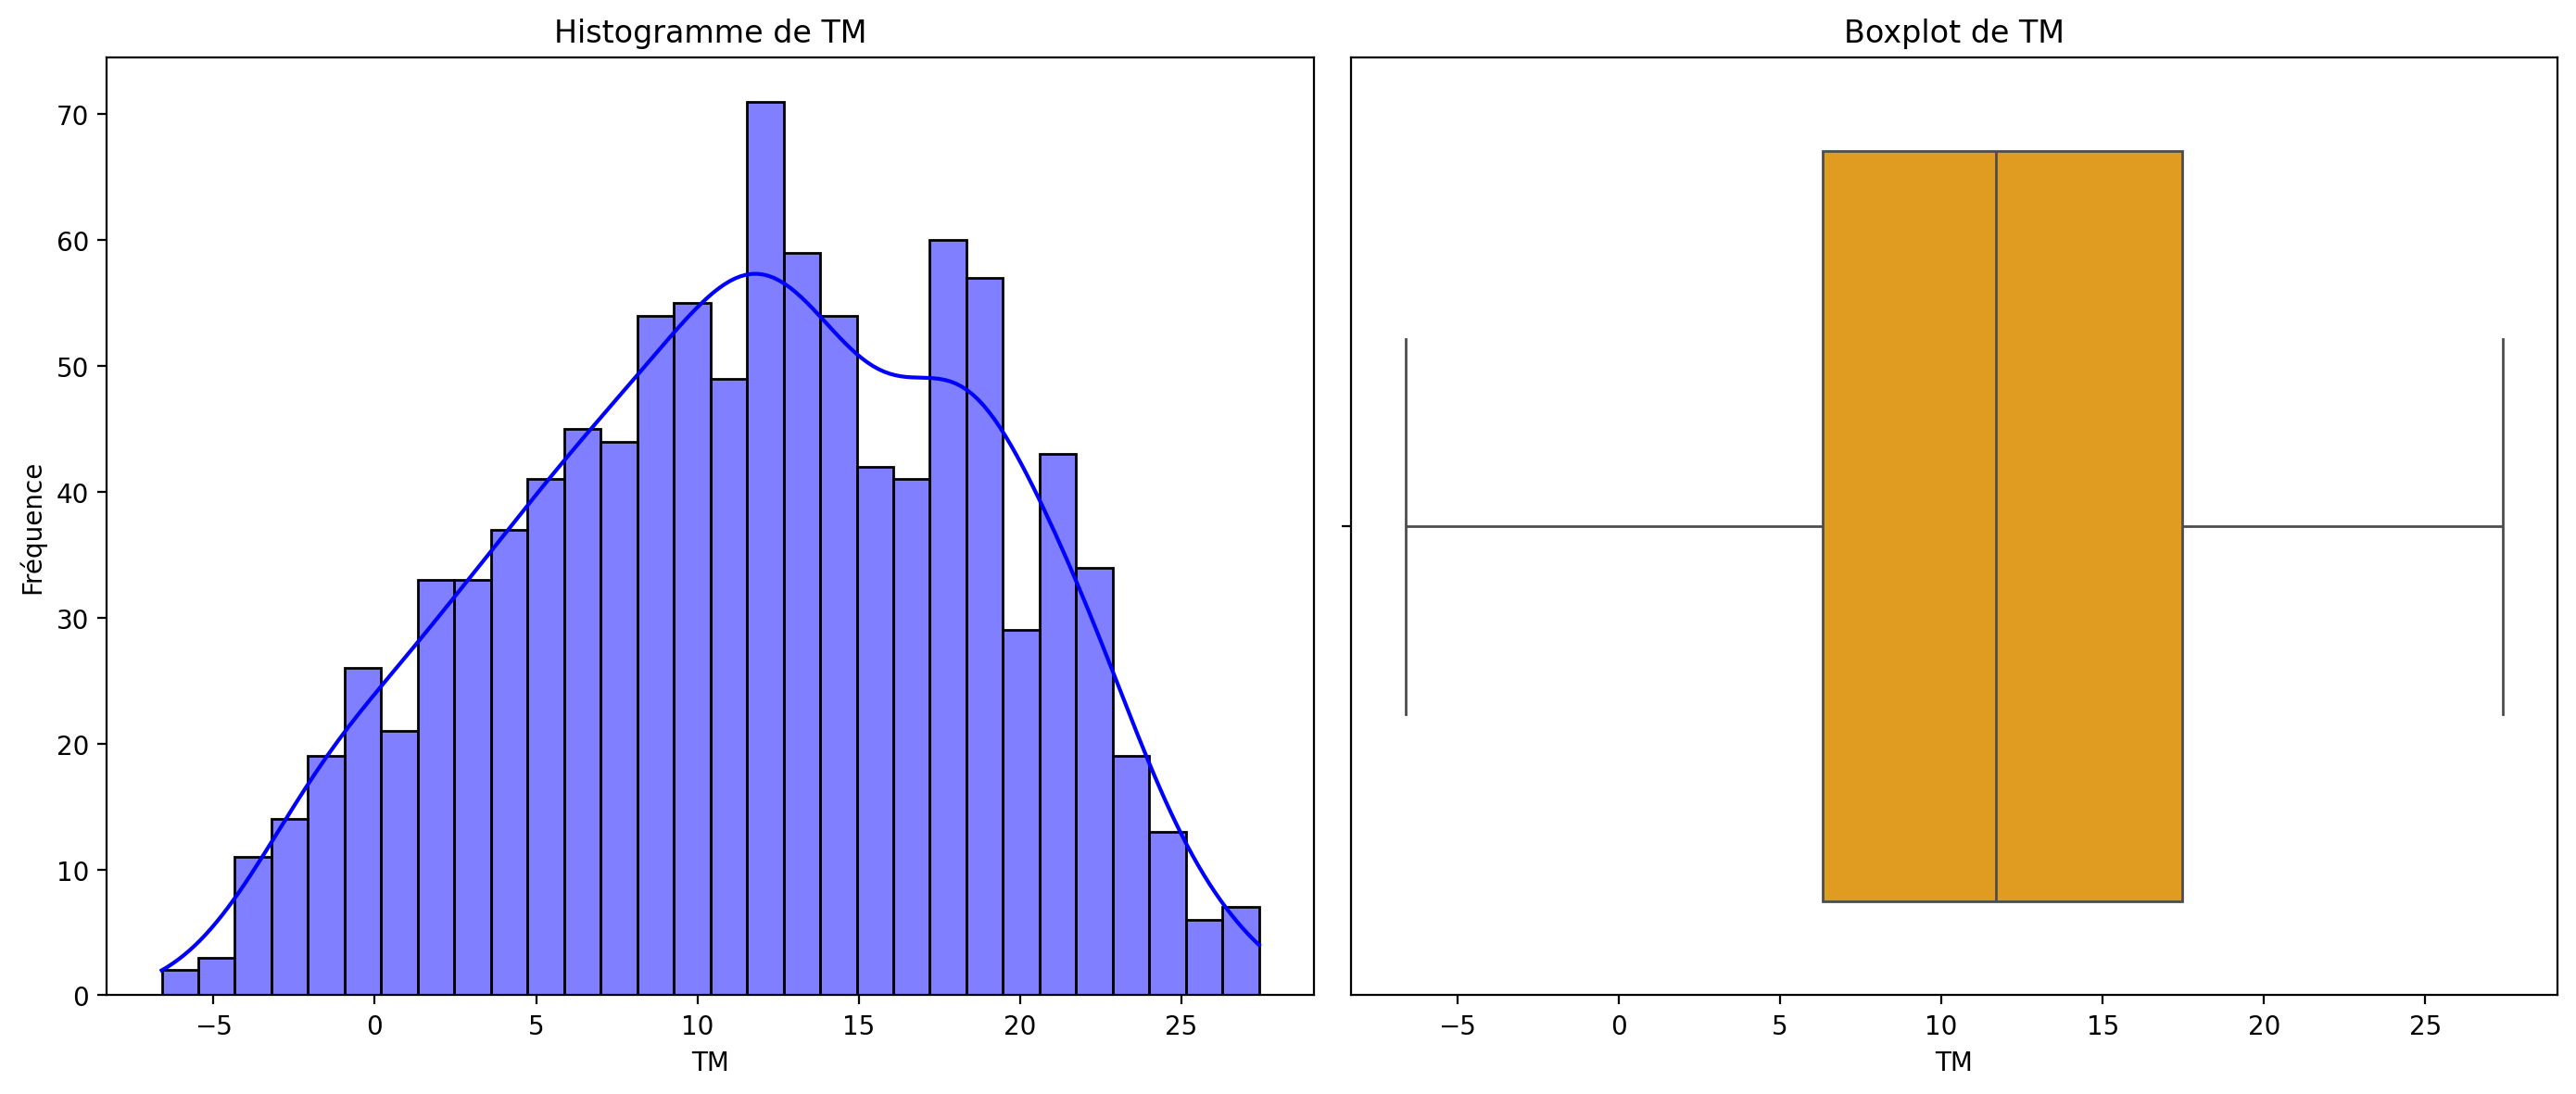

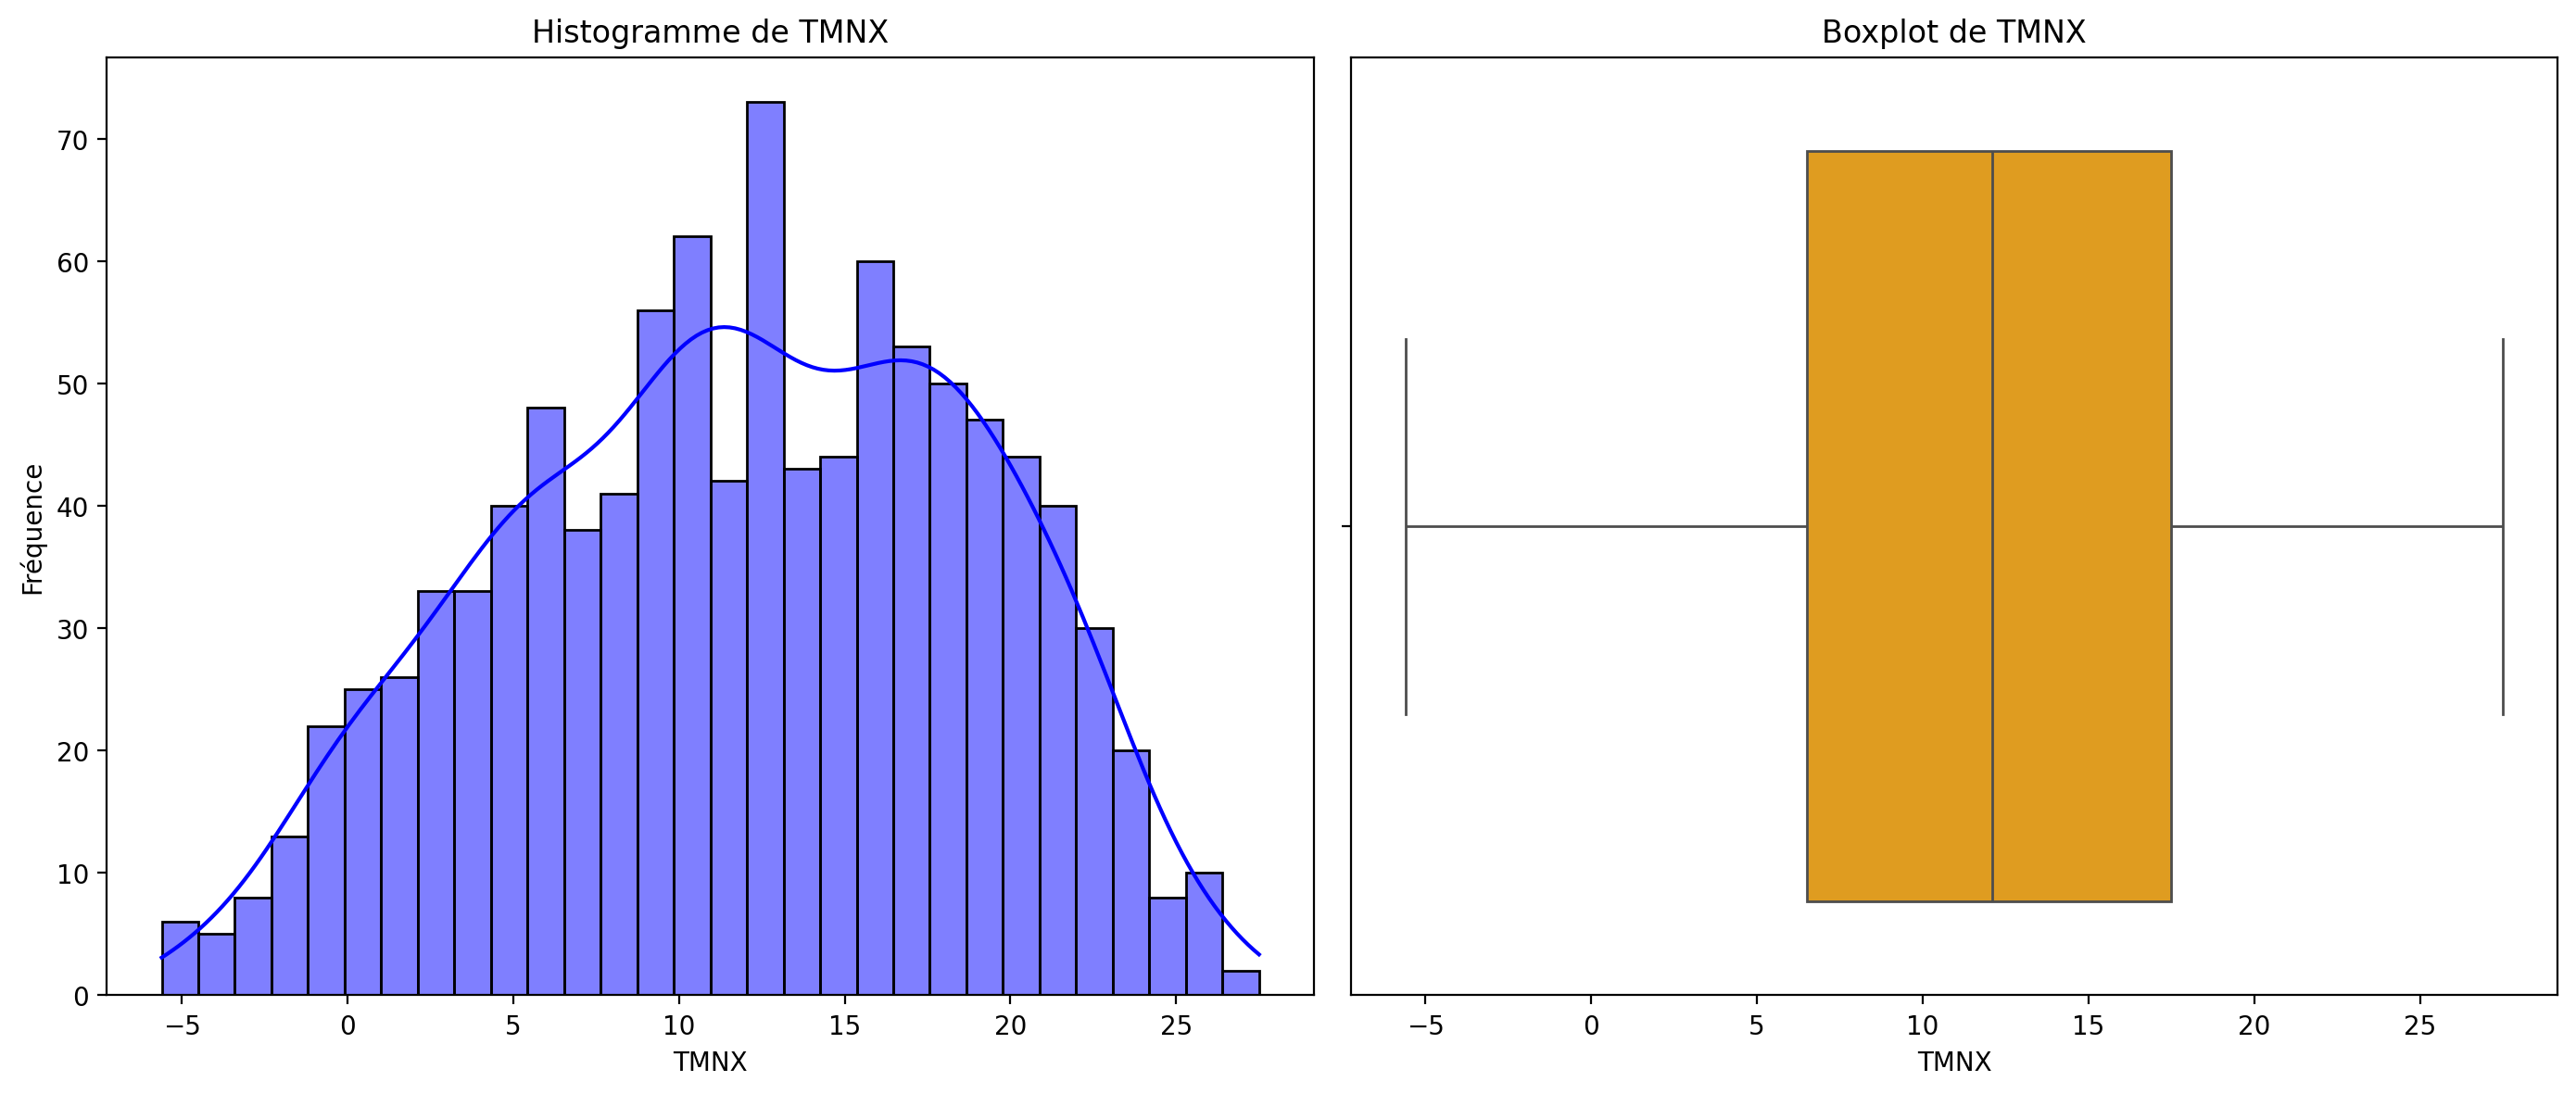

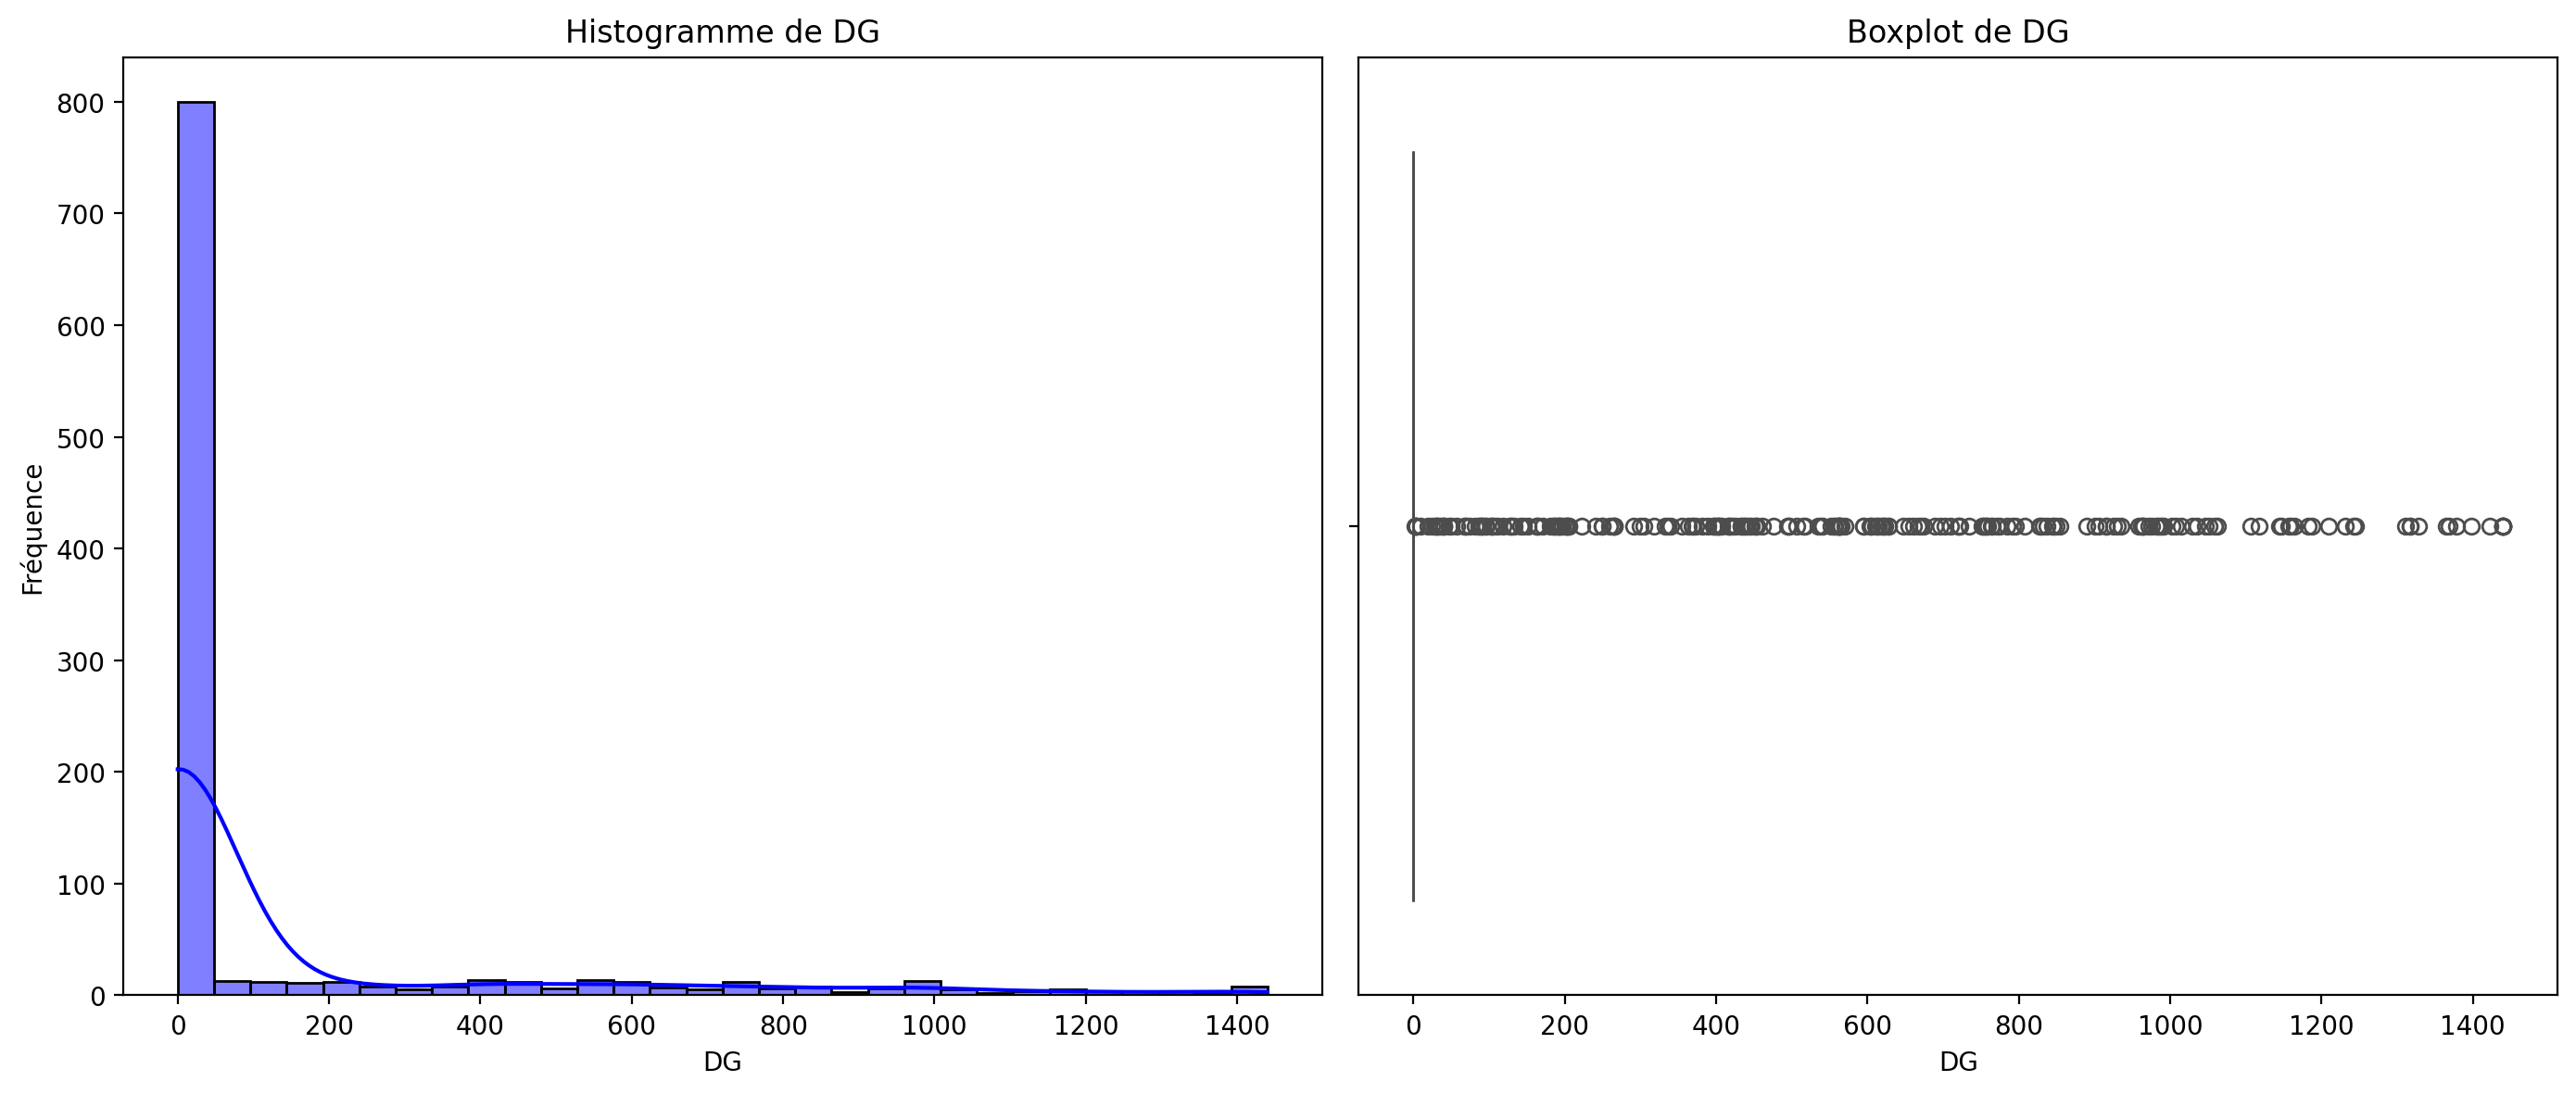

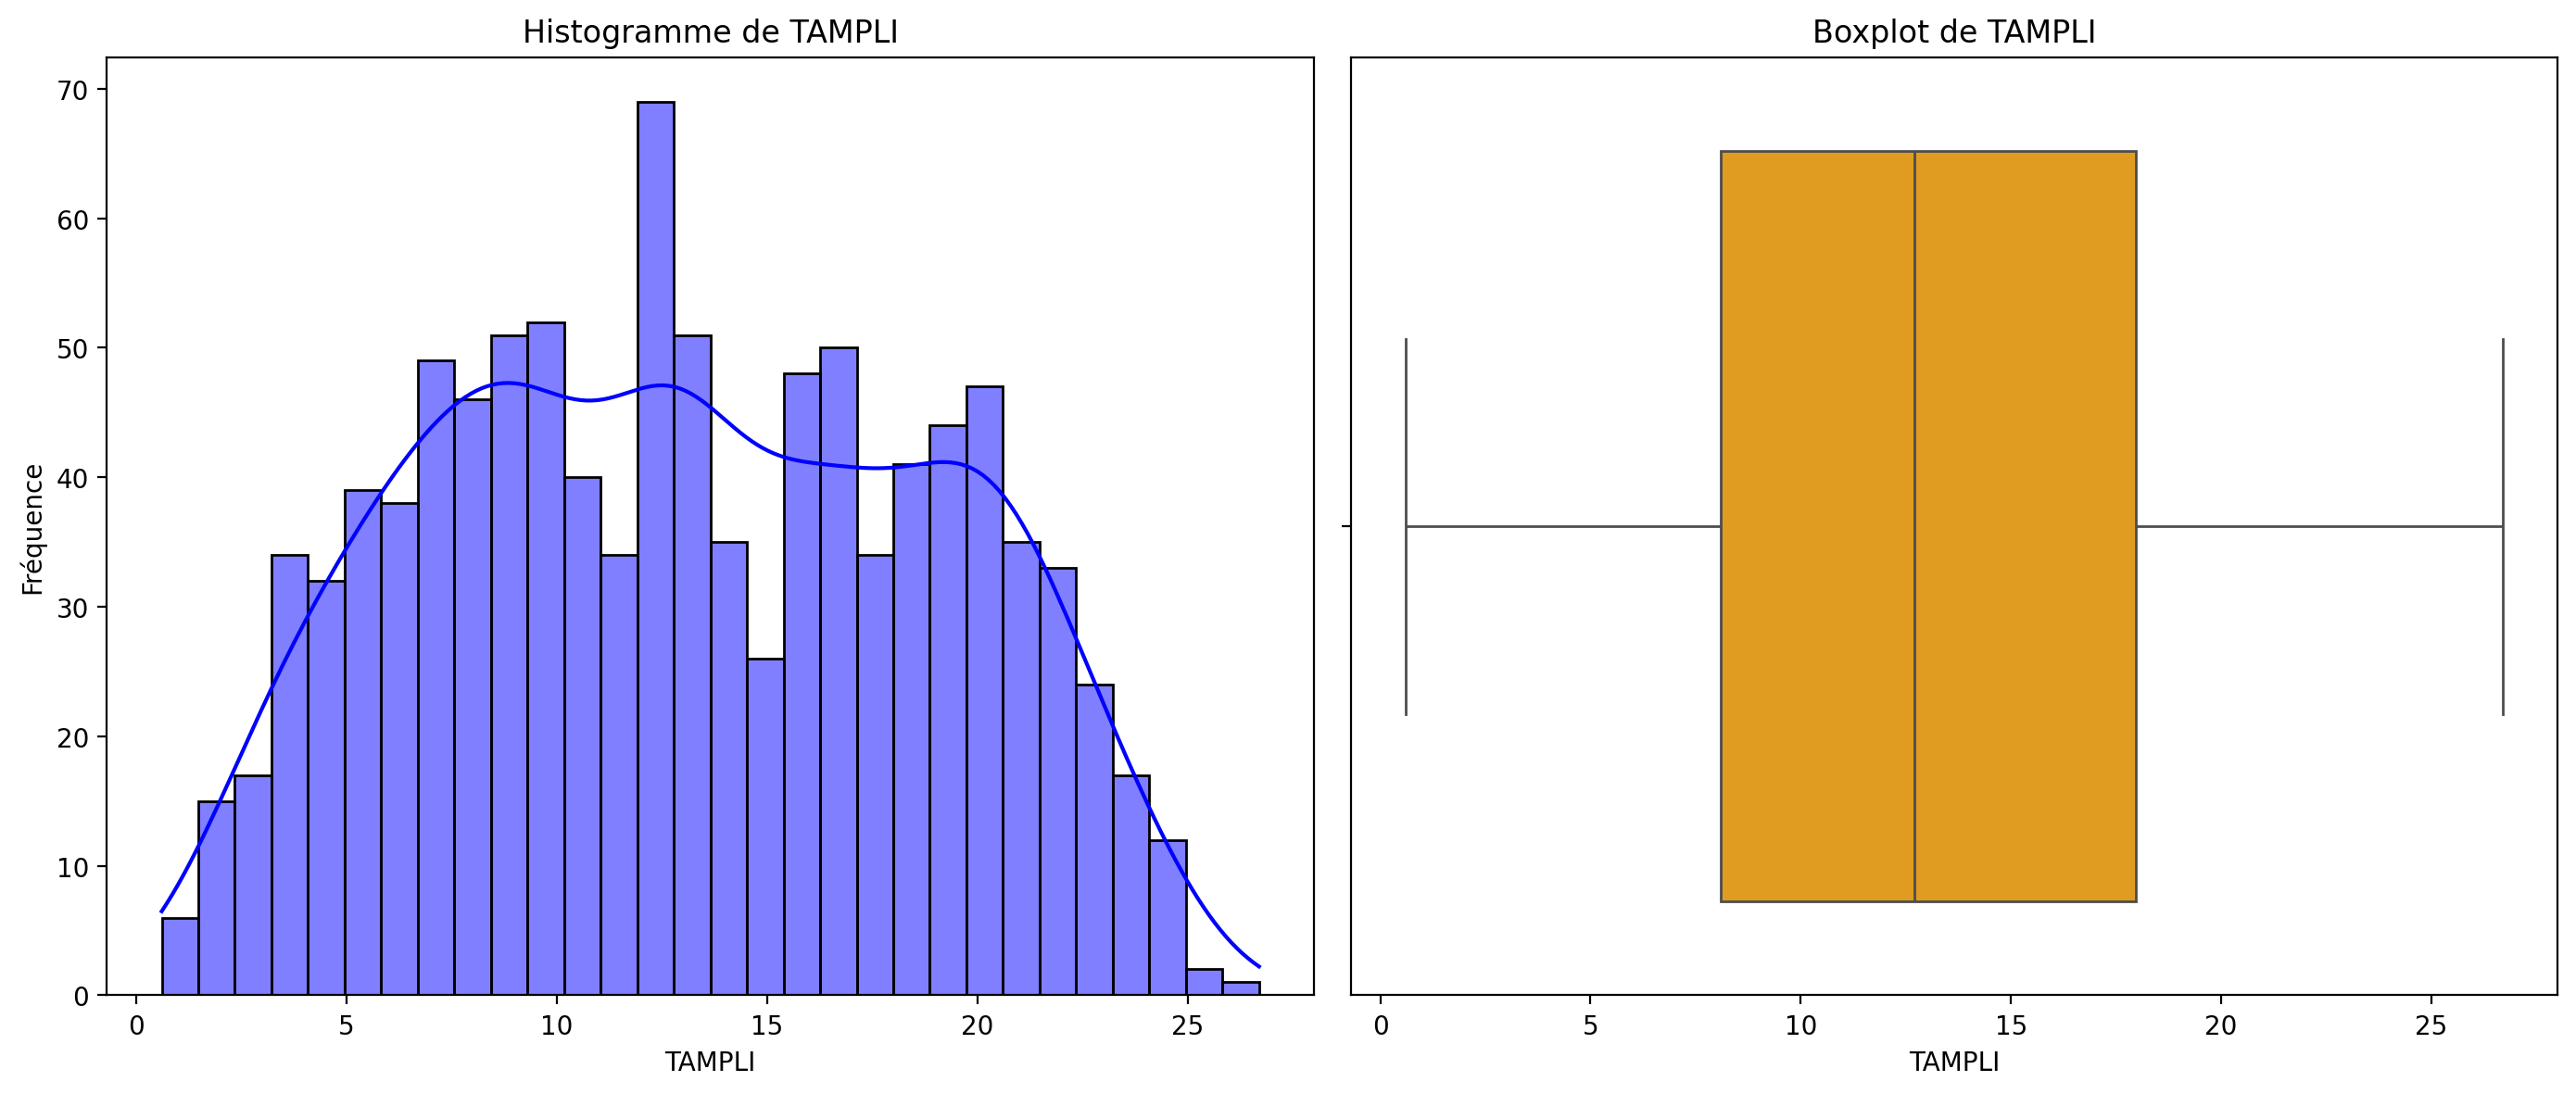

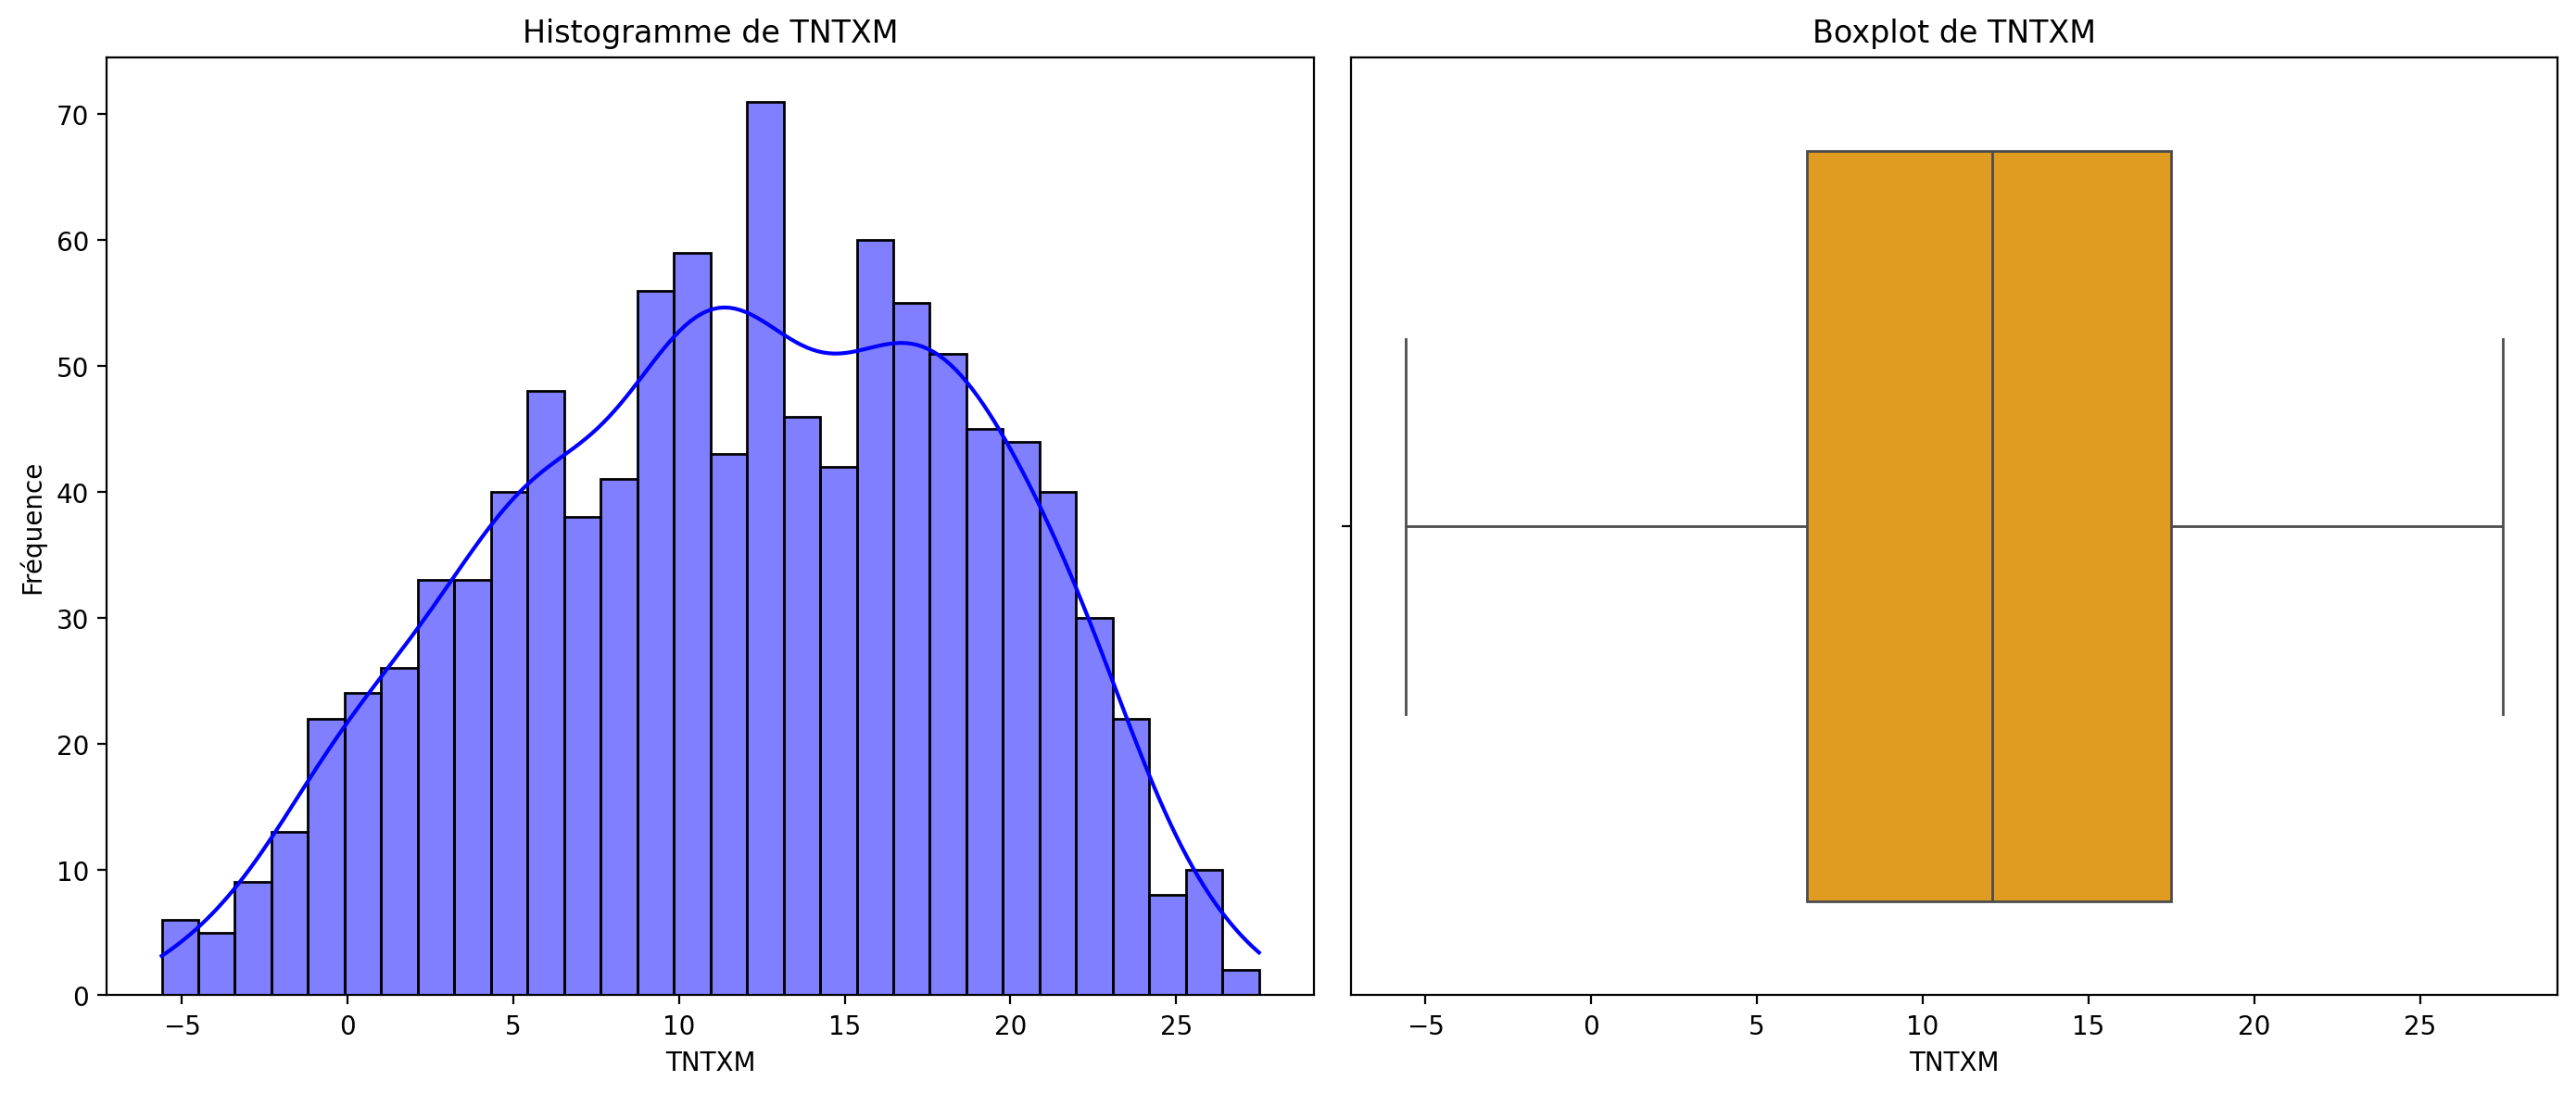

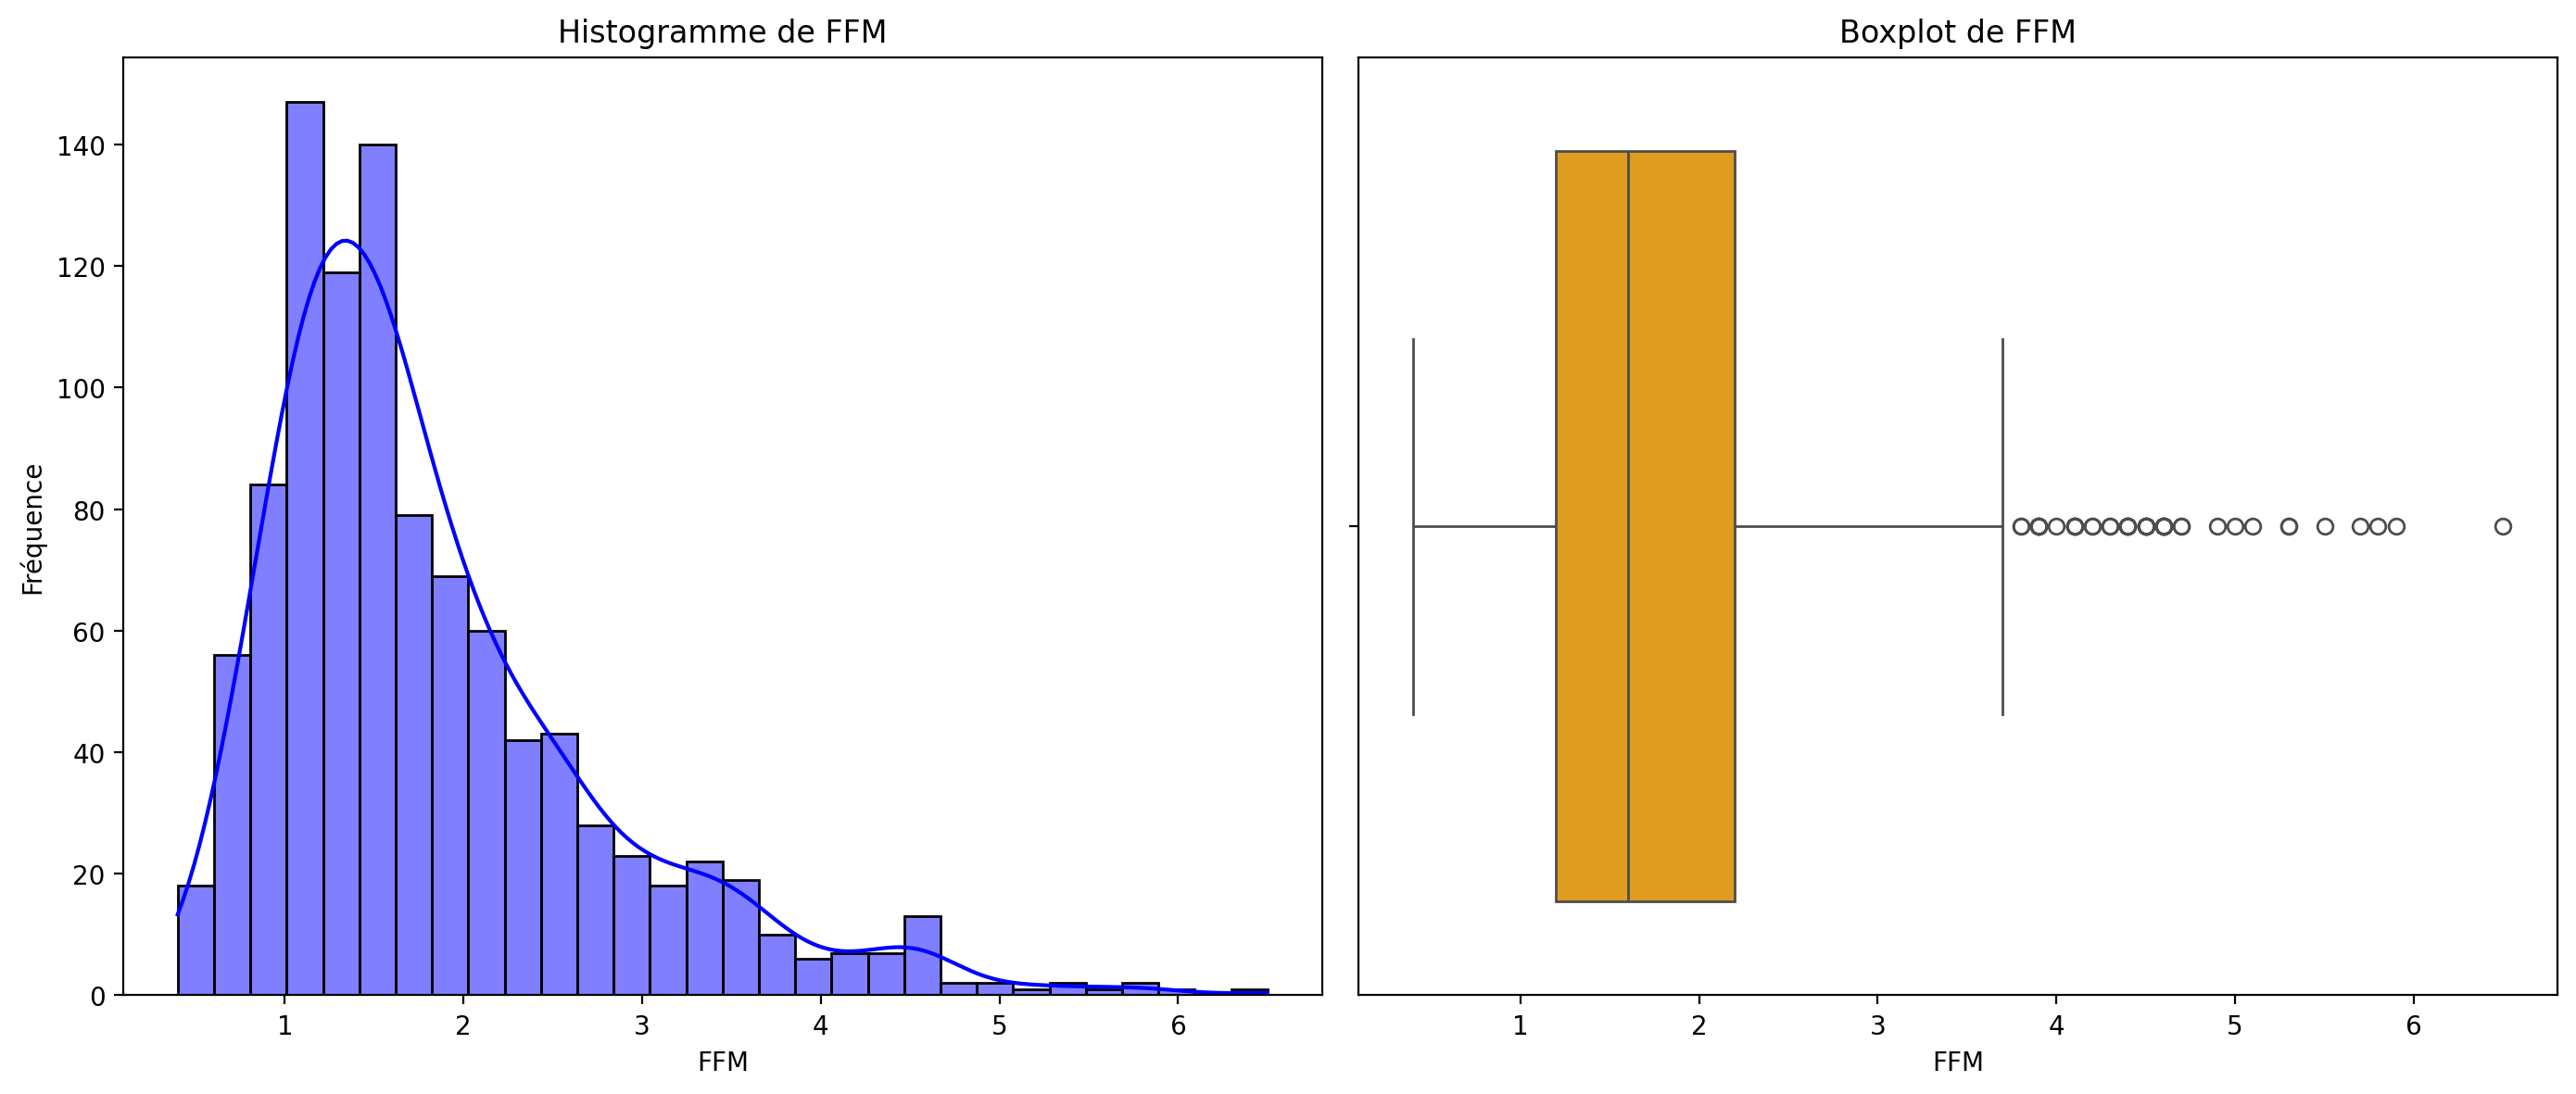

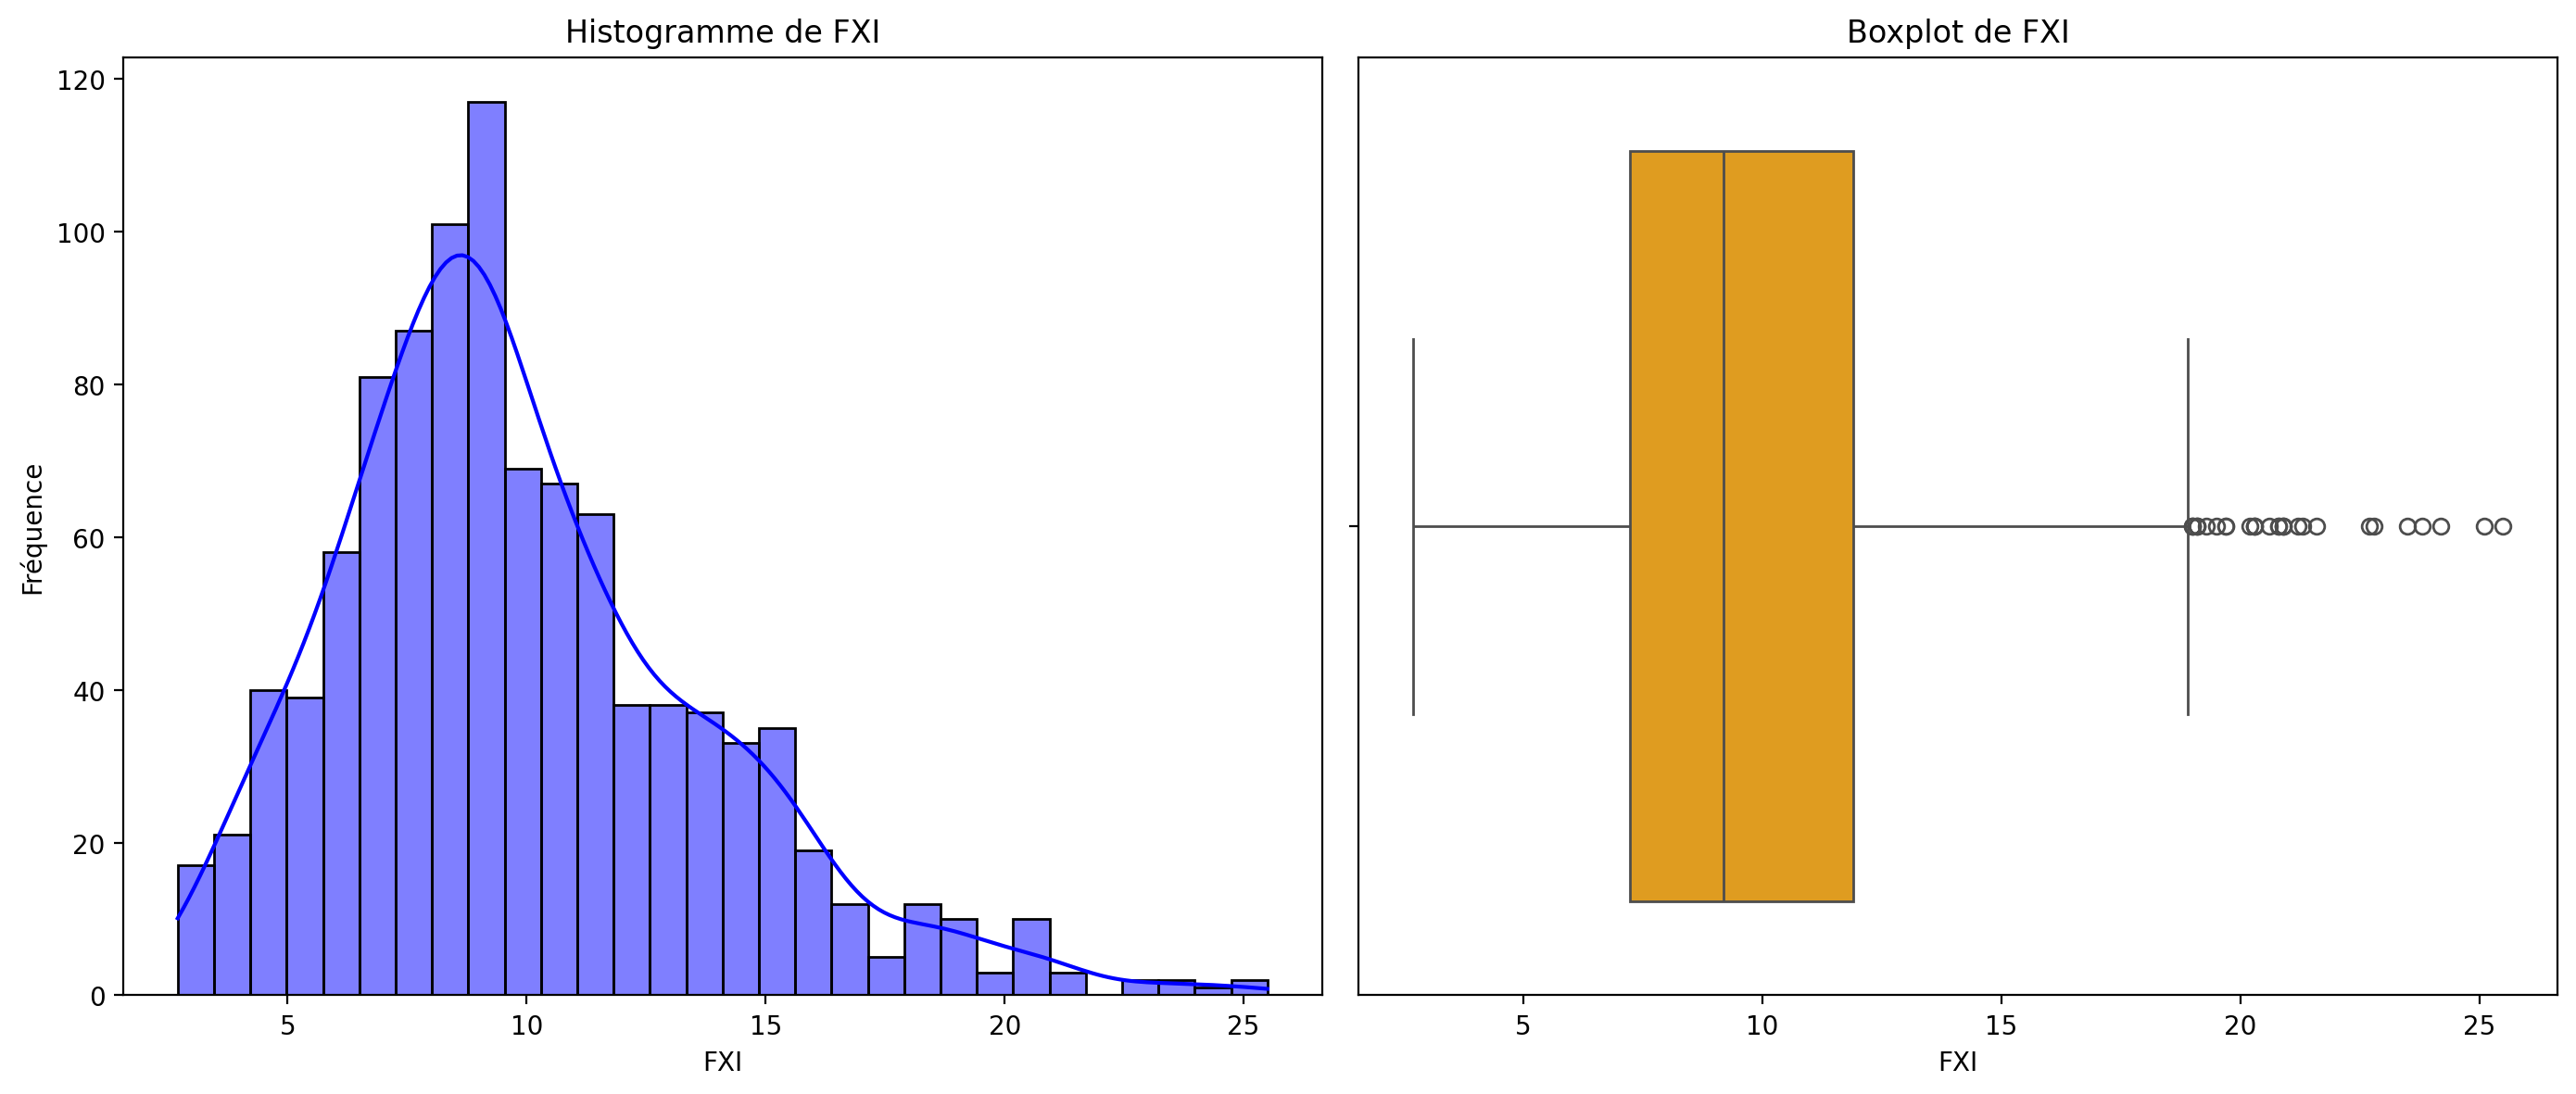

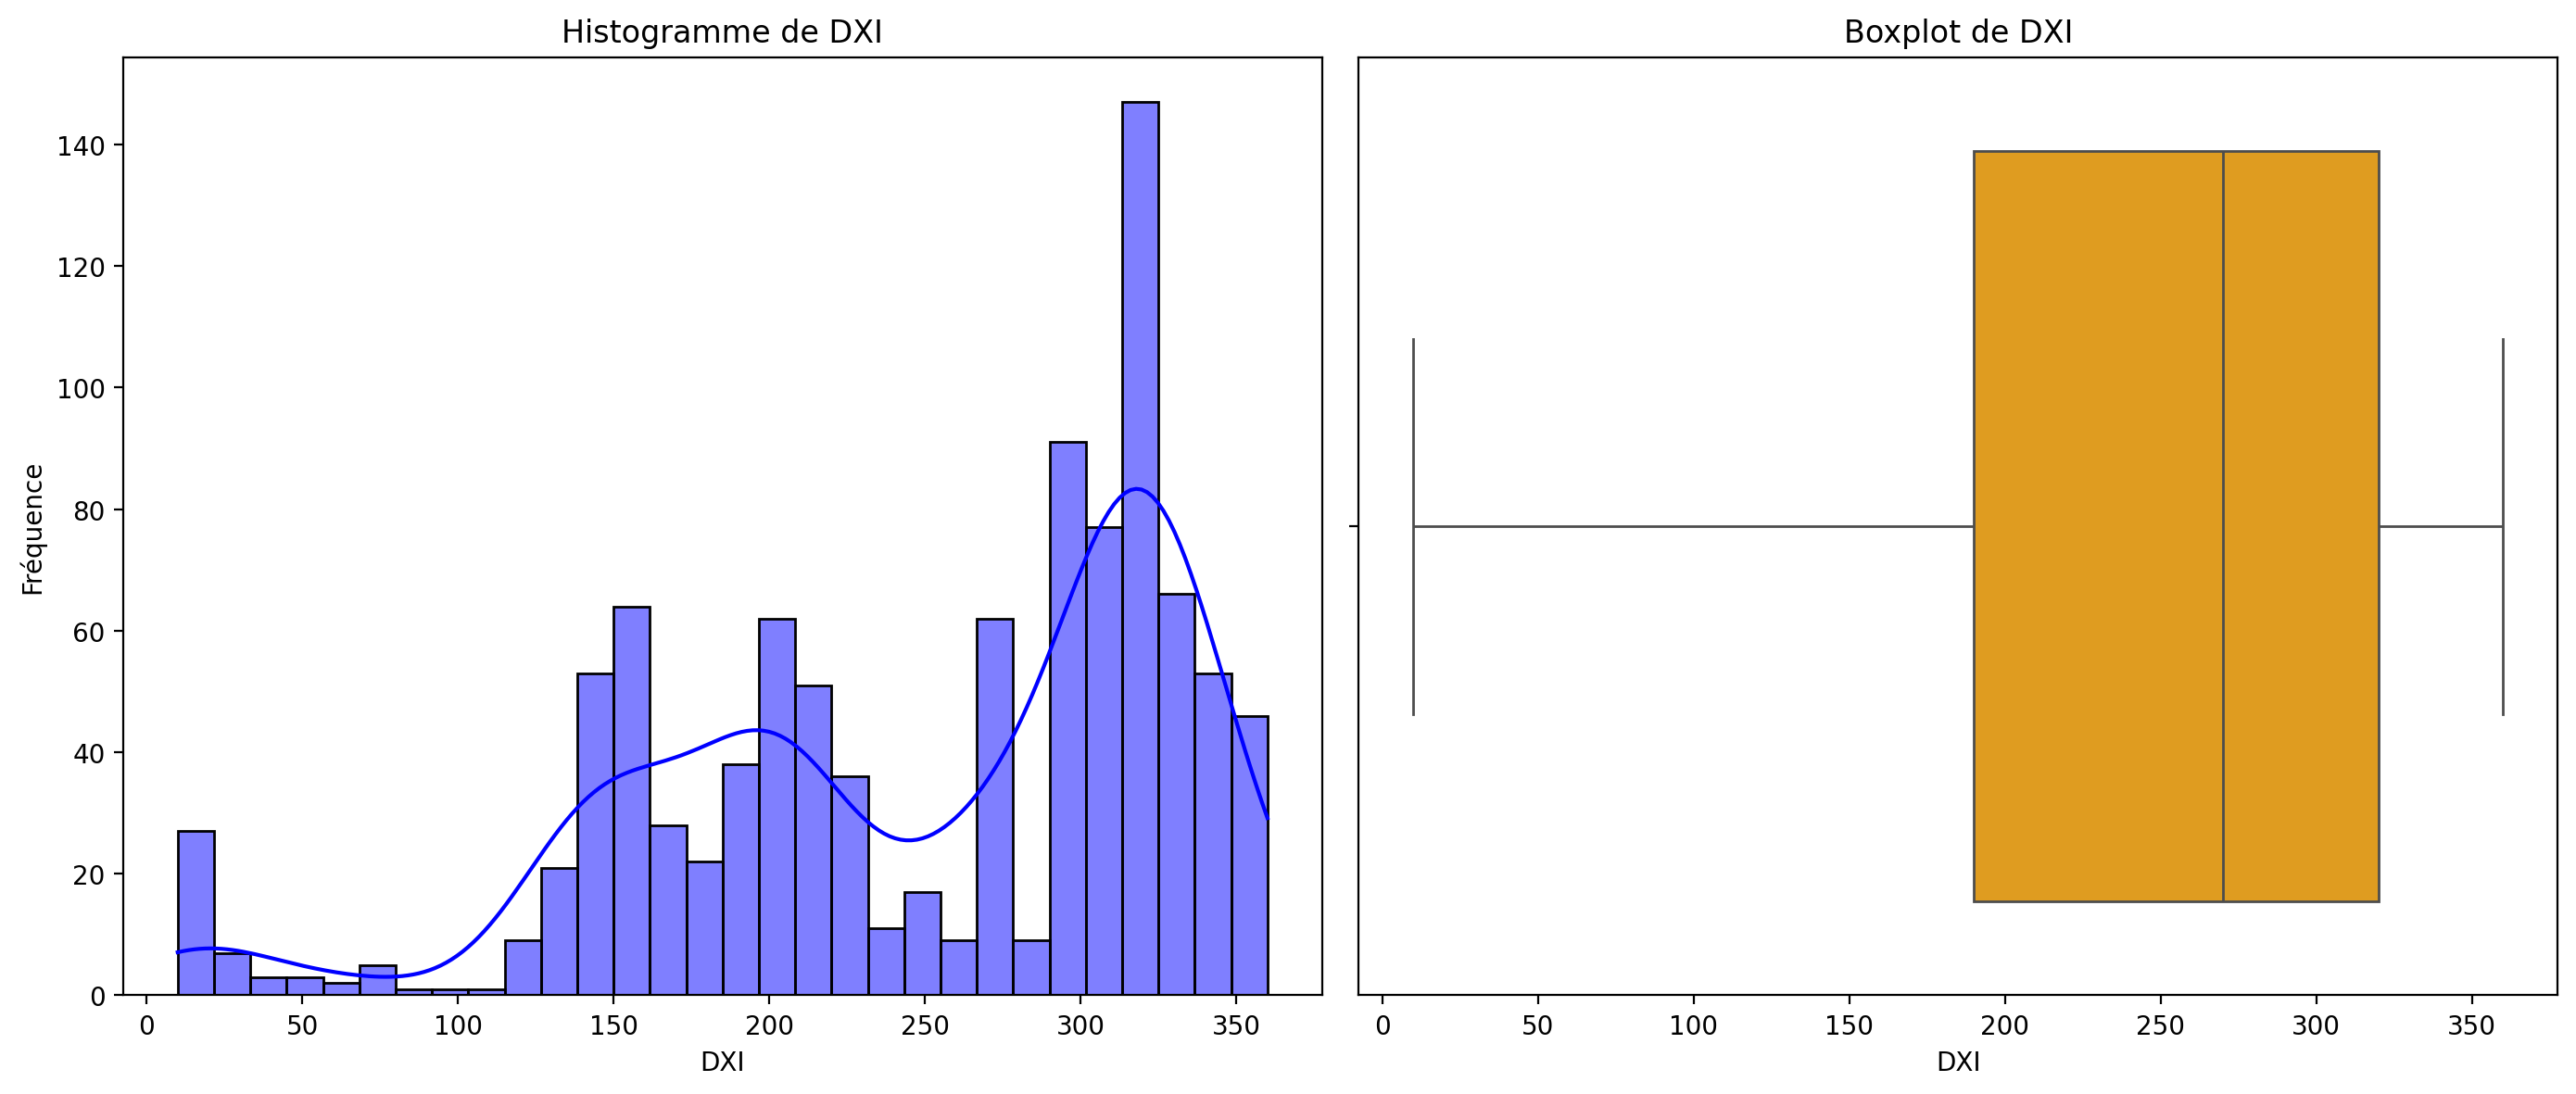

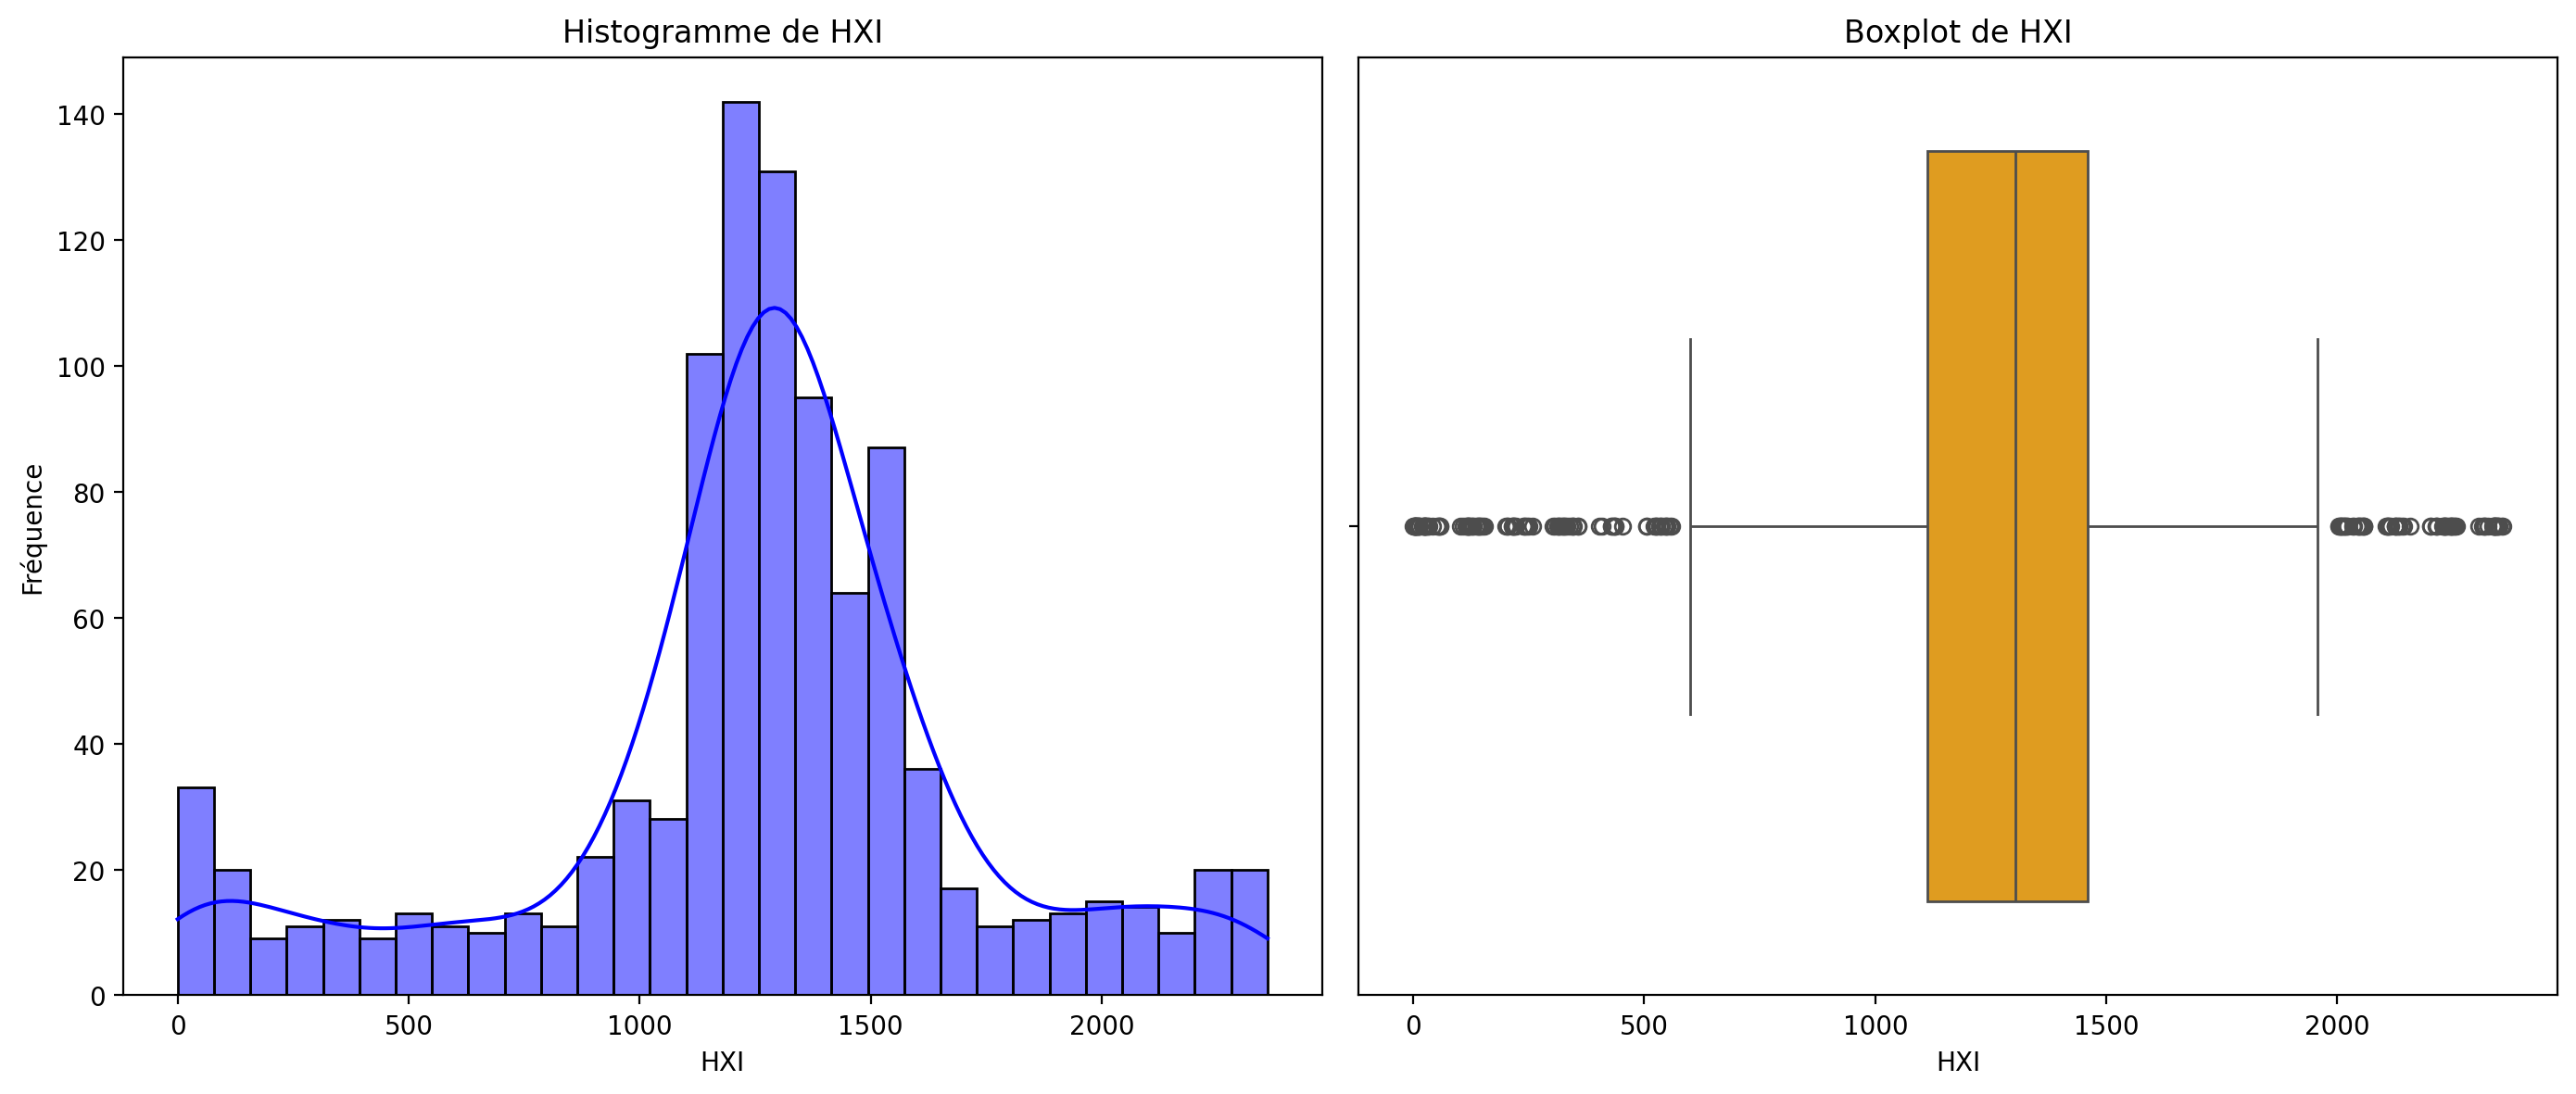

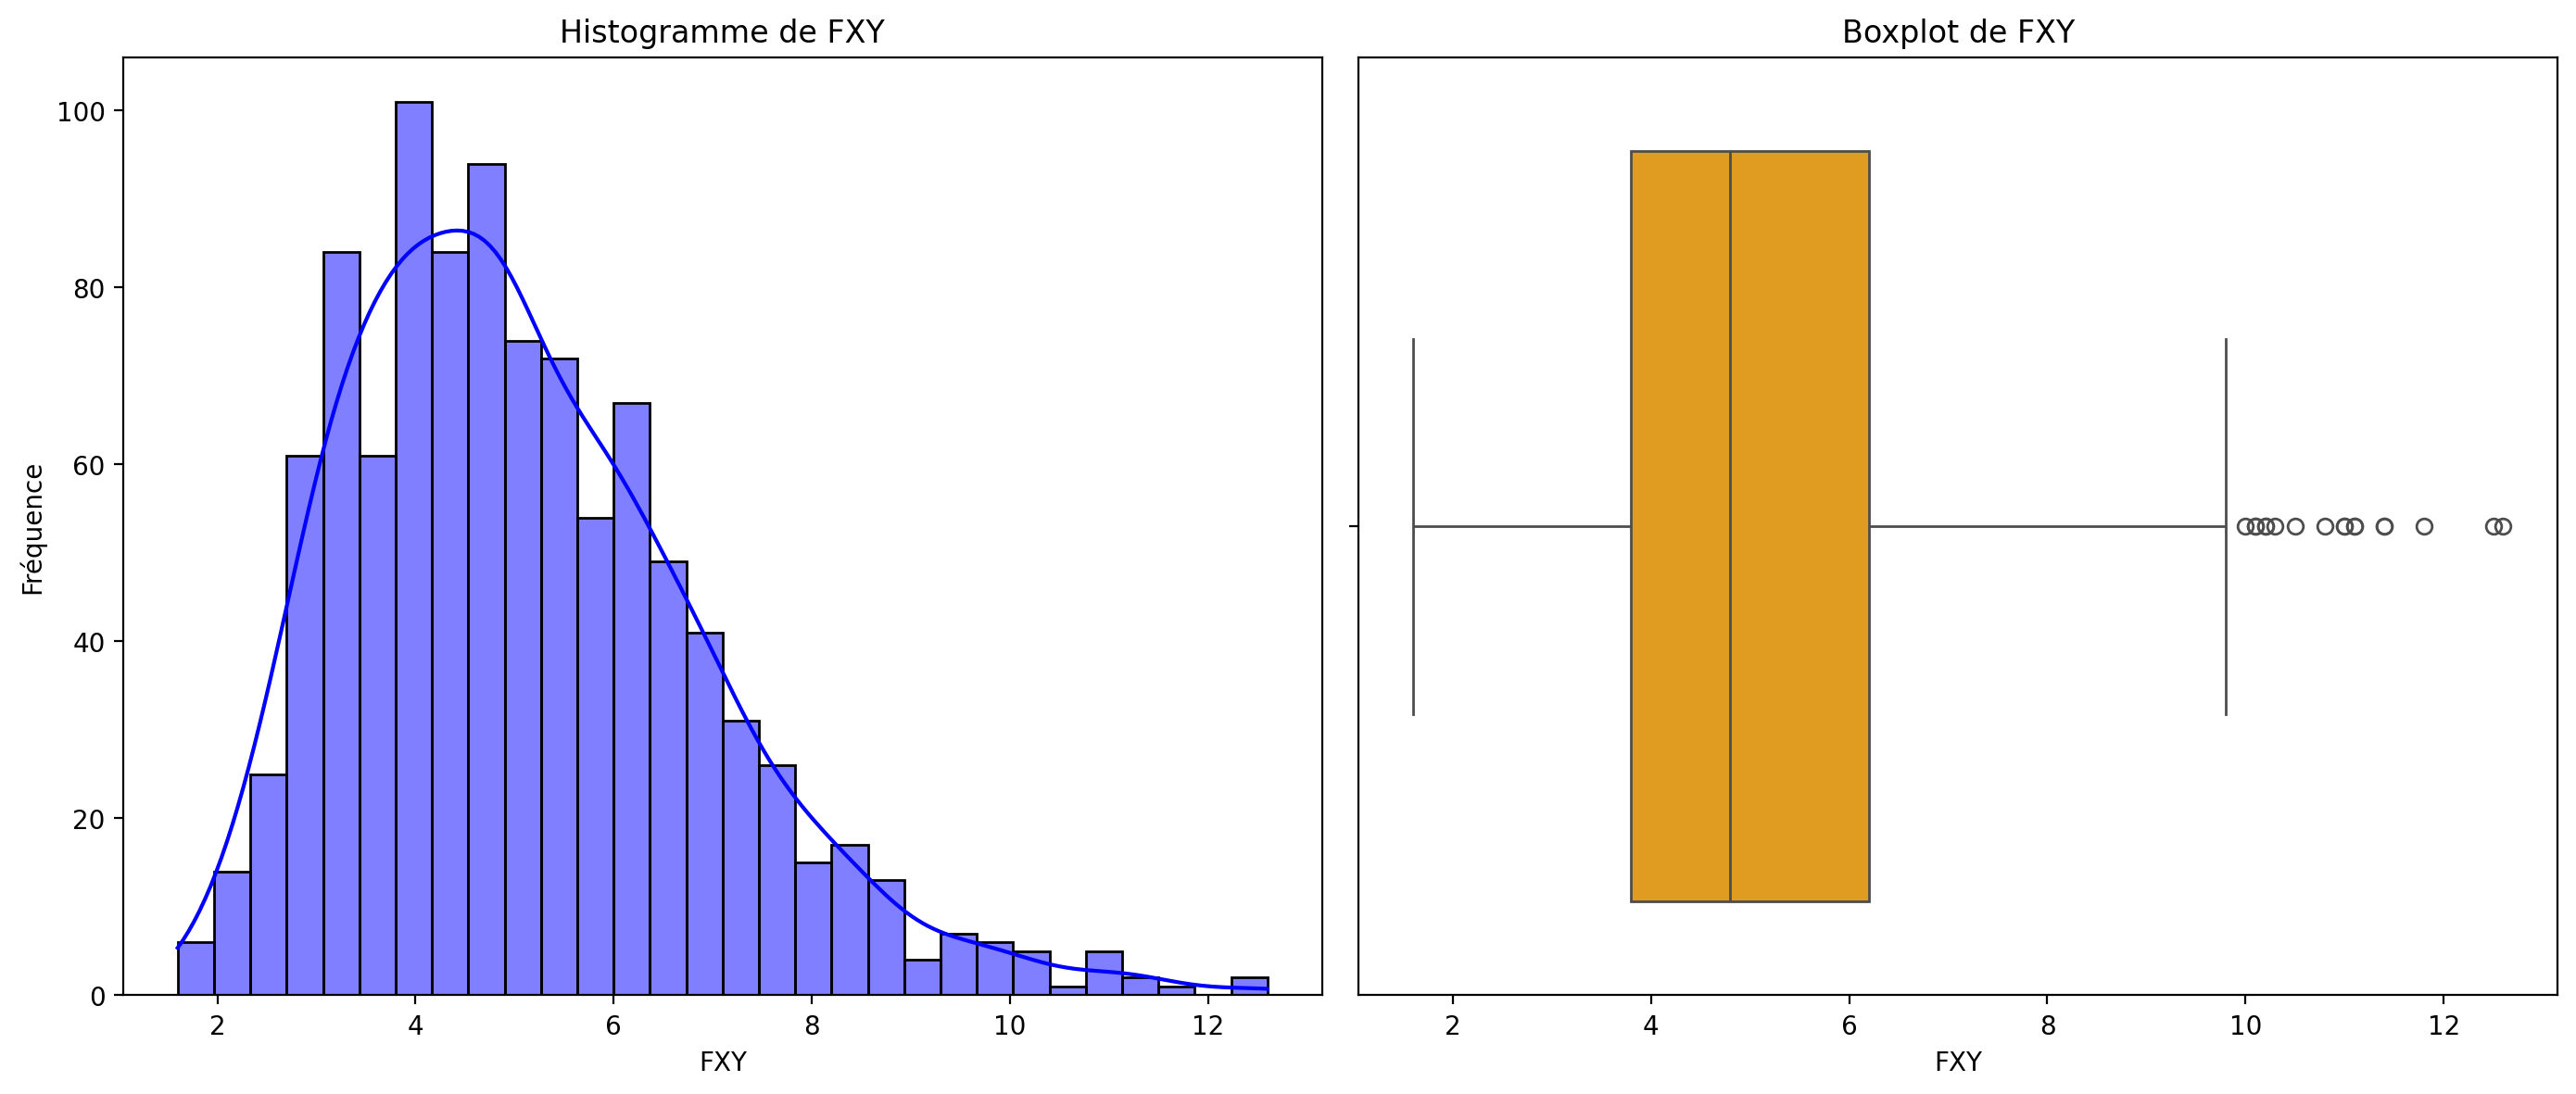

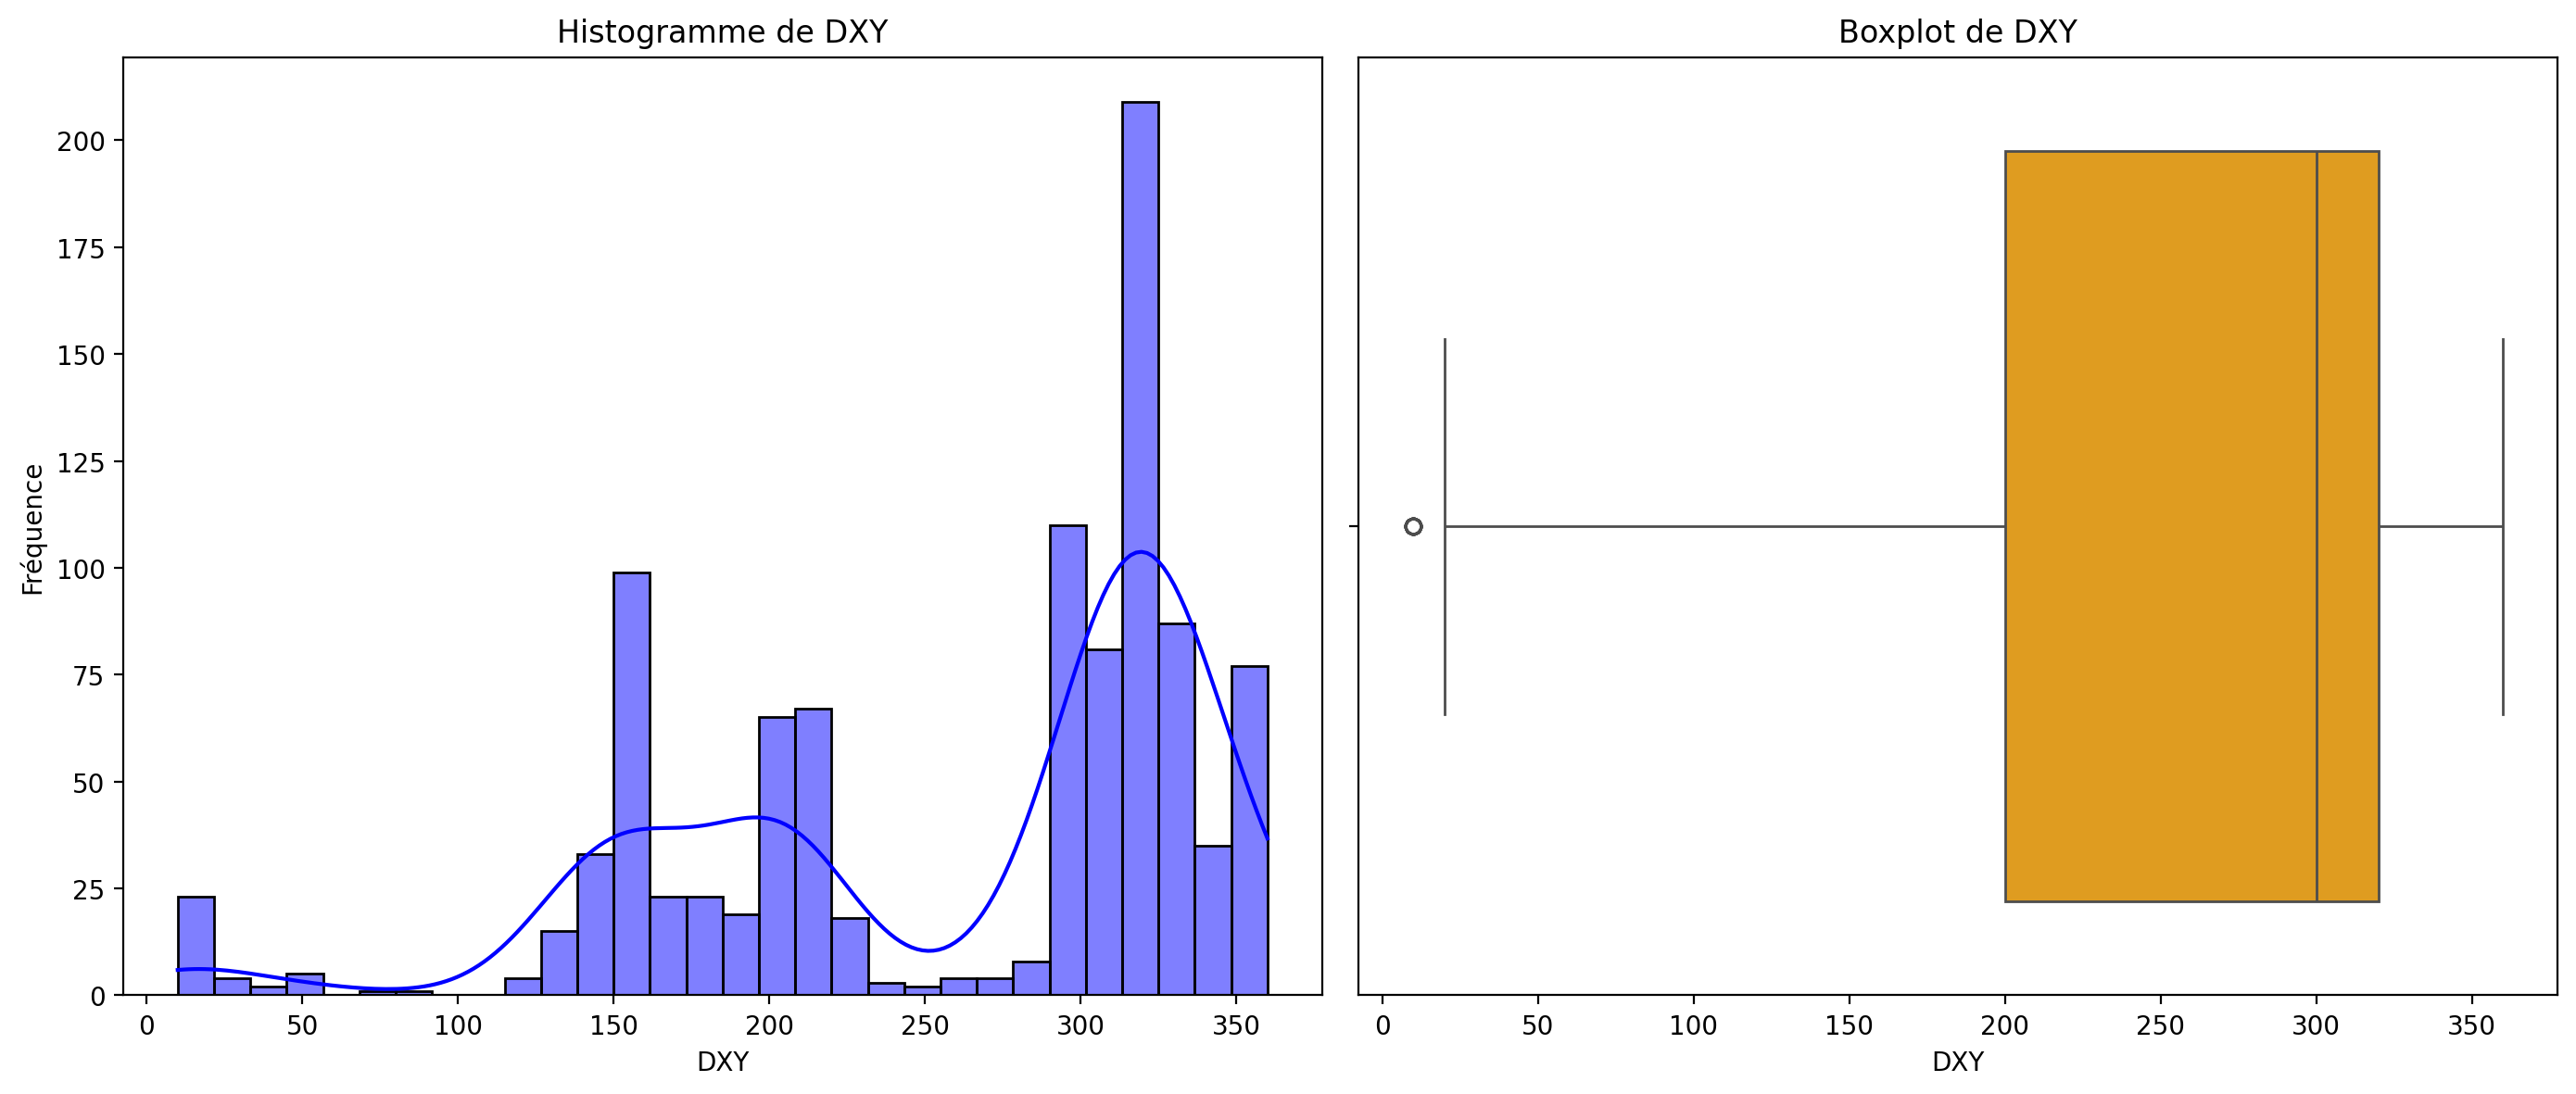

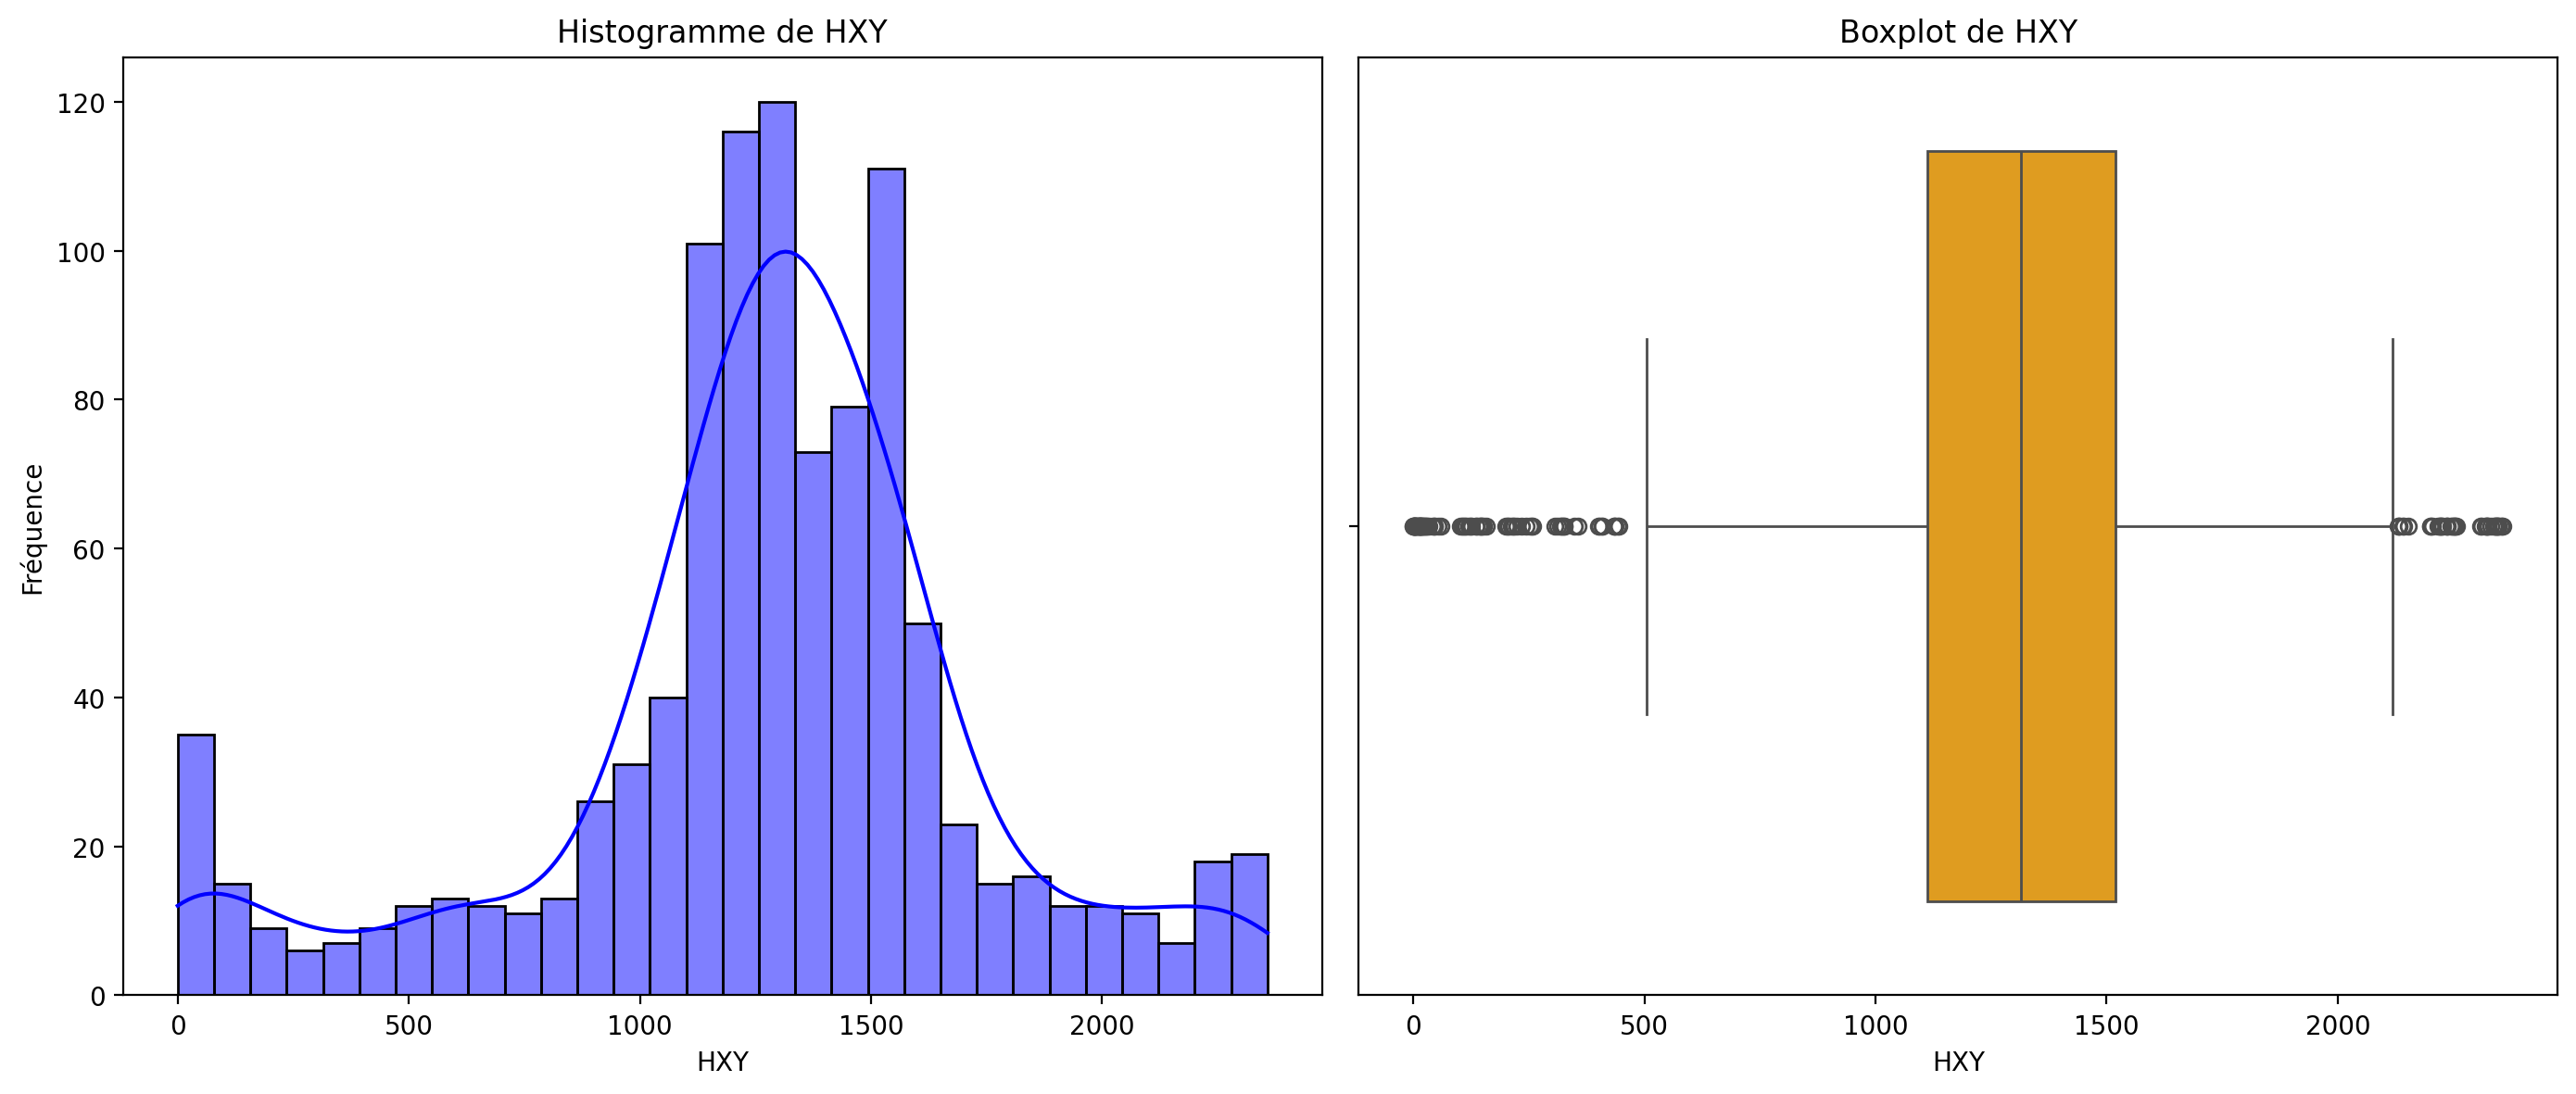

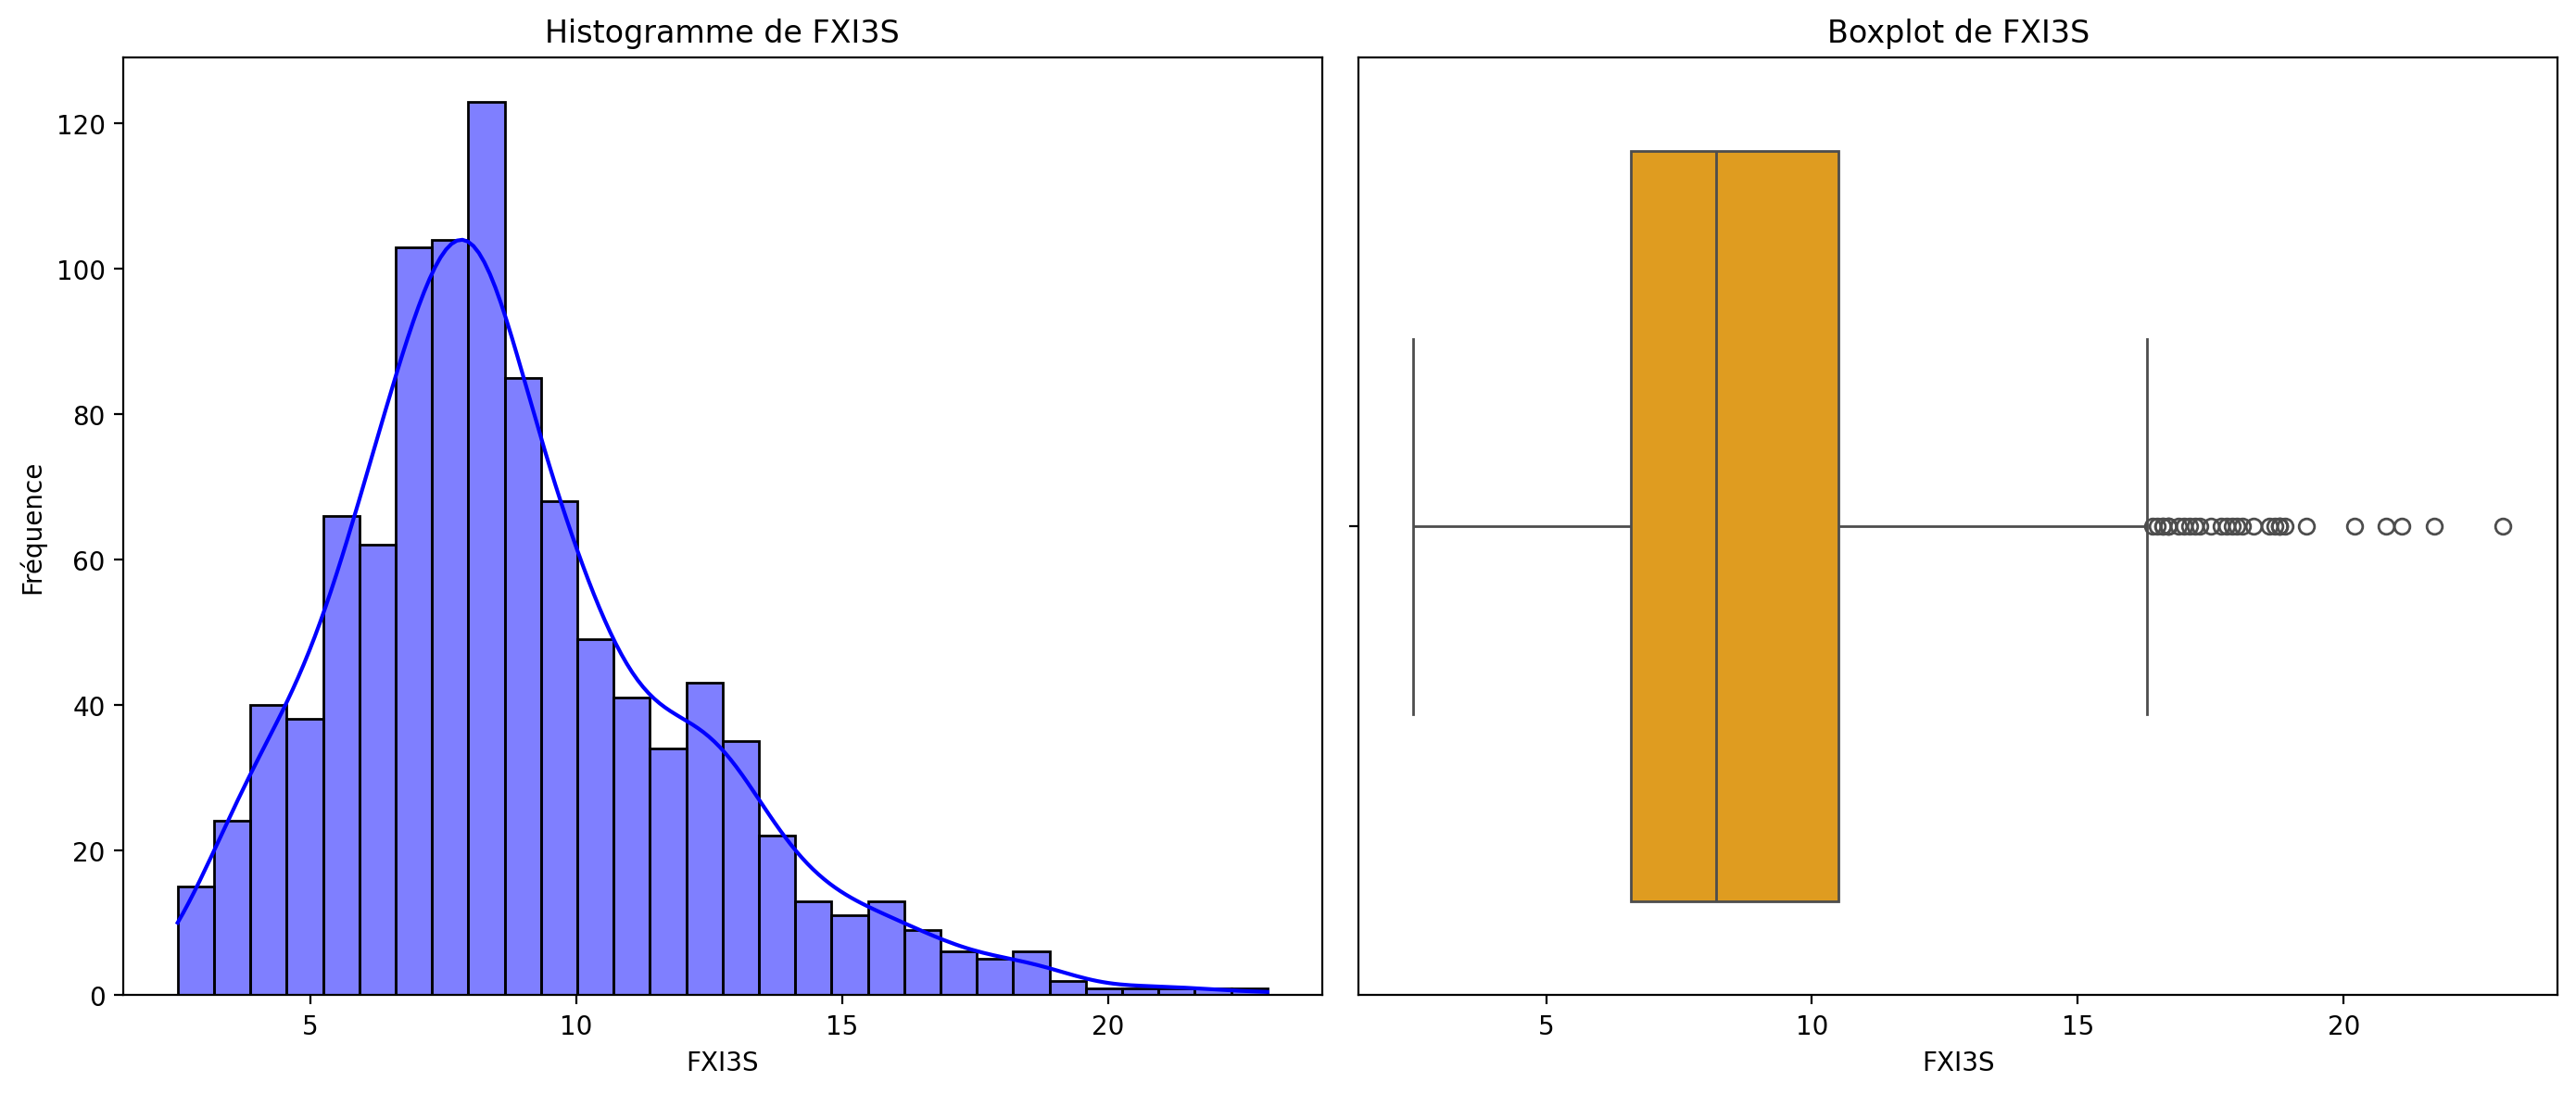

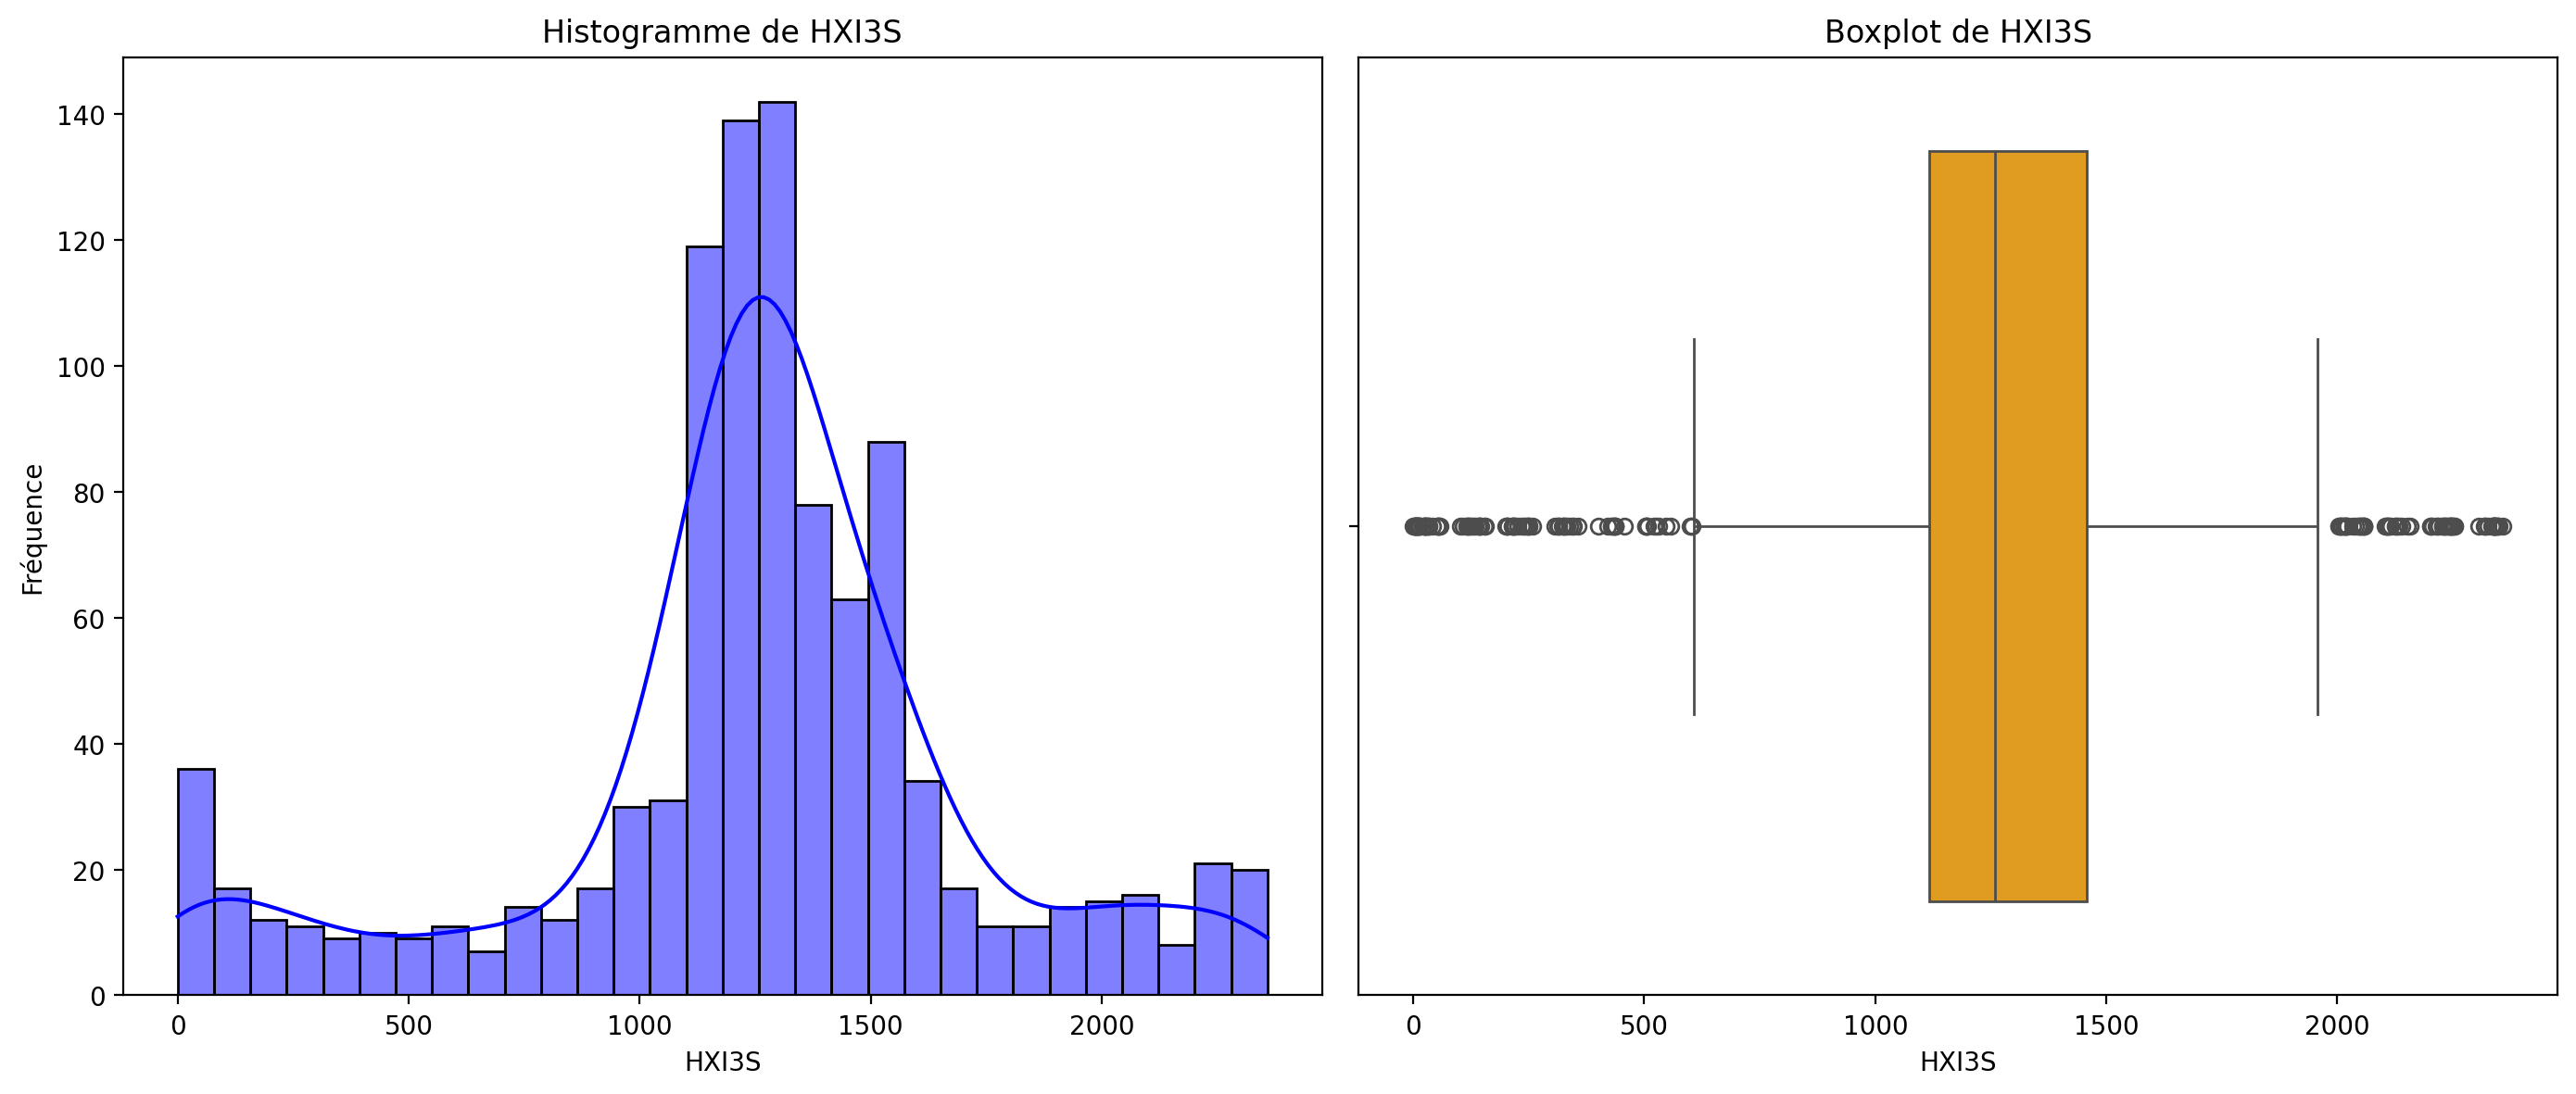

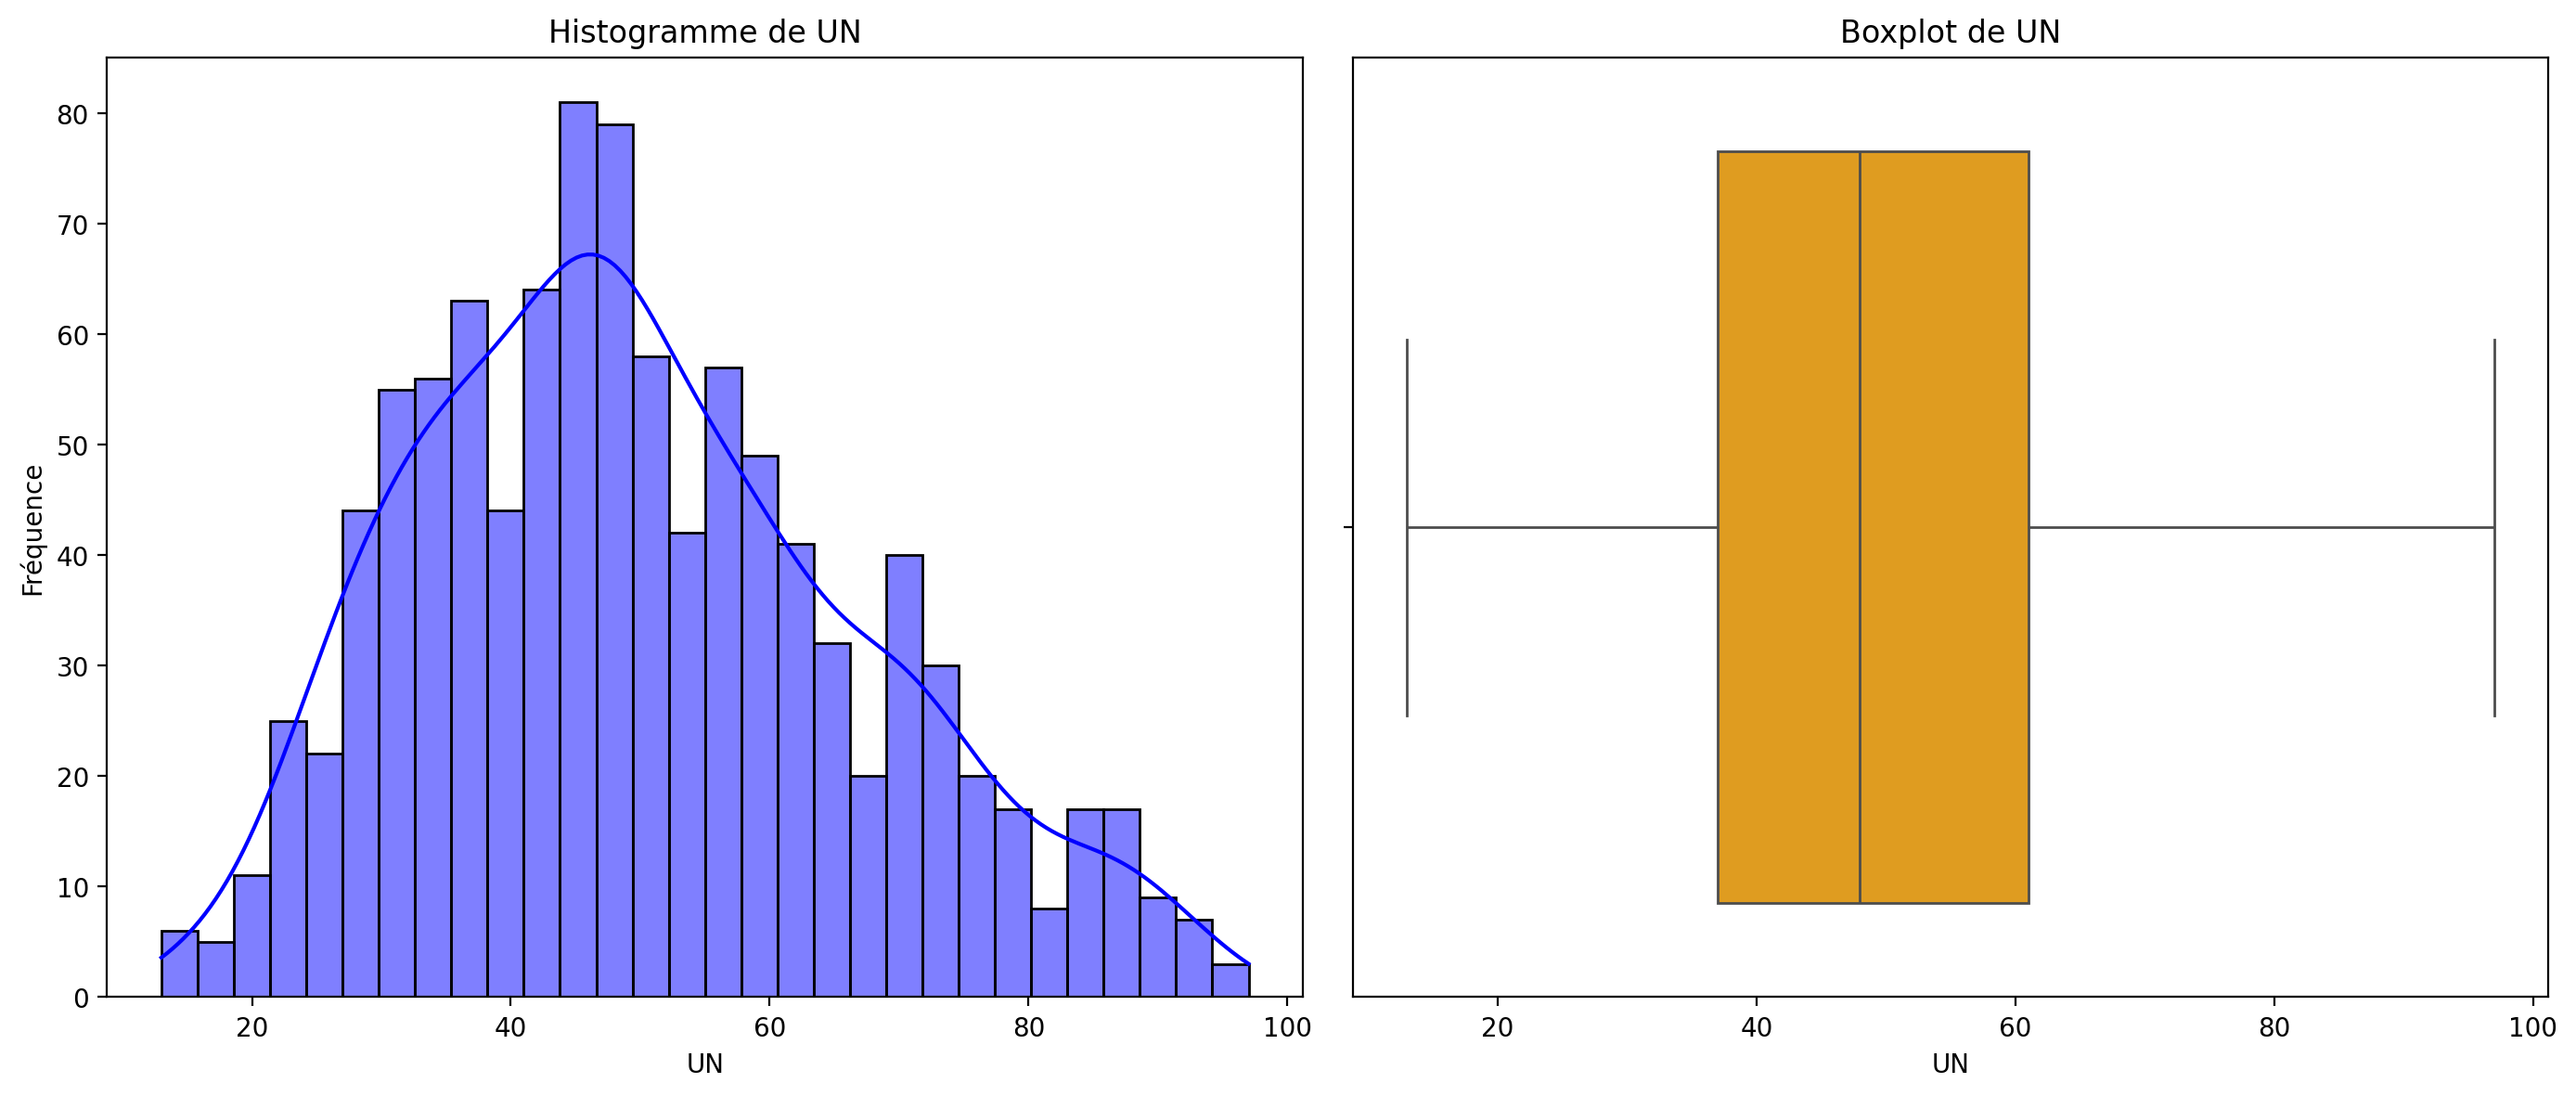

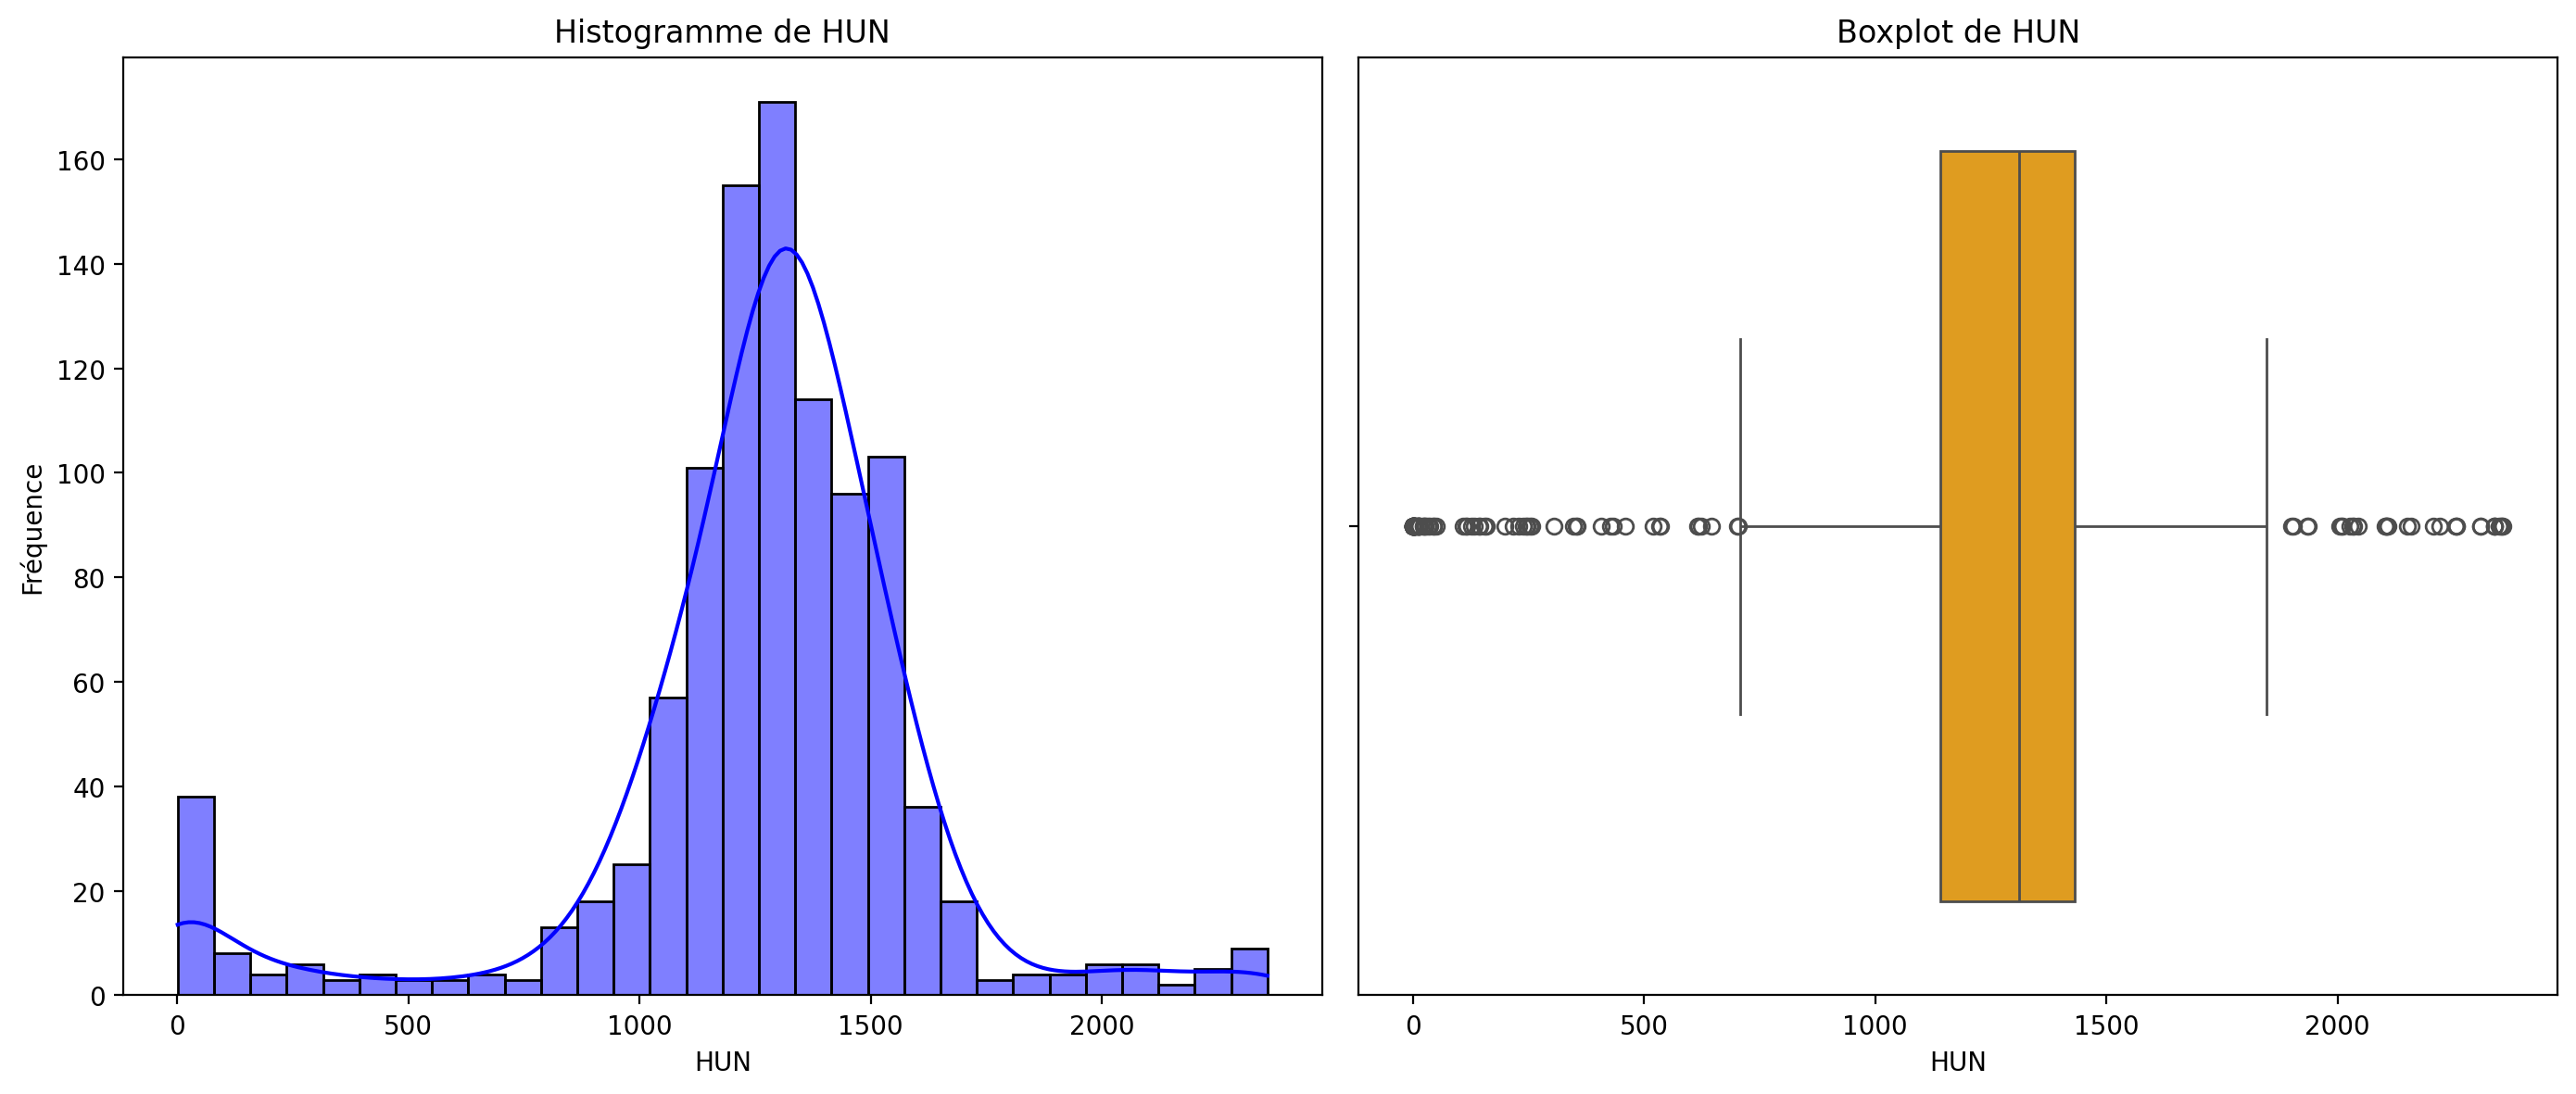

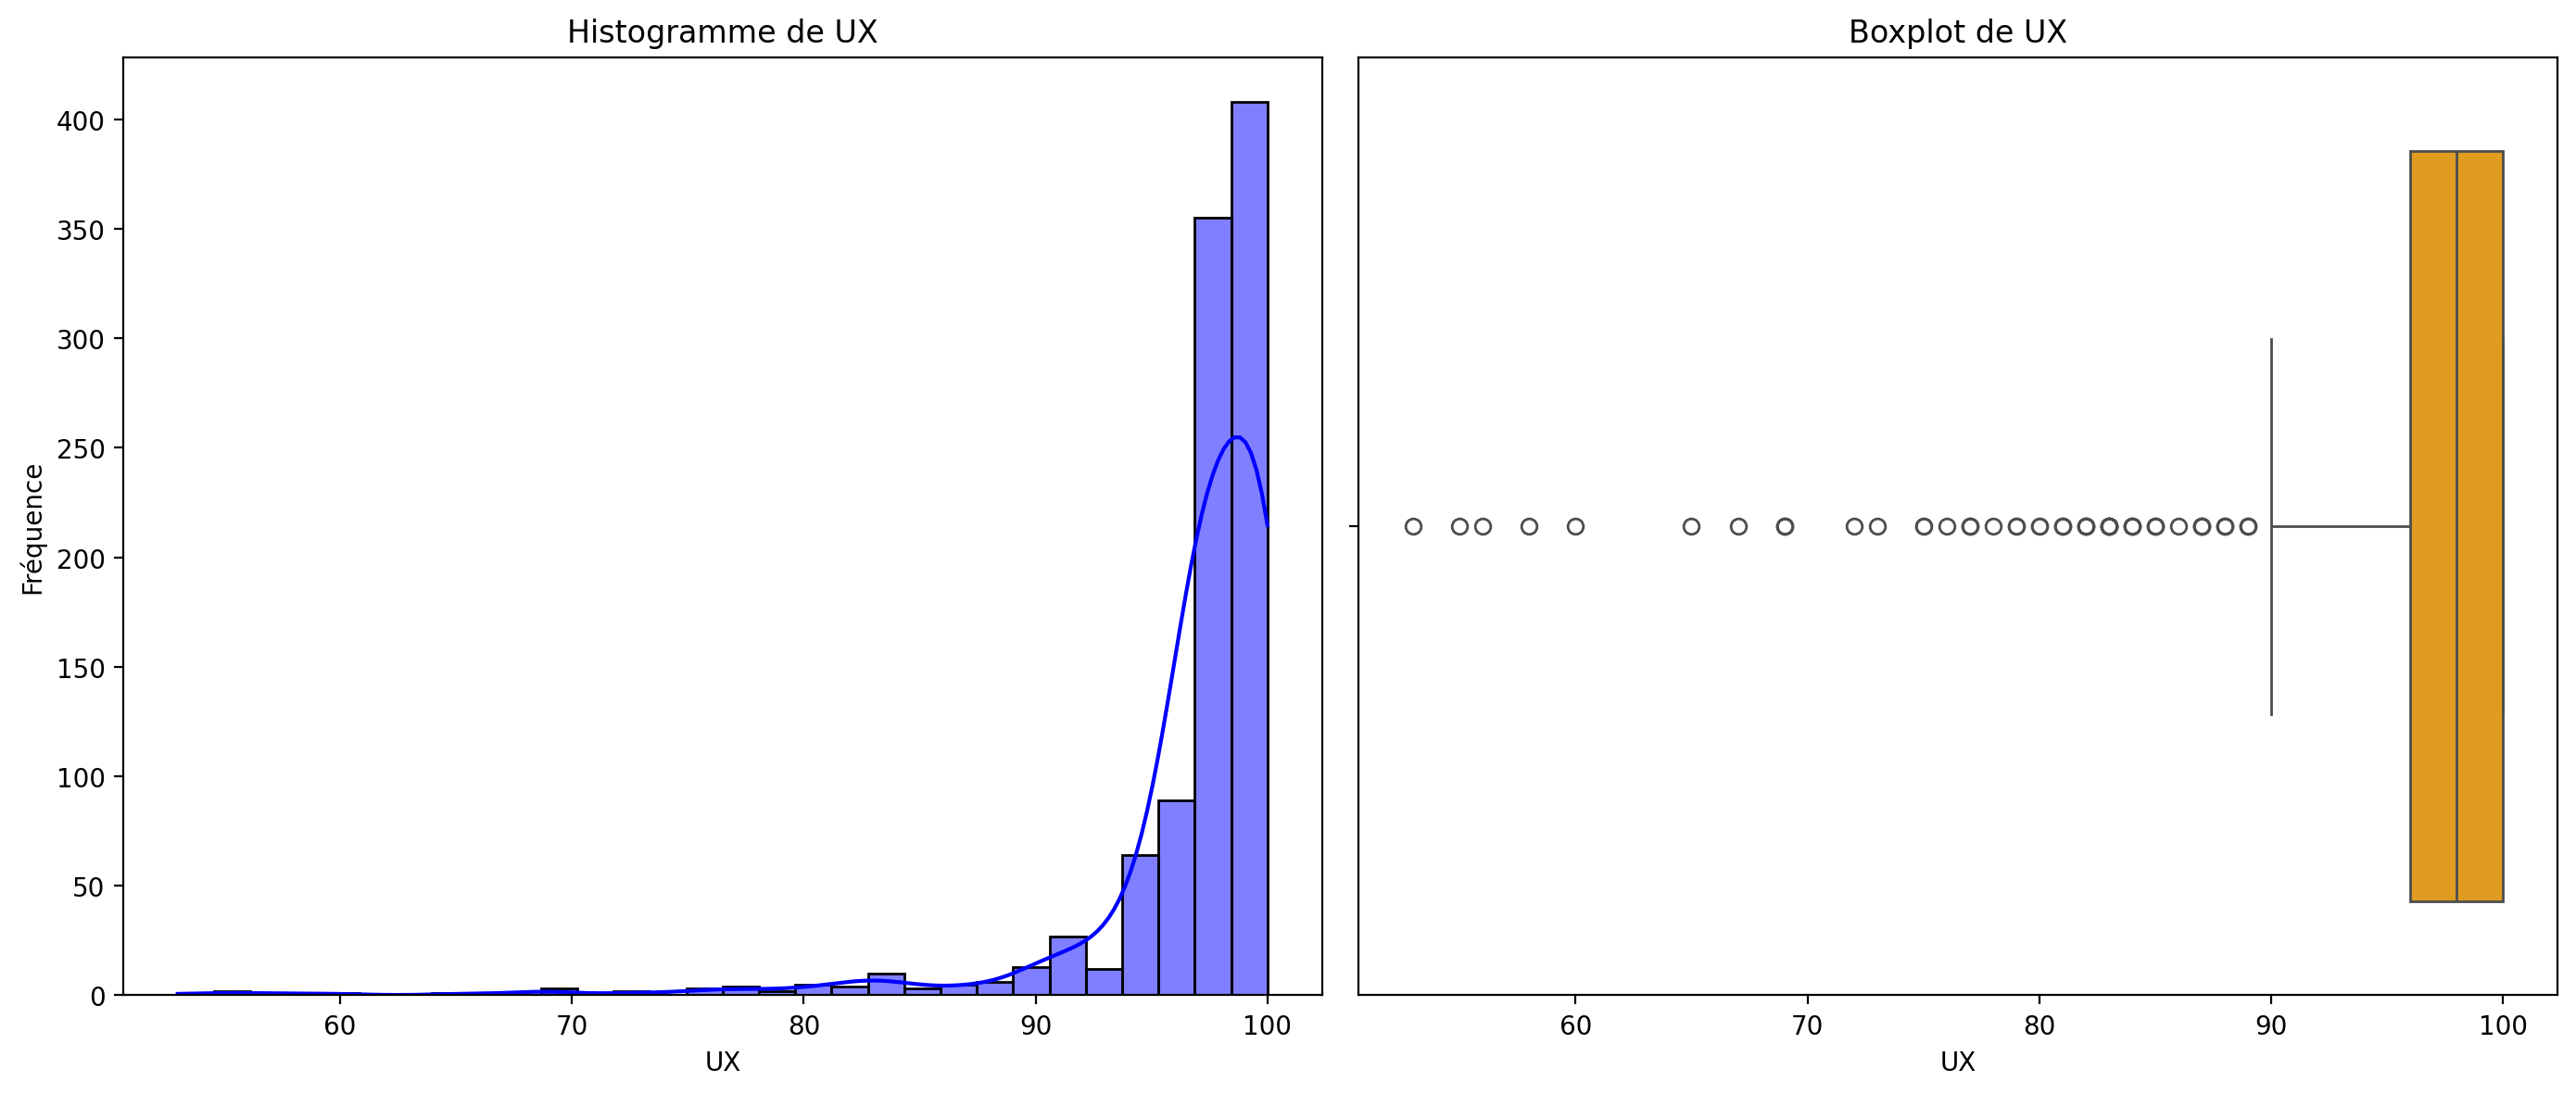

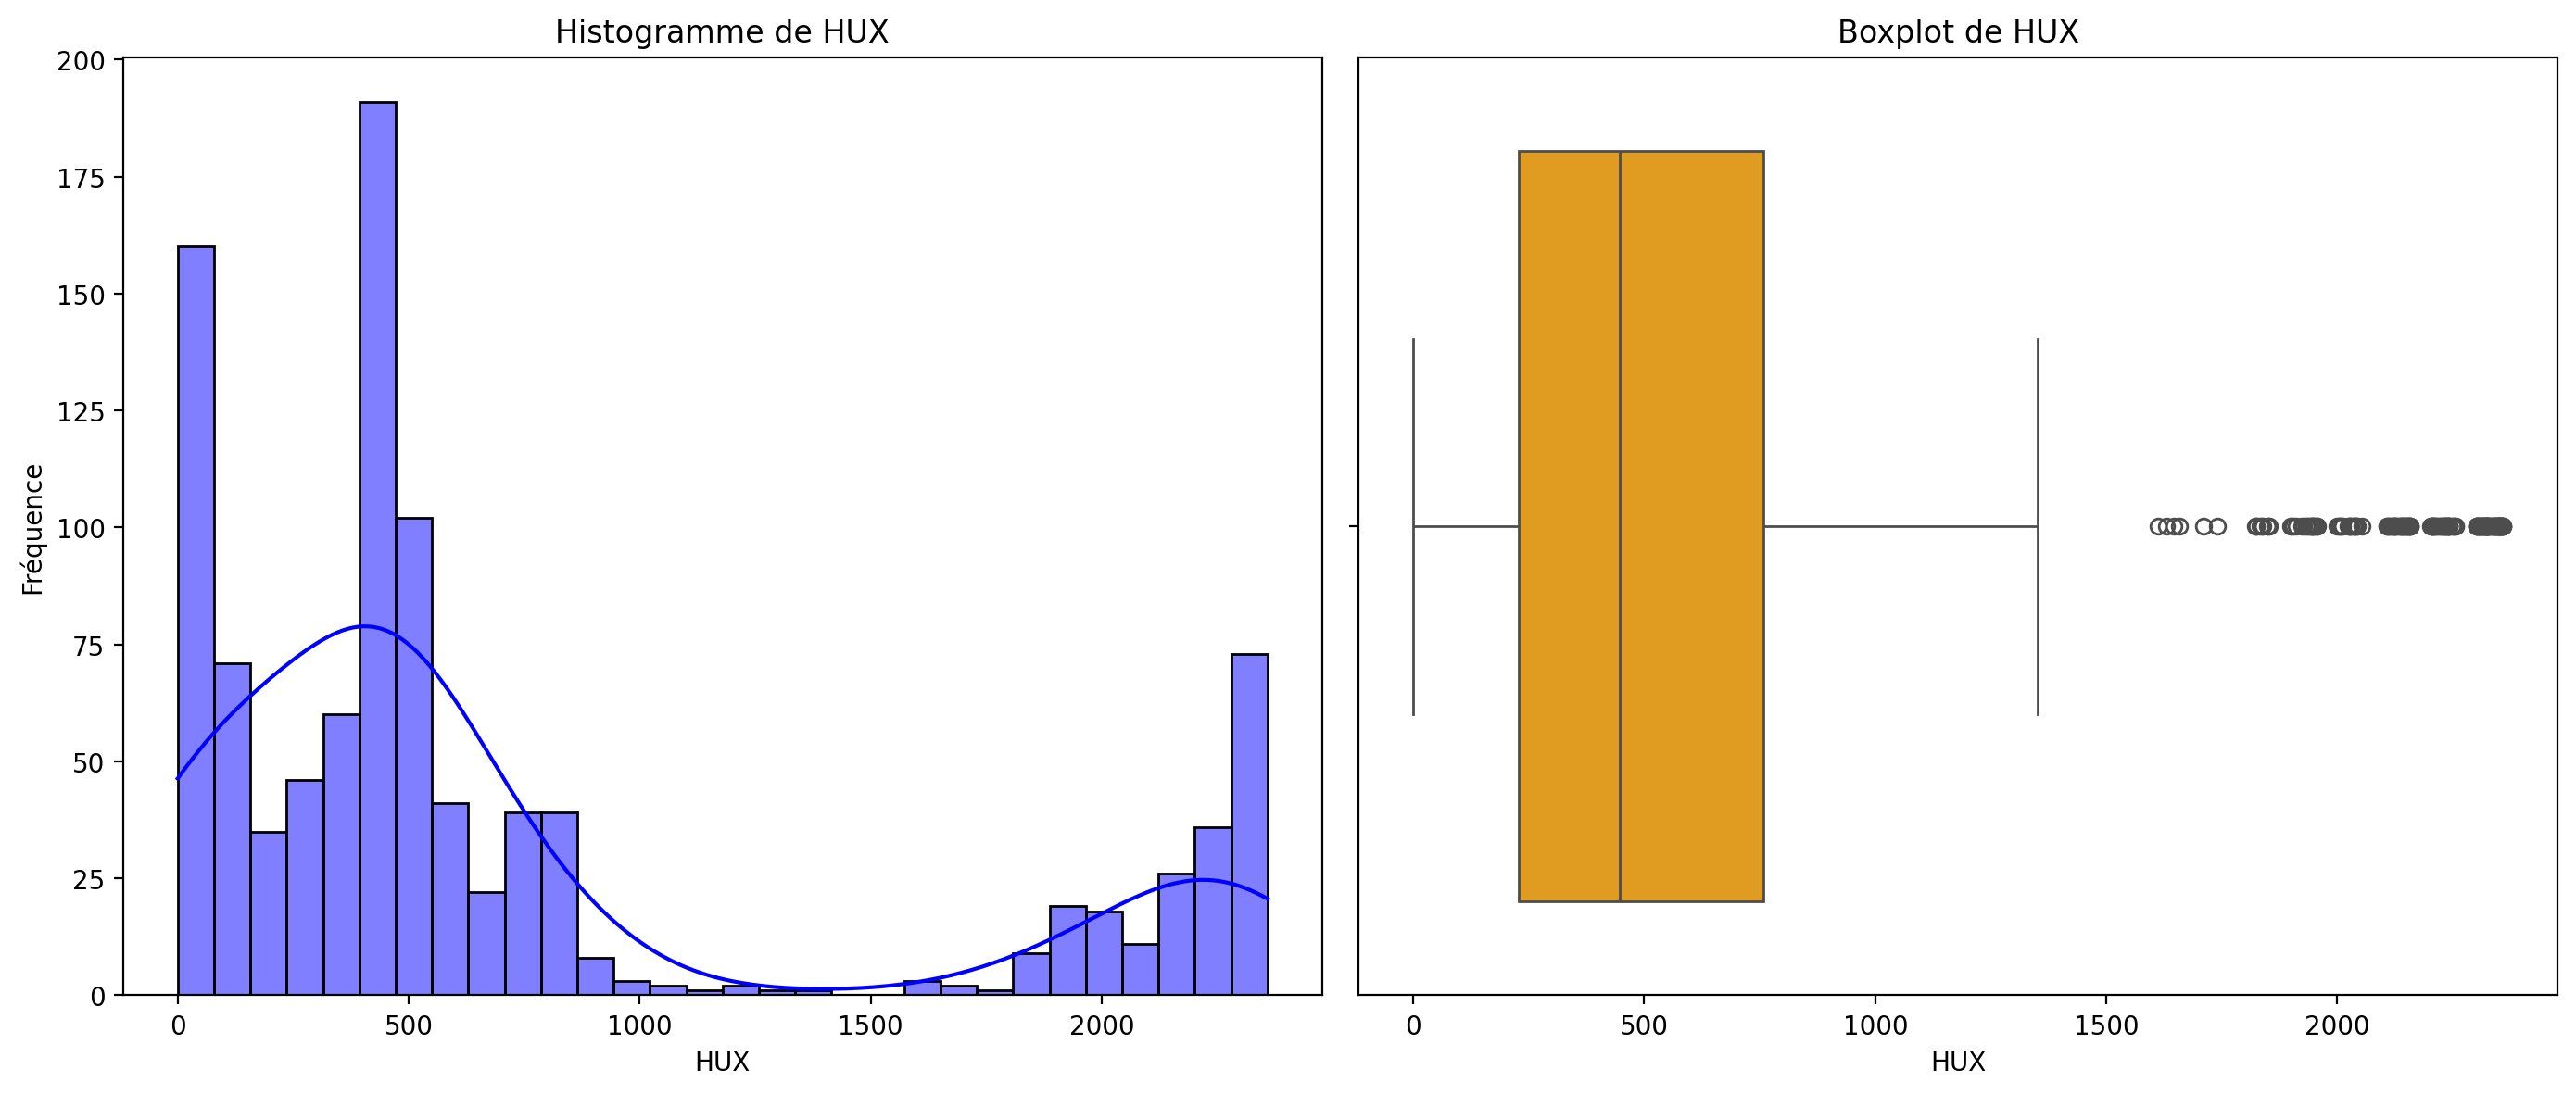

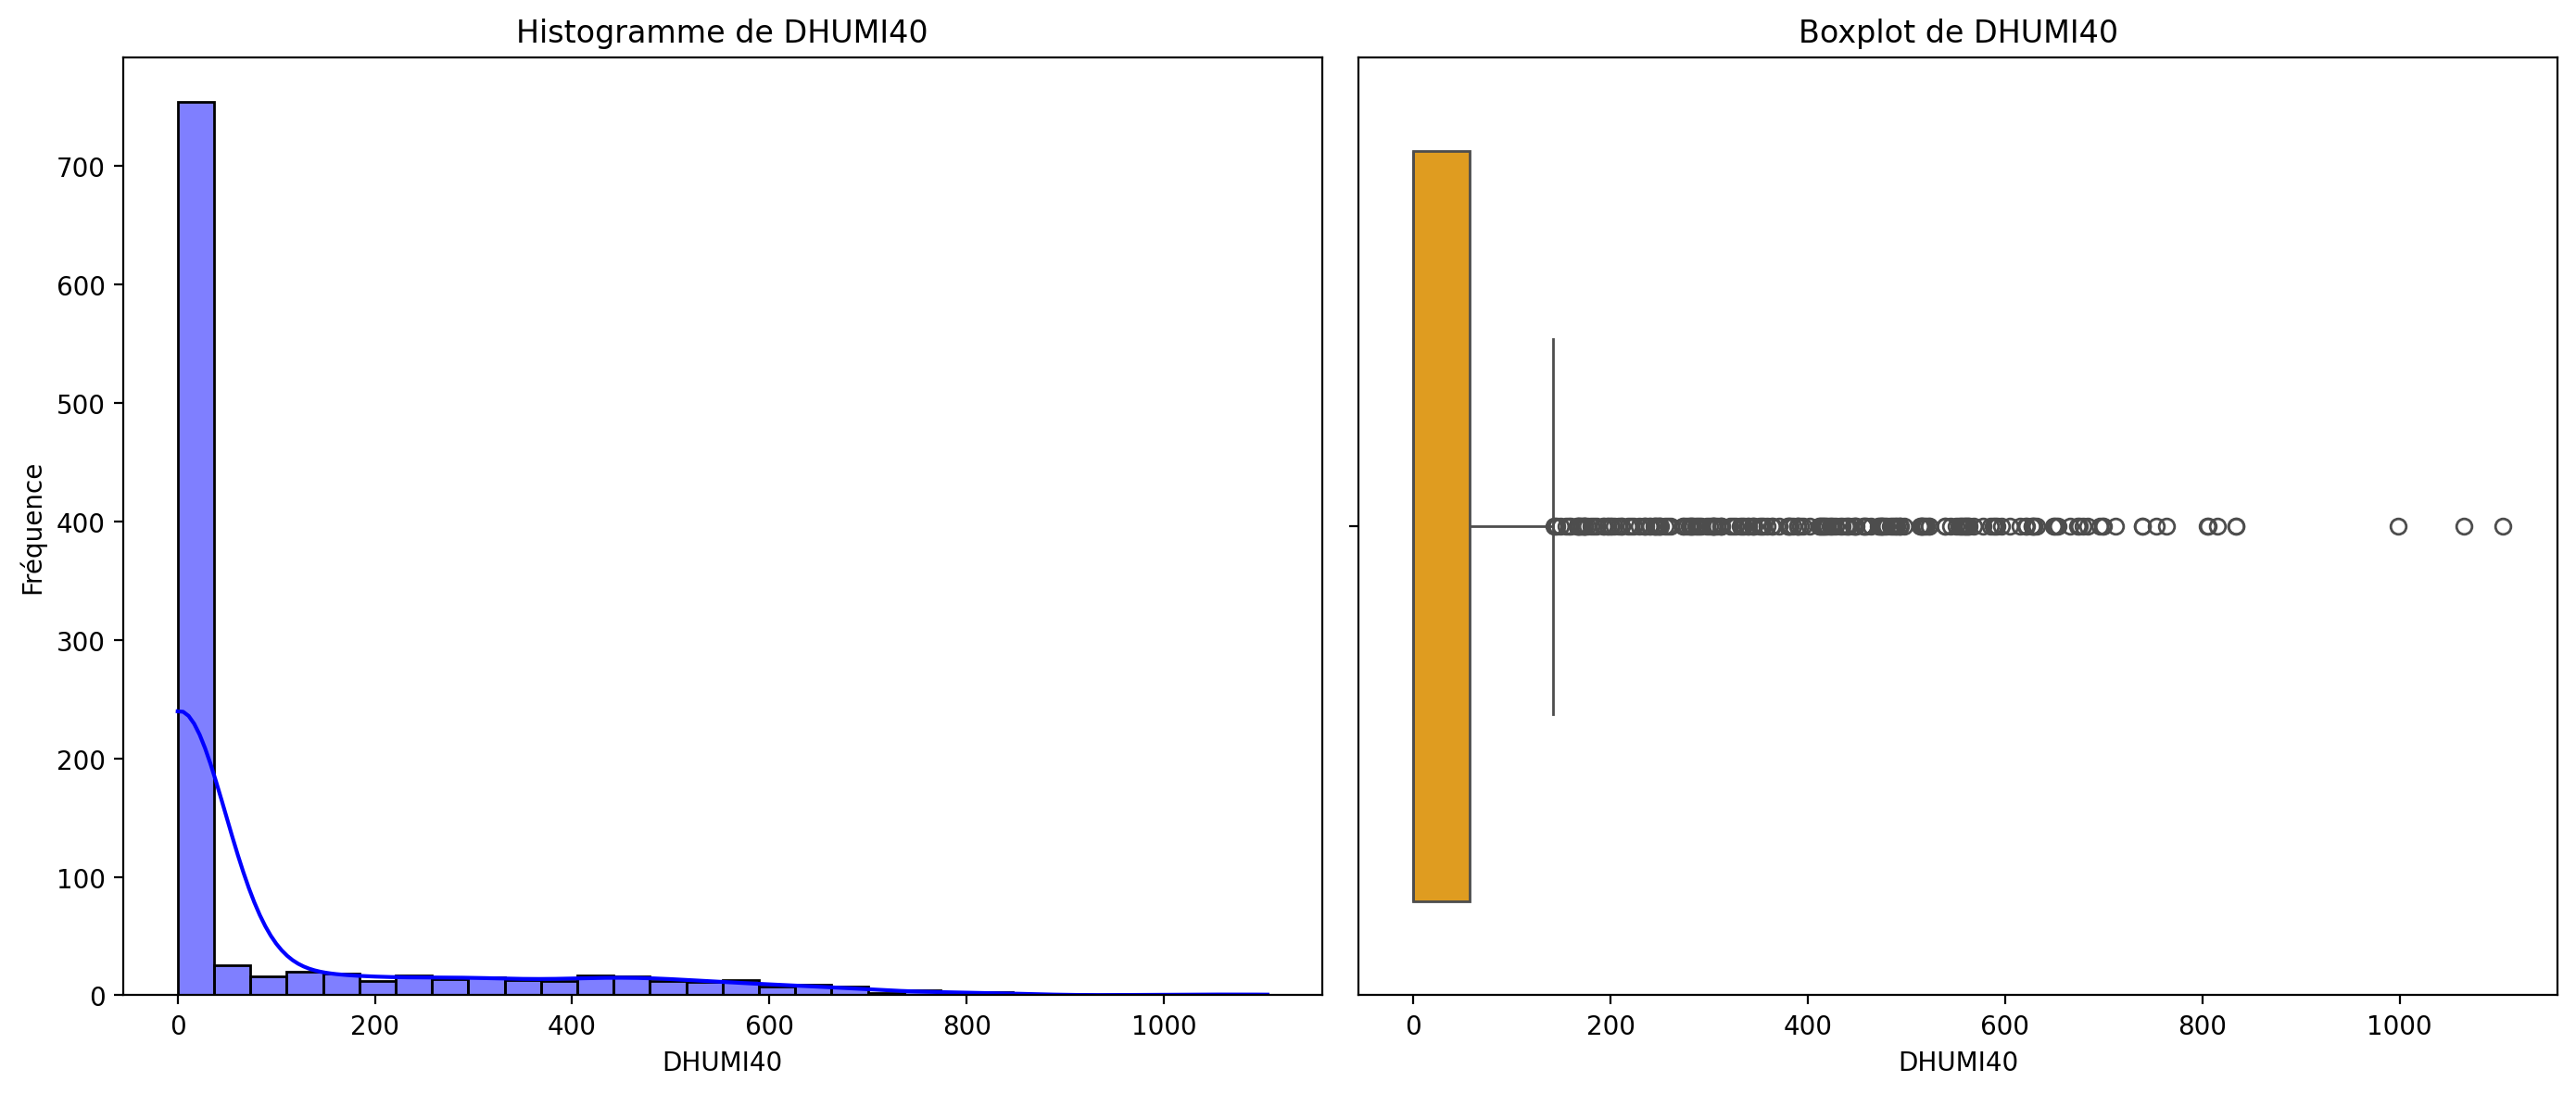

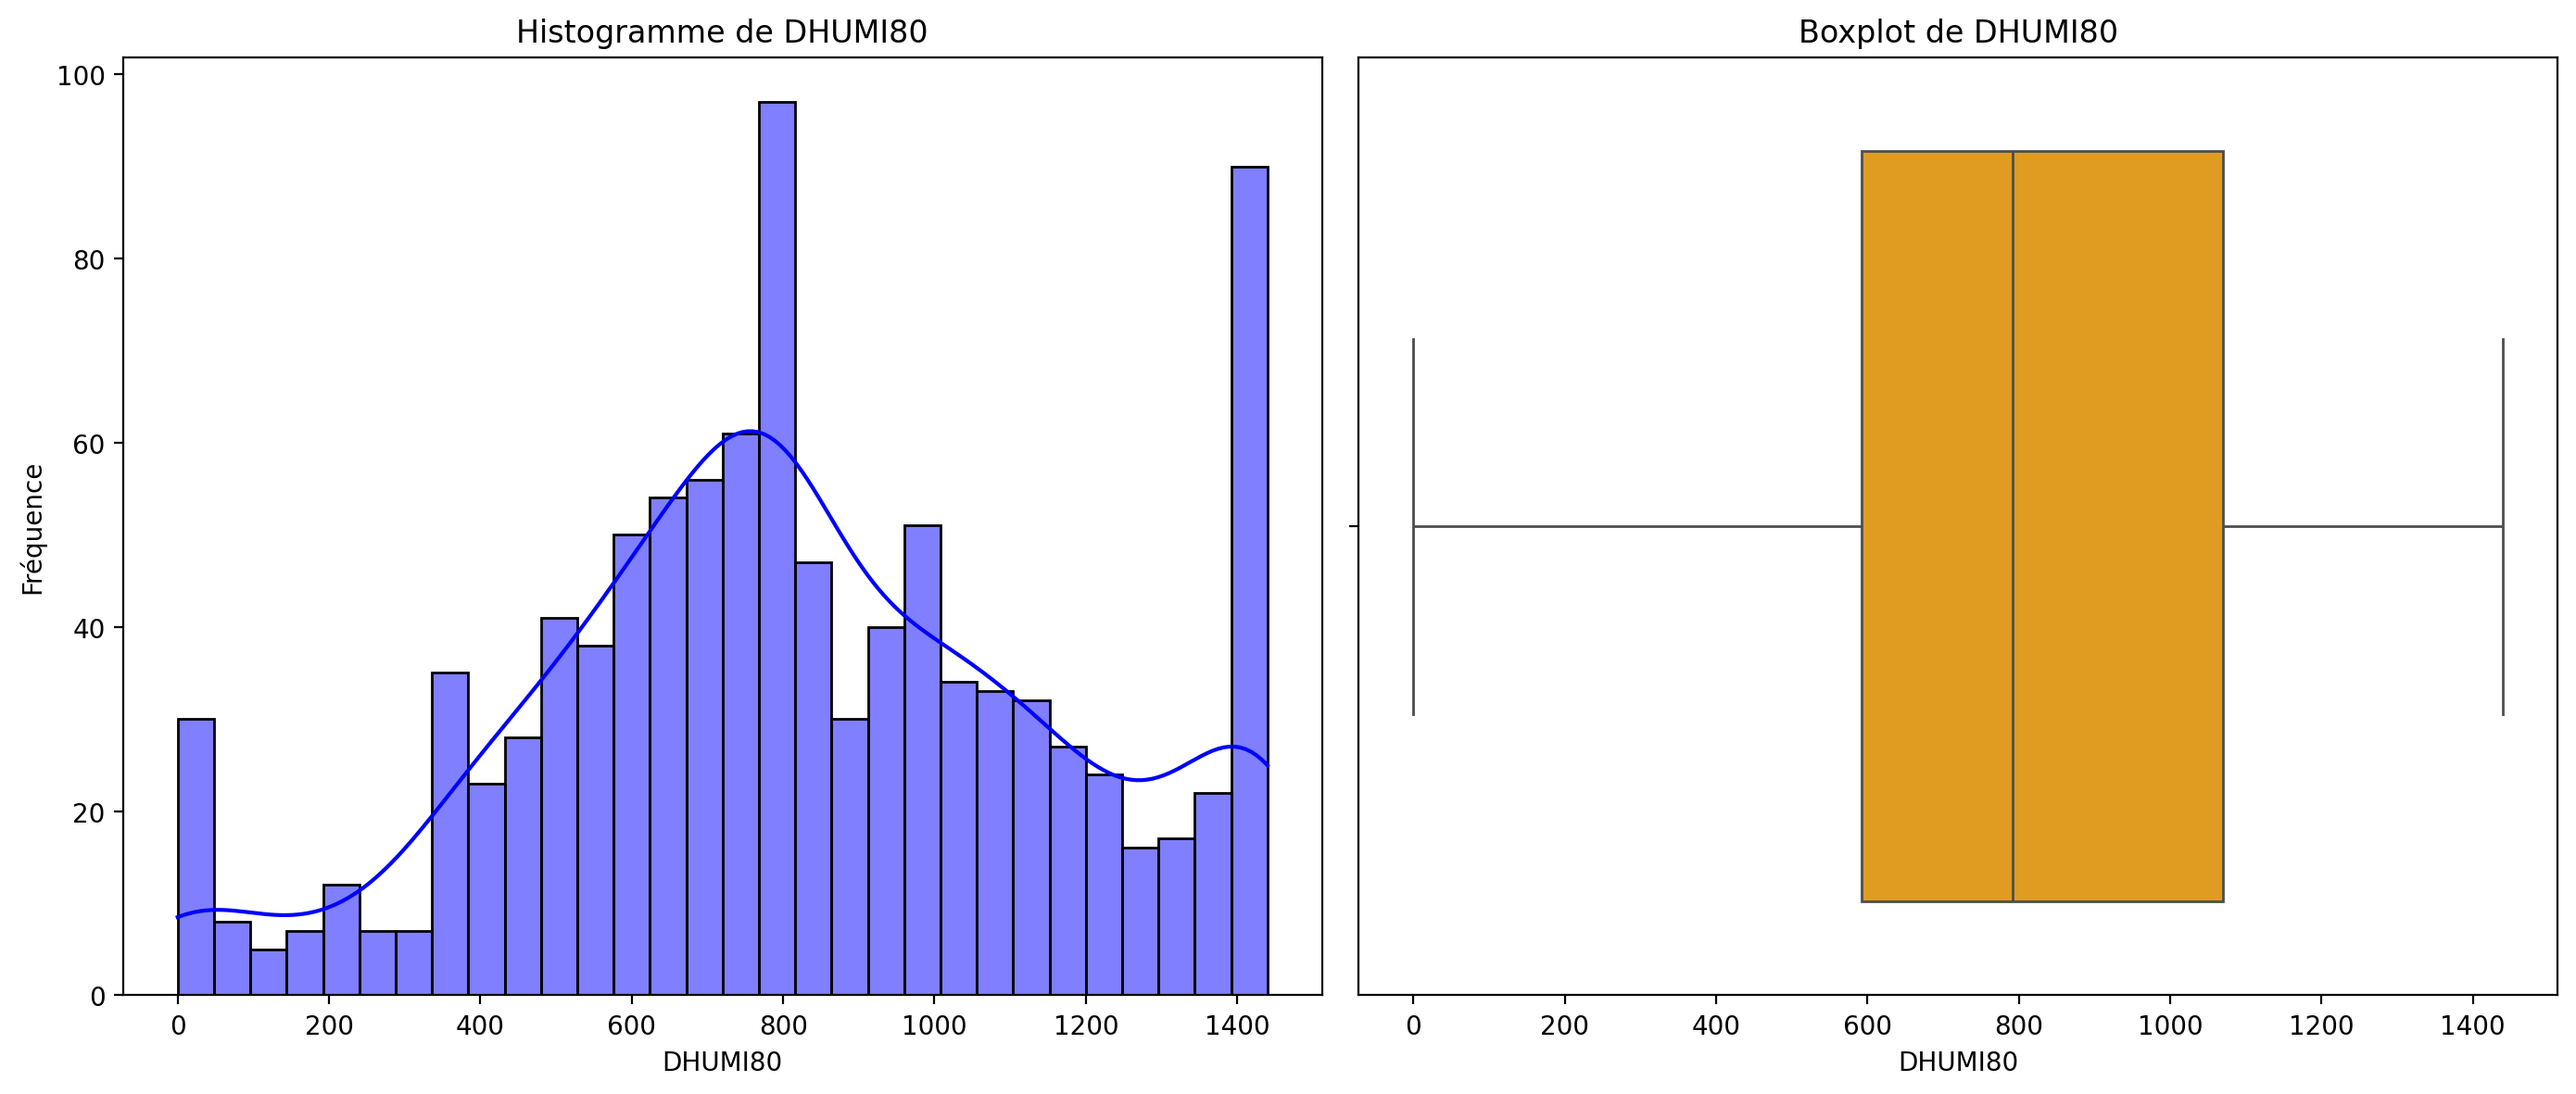

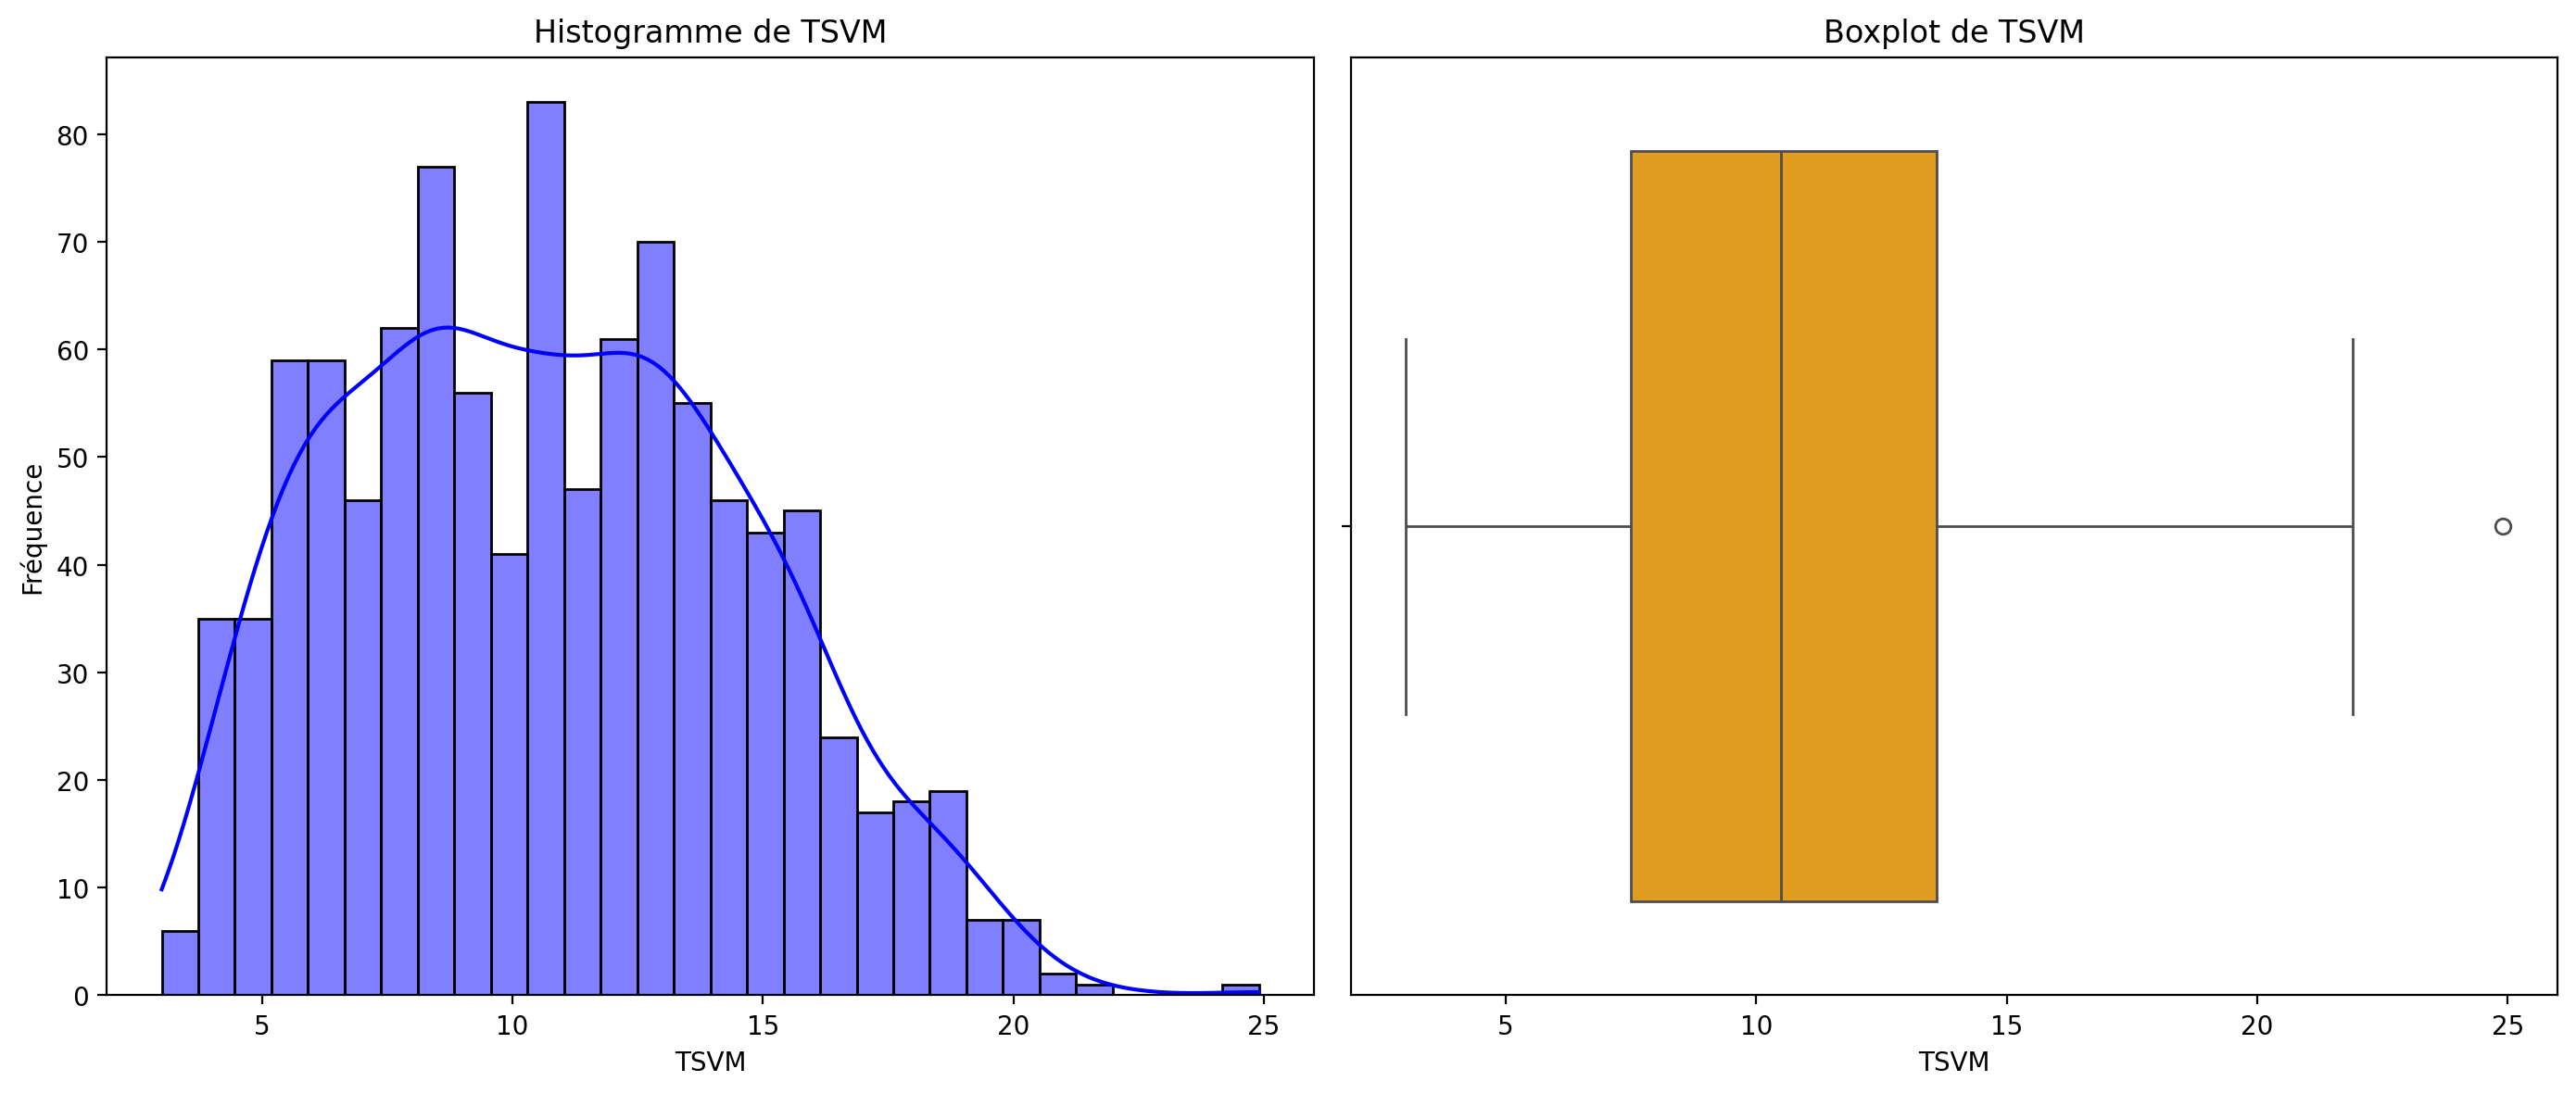

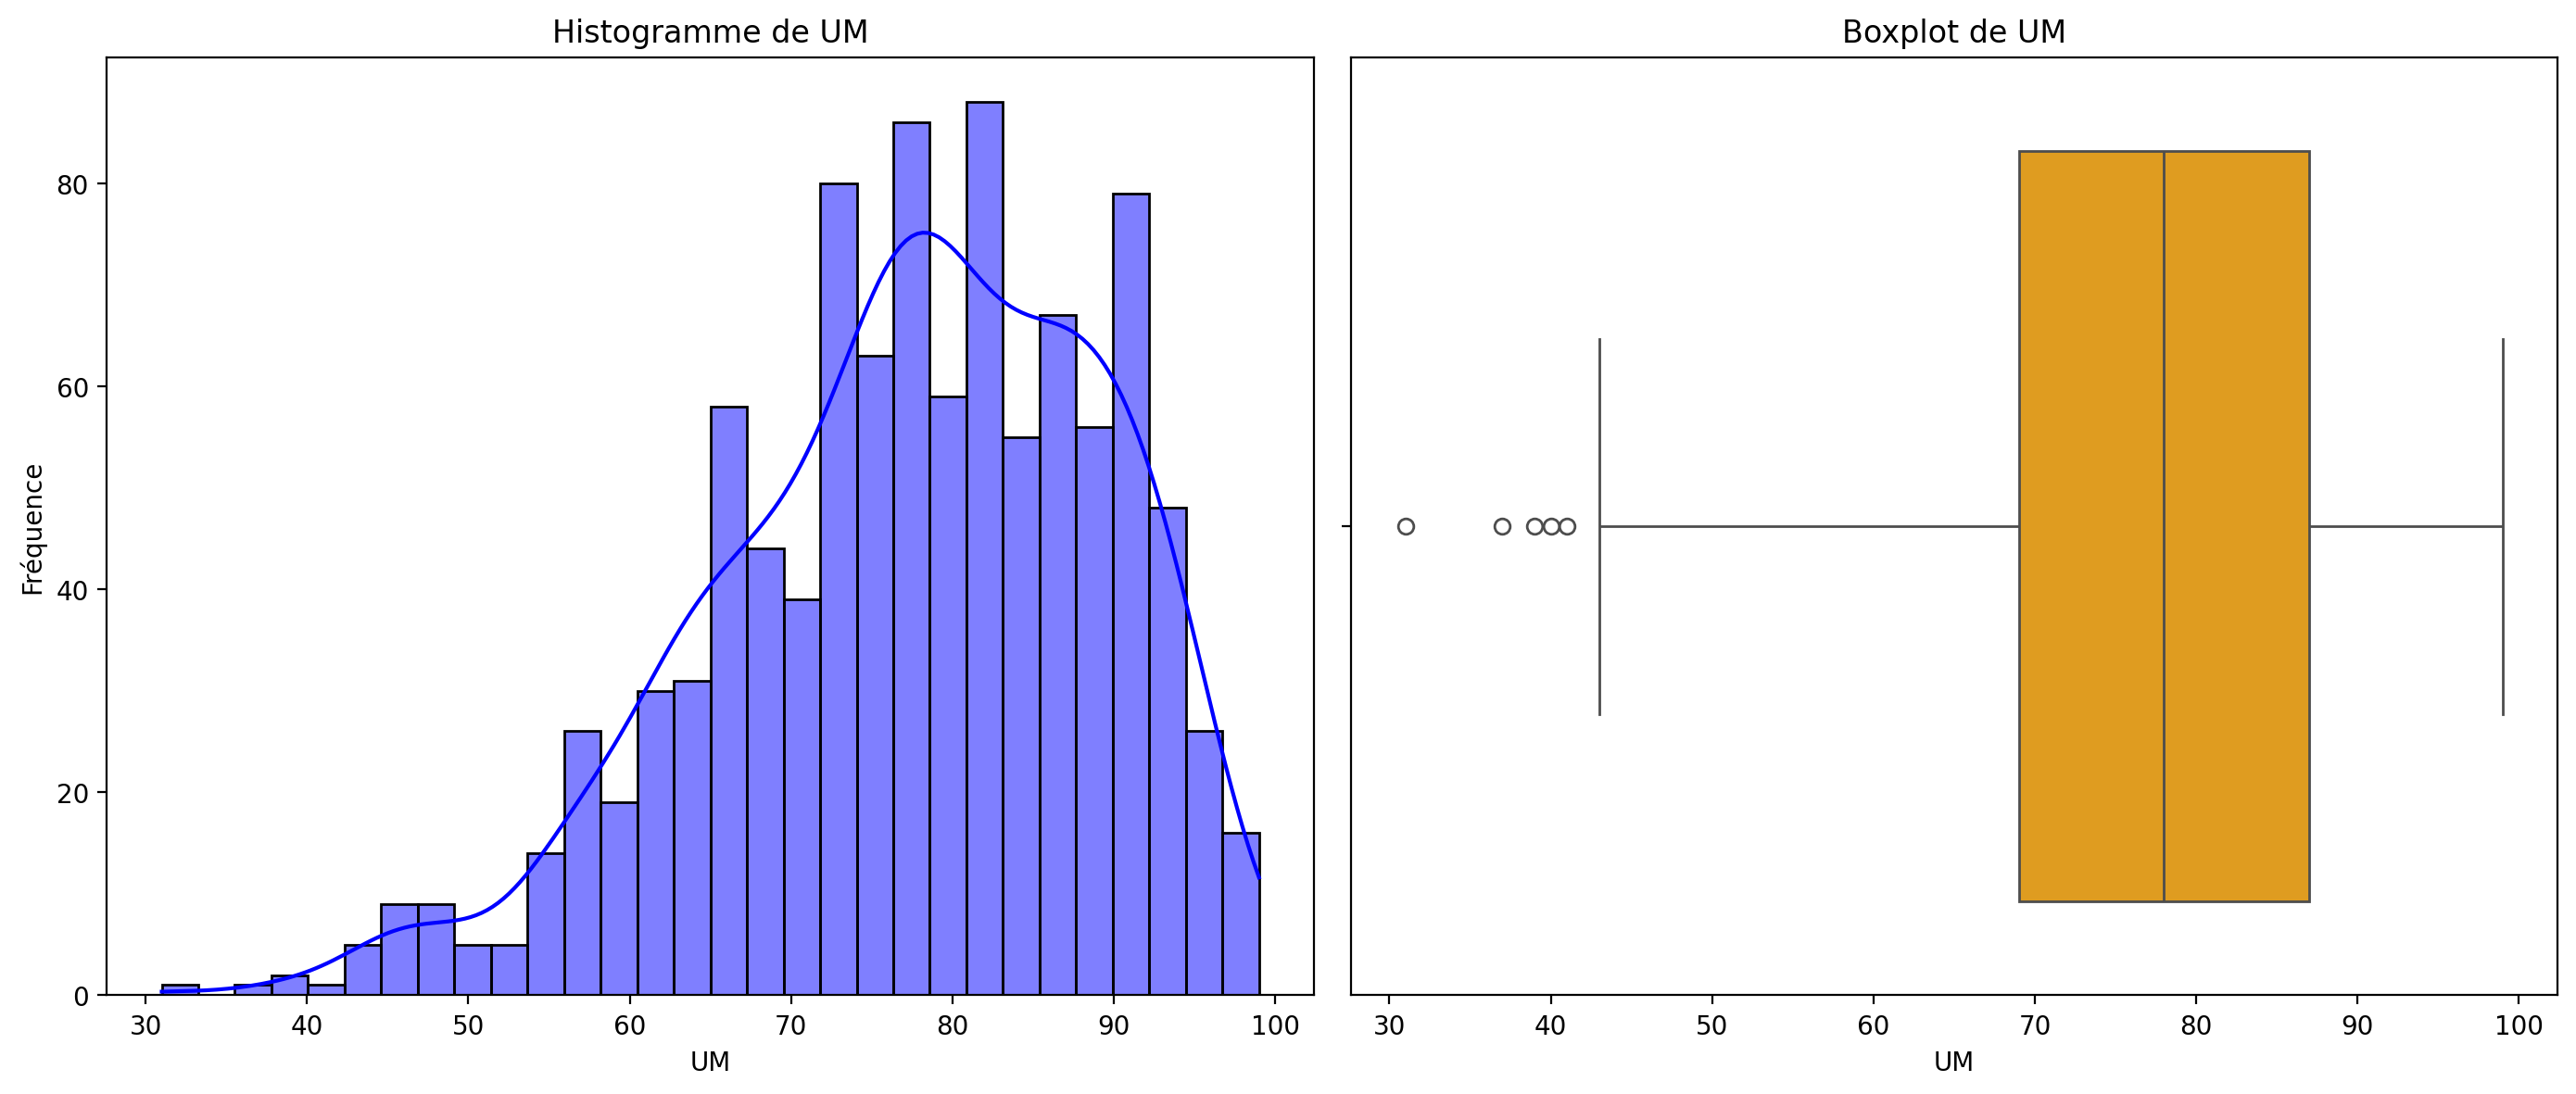

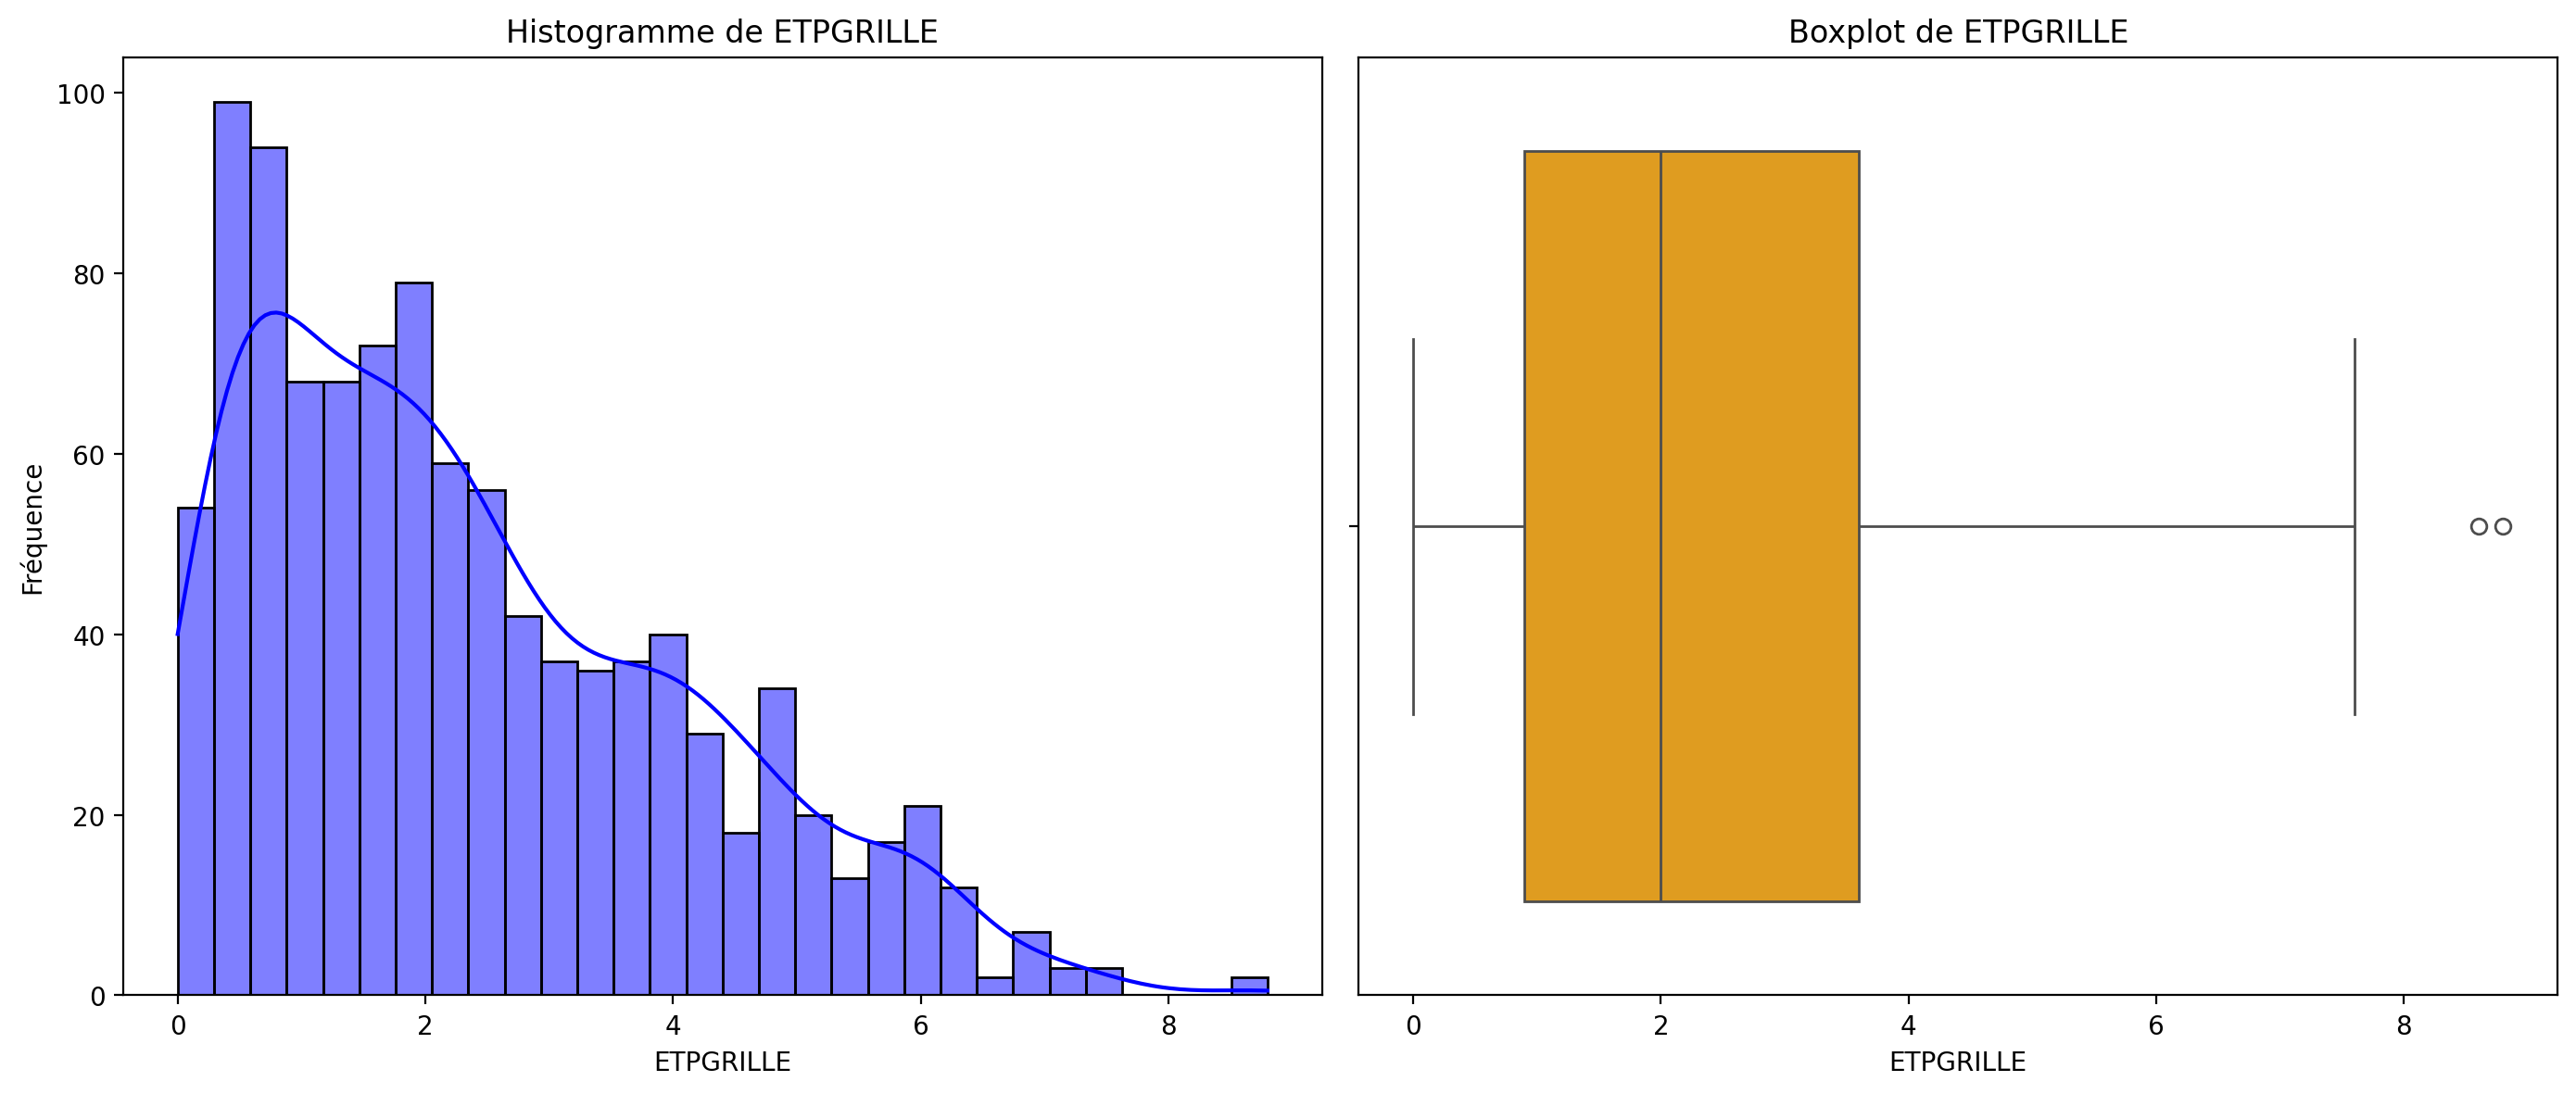

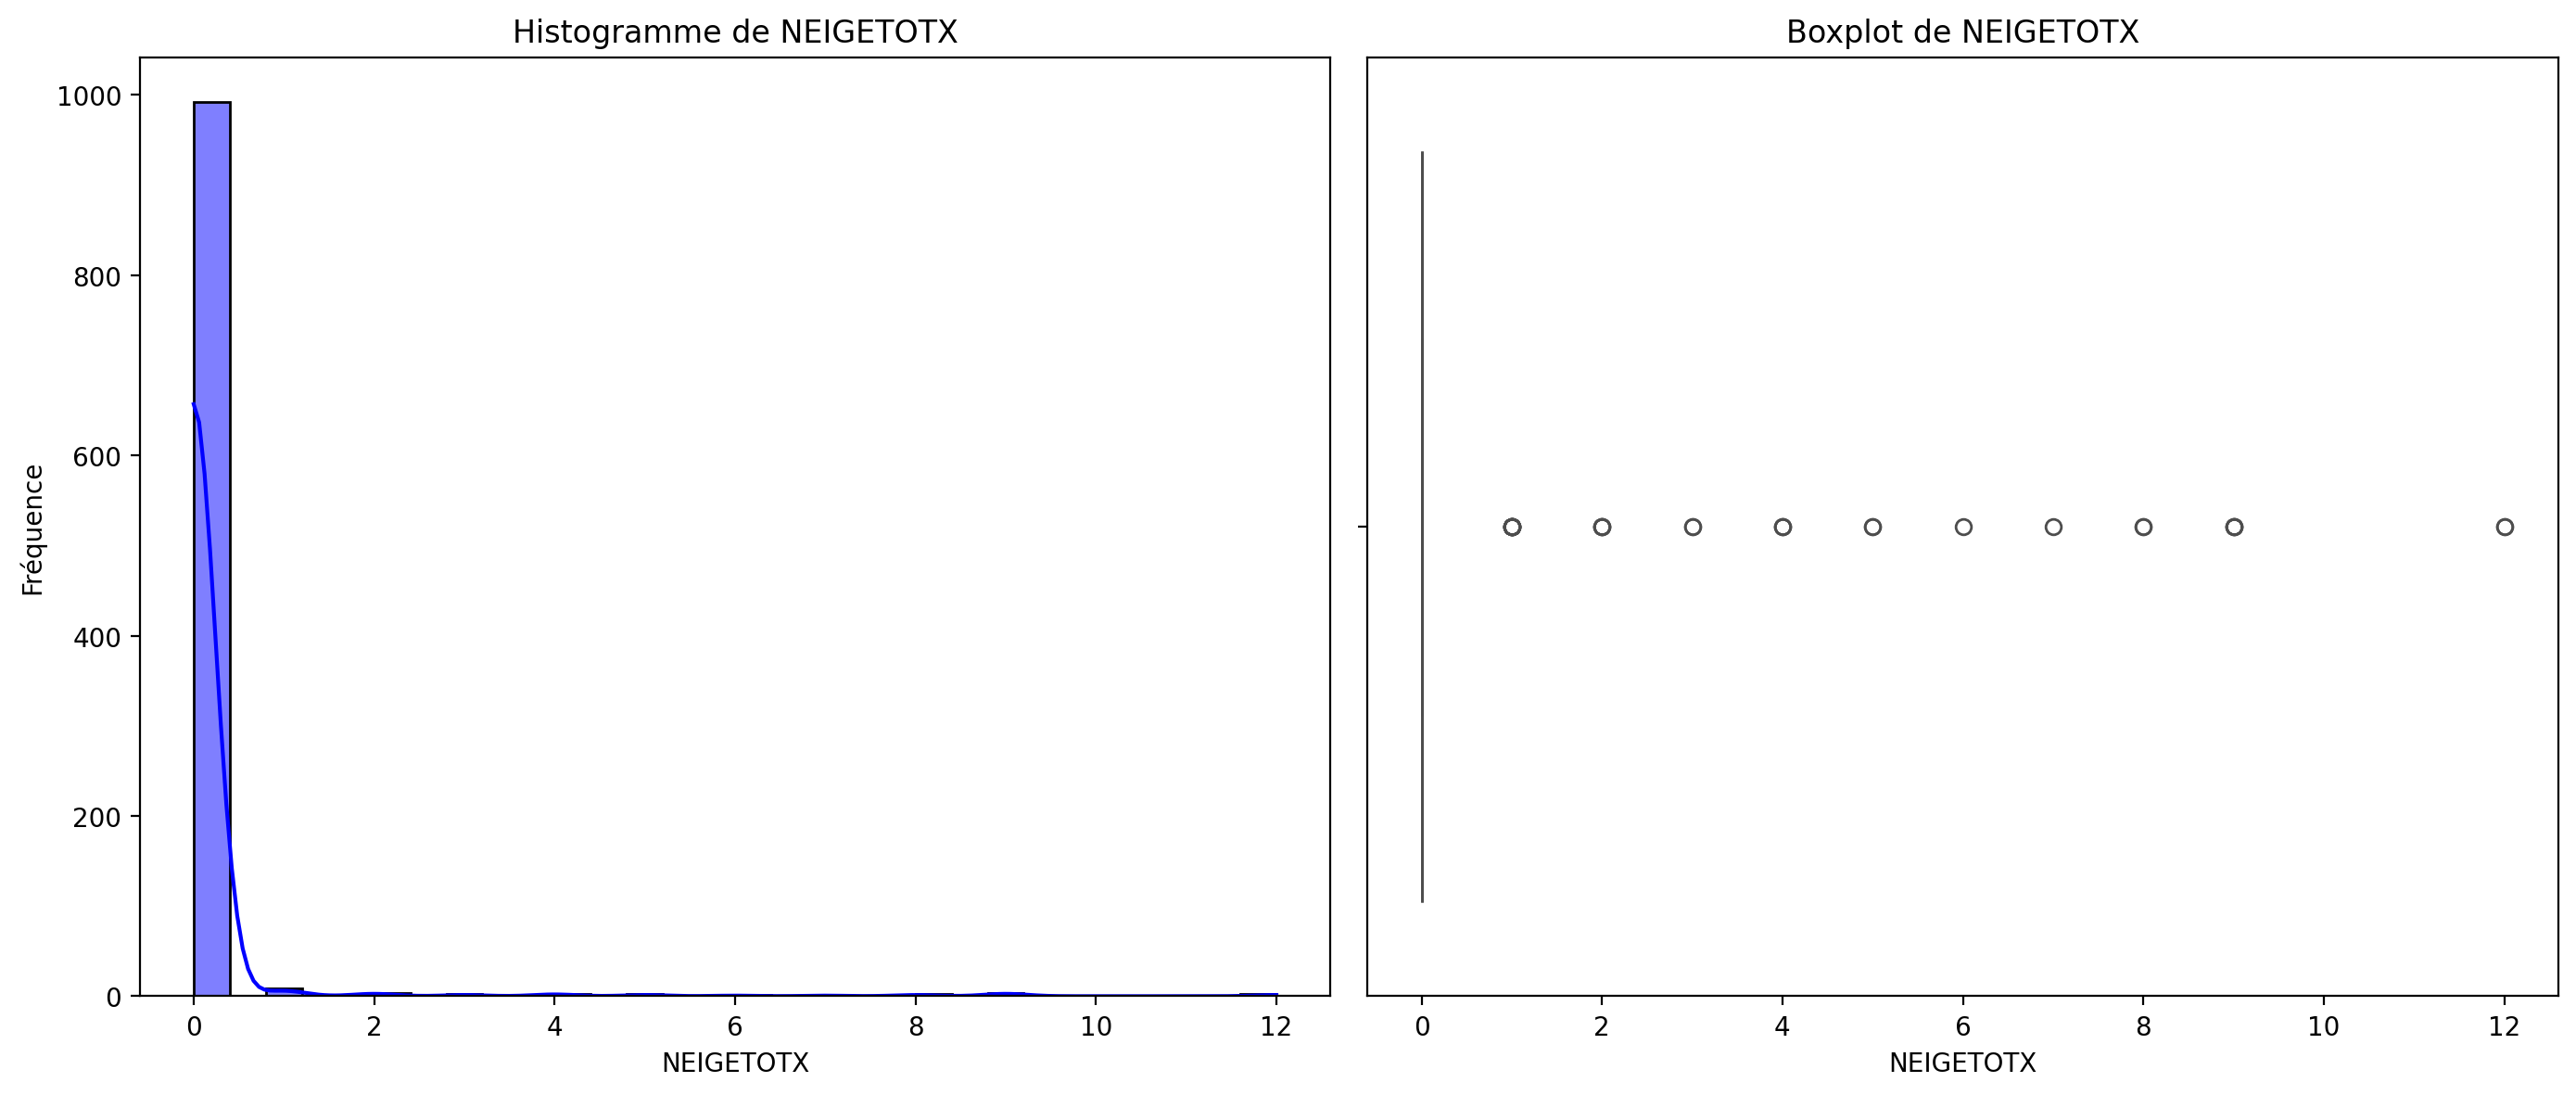

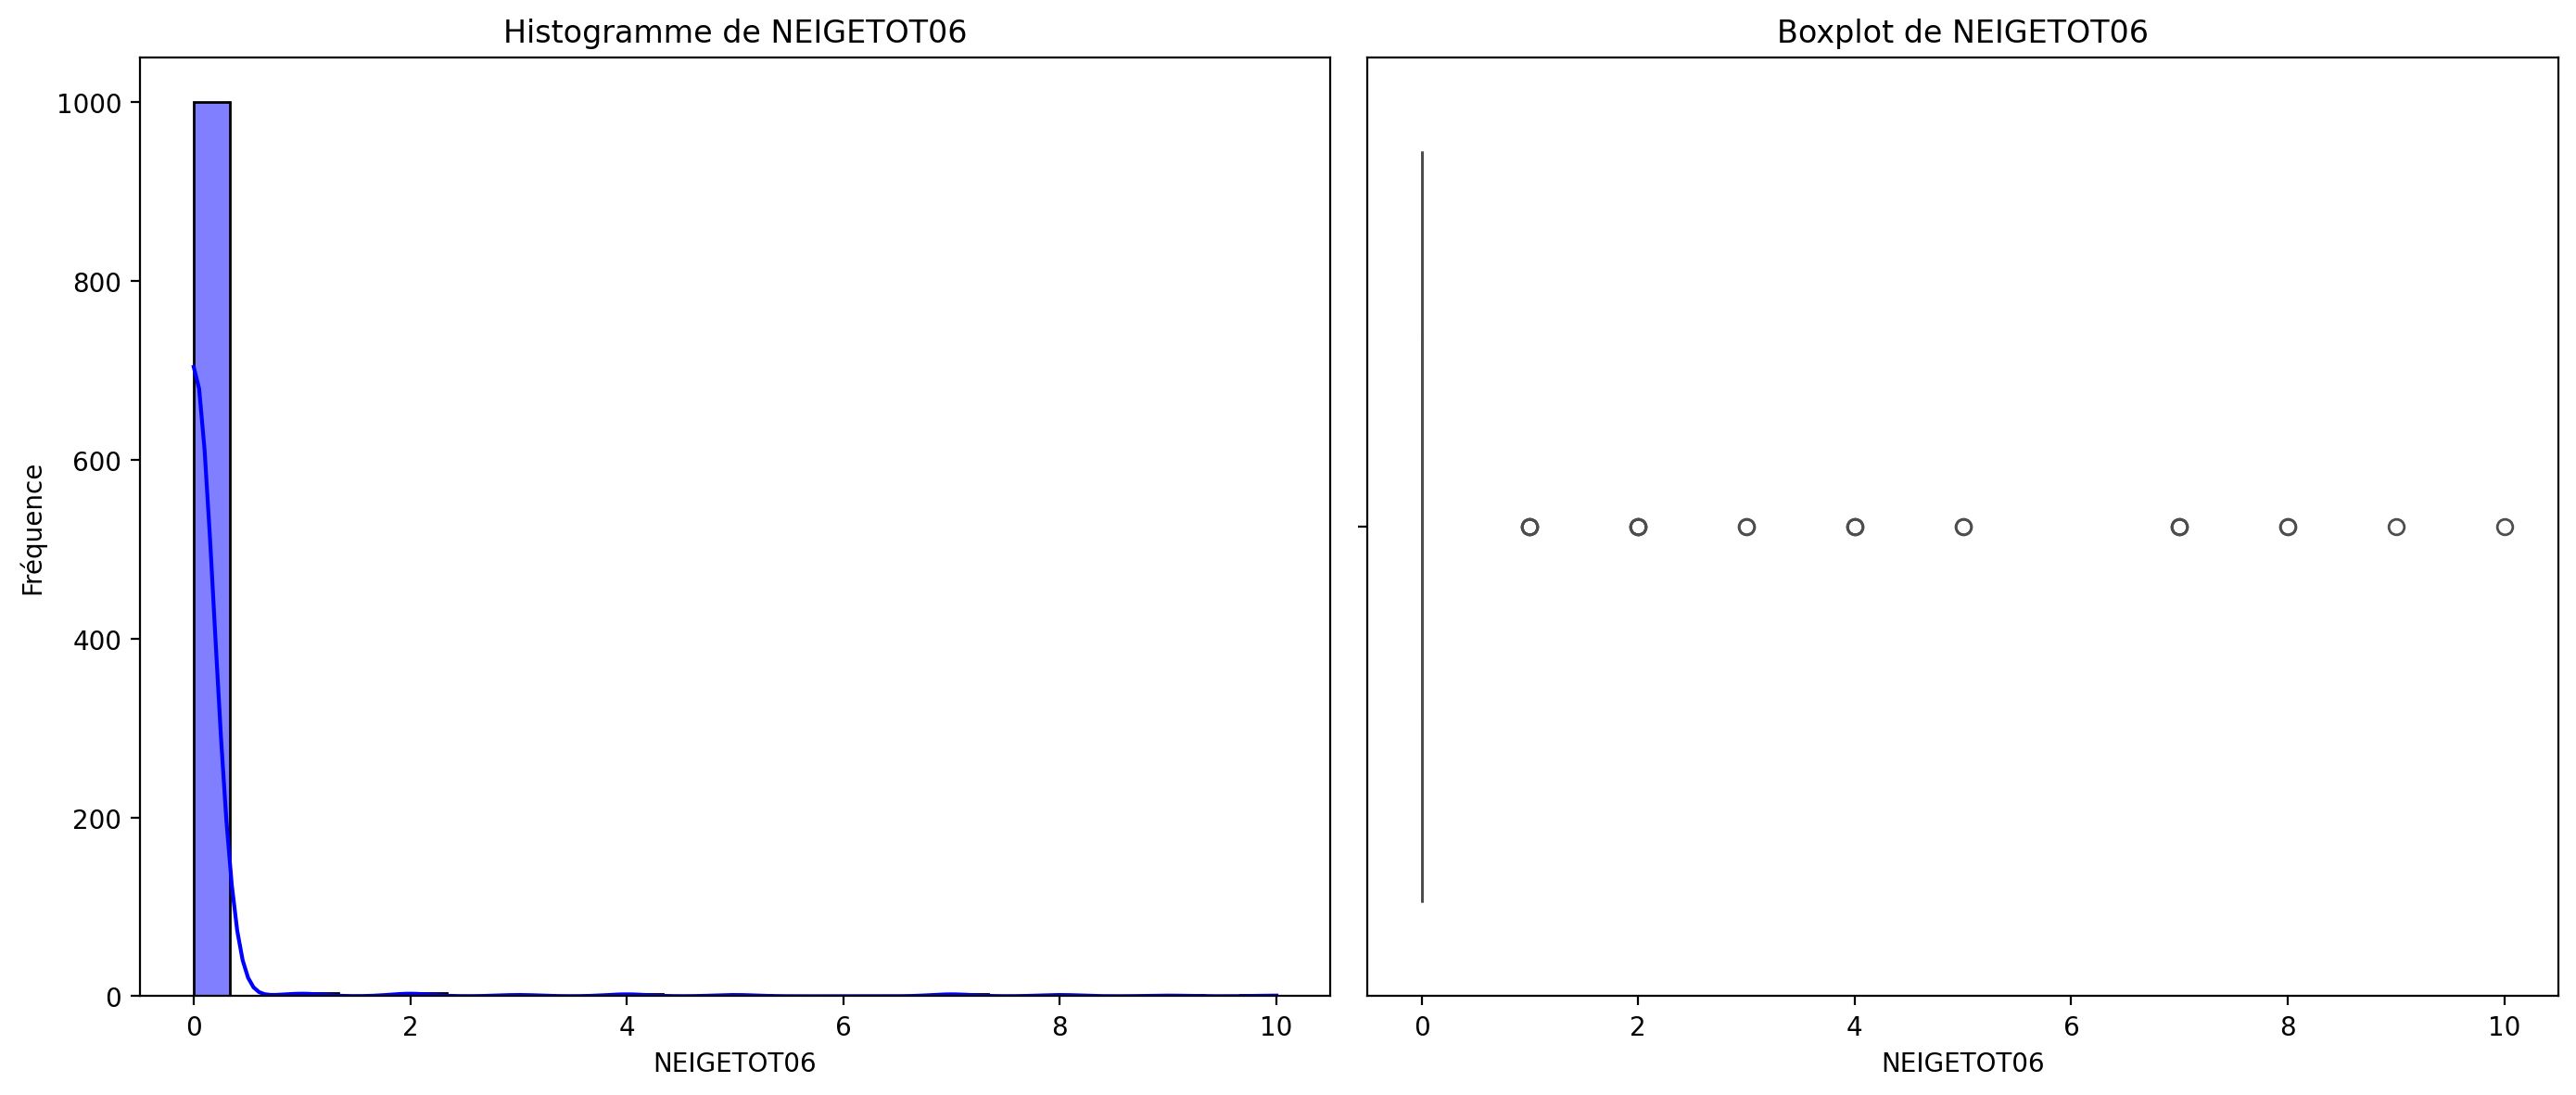

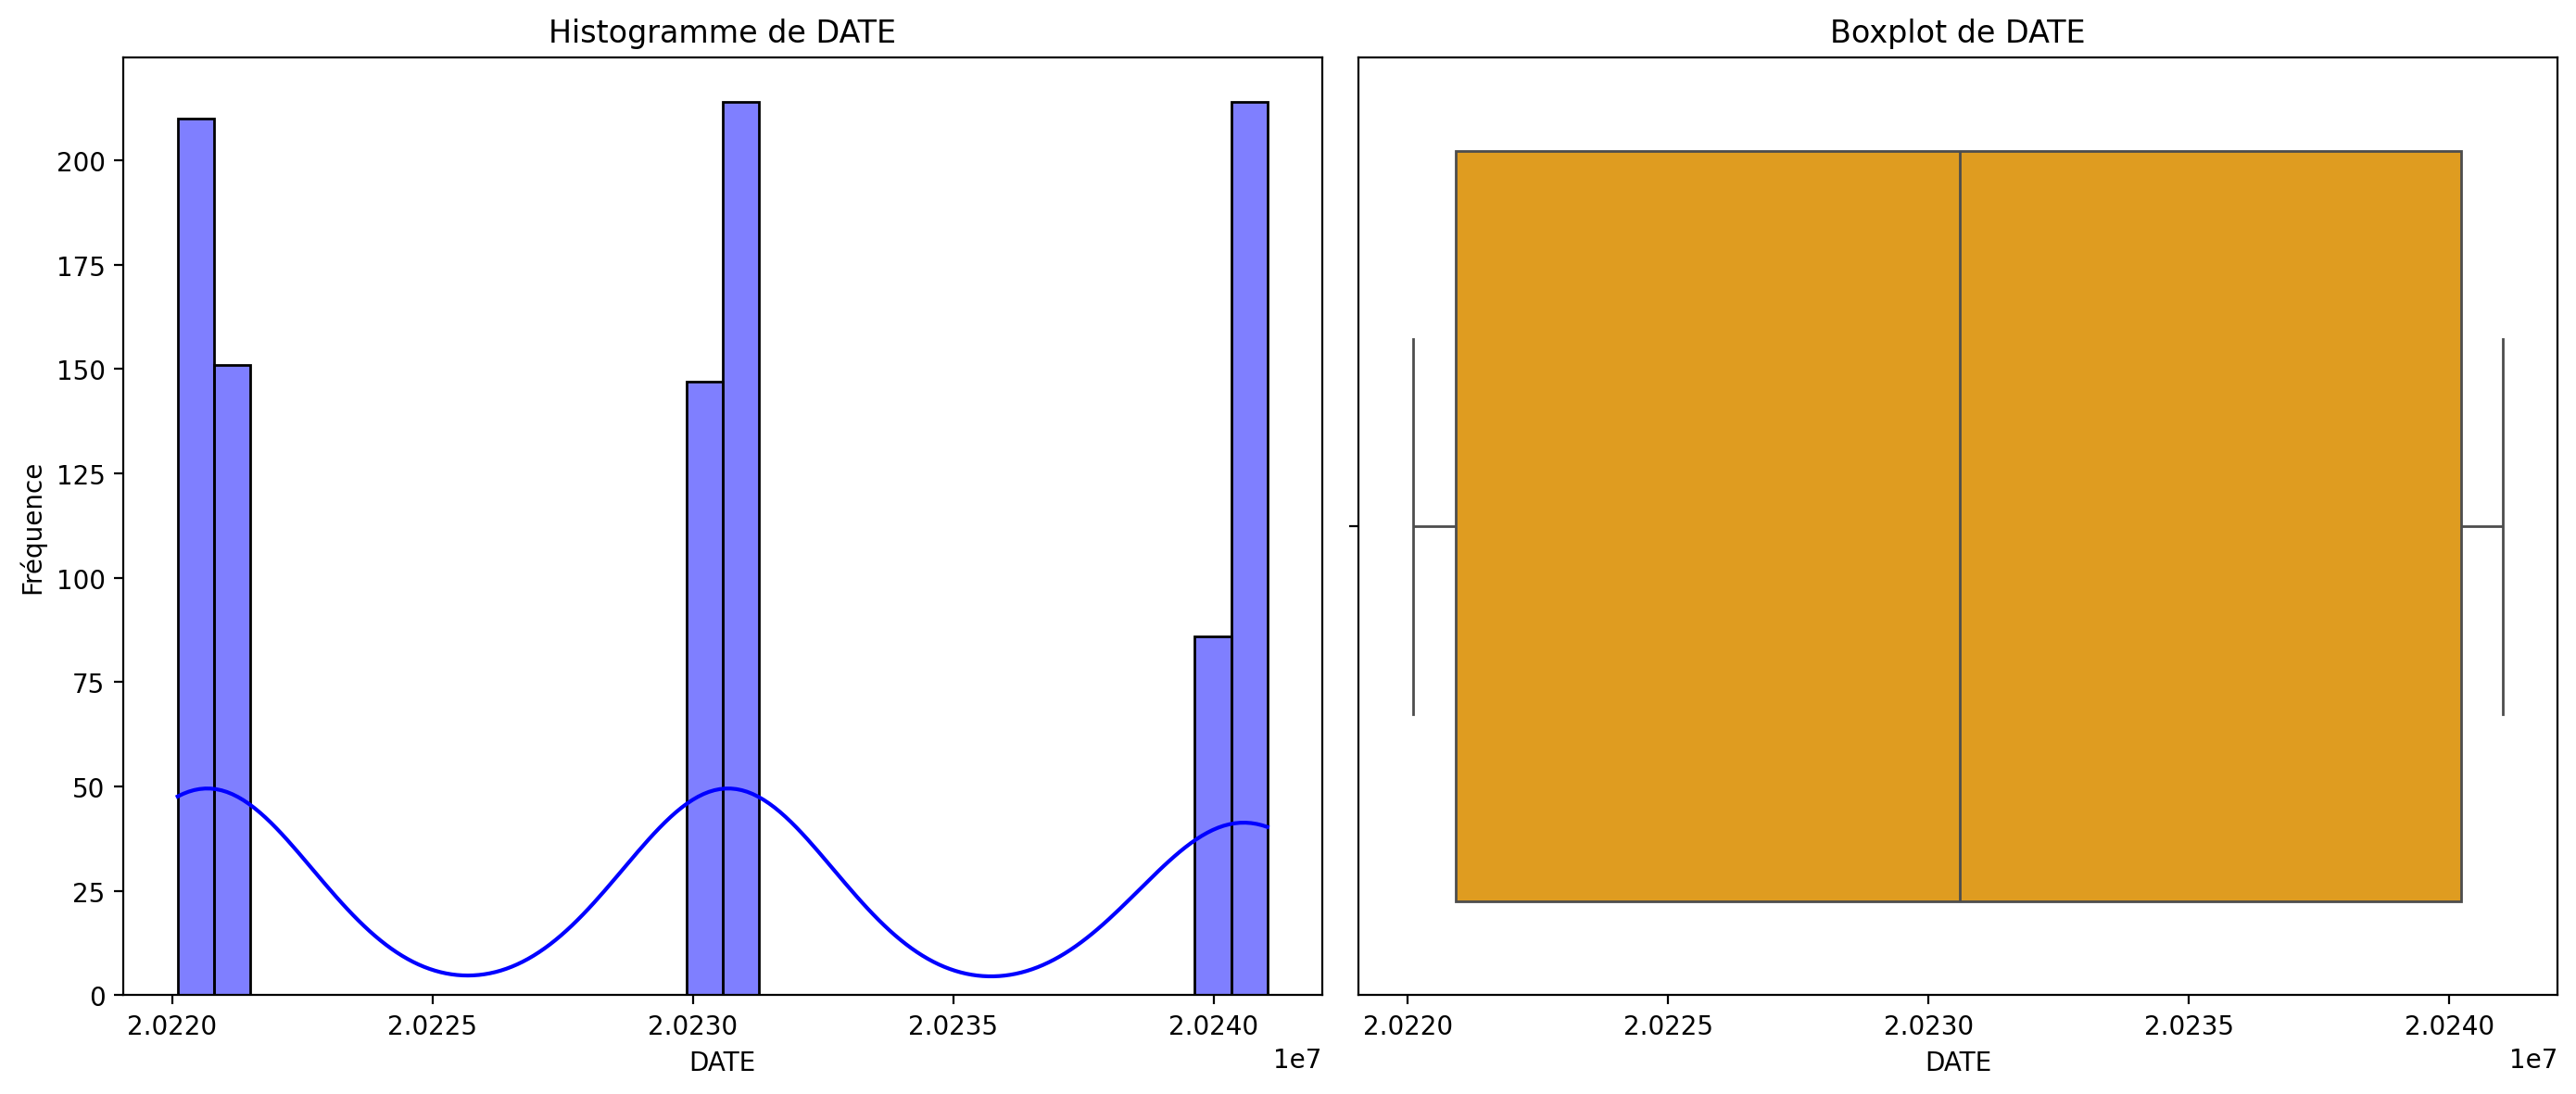

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes et boxplots pour les variables quantitatives
for col in quantitative_columns:
    f.plt.figure(figsize=(14, 6))
    f.plt.subplot(1, 2, 1)
    f.sns.histplot(df_with_missing[col], kde=True, bins=30, color='blue')
    f.plt.title(f'Histogramme de {col}')
    f.plt.xlabel(col)
    f.plt.ylabel('Fréquence')
    
    f.plt.subplot(1, 2, 2)
    f.sns.boxplot(x=df_with_missing[col], color='orange')
    f.plt.title(f'Boxplot de {col}')
    f.plt.xlabel(col)
    f.plt.tight_layout()
    f.plt.show()


Les précipitations (RR) sont majoritairement faibles, avec de rares épisodes intenses, comme le montrent l'asymétrie de l'histogramme et les valeurs extrêmes du boxplot.

La variable TN (température minimale) suit une distribution proche de la normale, avec une symétrie visible dans l'histogramme. Le boxplot montre un léger écart par des valeurs extrêmes à gauche.

La variable HTN (hauteur des précipitations) montre une distribution asymétrique, avec une concentration  autour de 500 et des valeurs élevées isolées. Les outliers sont clairement visibles dans le boxplot.


### 3. Identification des valeurs abbérantes ###

In [26]:
# Identifier les valeurs aberrantes avec la méthode IQR
outliers = {}
for col in quantitative_columns:
    Q1 = df_with_missing[col].quantile(0.25)
    Q3 = df_with_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[col] = df_with_missing[(df_with_missing[col] < lower_bound) | 
                                    (df_with_missing[col] > upper_bound)]
    print(f"{col} - Nombre d'outliers : {len(outliers[col])}")


RR - Nombre d'outliers : 124
TN - Nombre d'outliers : 1
HTN - Nombre d'outliers : 143
TX - Nombre d'outliers : 0
HTX - Nombre d'outliers : 67
TM - Nombre d'outliers : 0
TMNX - Nombre d'outliers : 0
DG - Nombre d'outliers : 240
TAMPLI - Nombre d'outliers : 0
TNTXM - Nombre d'outliers : 0
FFM - Nombre d'outliers : 47
FXI - Nombre d'outliers : 30
DXI - Nombre d'outliers : 0
HXI - Nombre d'outliers : 188
FXY - Nombre d'outliers : 17
DXY - Nombre d'outliers : 20
HXY - Nombre d'outliers : 125
FXI3S - Nombre d'outliers : 31
HXI3S - Nombre d'outliers : 188
UN - Nombre d'outliers : 0
HUN - Nombre d'outliers : 104
UX - Nombre d'outliers : 54
HUX - Nombre d'outliers : 198
DHUMI40 - Nombre d'outliers : 210
DHUMI80 - Nombre d'outliers : 0
TSVM - Nombre d'outliers : 1
UM - Nombre d'outliers : 5
ETPGRILLE - Nombre d'outliers : 2
NEIGETOTX - Nombre d'outliers : 30
NEIGETOT06 - Nombre d'outliers : 22
DATE - Nombre d'outliers : 0


In [27]:
# Initialiser un dictionnaire pour stocker les outliers
outliers = {}

# Initialiser une liste pour les colonnes avec des outliers
columns_with_outliers = []

# Parcours des colonnes quantitatives
for col in quantitative_columns:
    # Calcul des quantiles et de l'IQR
    Q1 = df_with_missing[col].quantile(0.25)
    Q3 = df_with_missing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifier les outliers dans la colonne
    outliers[col] = df_with_missing[(df_with_missing[col] < lower_bound) | 
                                    (df_with_missing[col] > upper_bound)]
    
    # Calcul du nombre d'outliers
    num_outliers = len(outliers[col])
    
    # Si le nombre d'outliers est strictement positif, afficher la colonne
    if num_outliers > 0:
        print(f"{col} - Nombre d'outliers : {num_outliers}")
        columns_with_outliers.append(col)

# Afficher les colonnes avec des outliers
if columns_with_outliers:
    print("\nColonnes avec des outliers :")
    print(columns_with_outliers)
else:
    print("\nAucune colonne avec des outliers.")



RR - Nombre d'outliers : 124
TN - Nombre d'outliers : 1
HTN - Nombre d'outliers : 143
HTX - Nombre d'outliers : 67
DG - Nombre d'outliers : 240
FFM - Nombre d'outliers : 47
FXI - Nombre d'outliers : 30
HXI - Nombre d'outliers : 188
FXY - Nombre d'outliers : 17
DXY - Nombre d'outliers : 20
HXY - Nombre d'outliers : 125
FXI3S - Nombre d'outliers : 31
HXI3S - Nombre d'outliers : 188
HUN - Nombre d'outliers : 104
UX - Nombre d'outliers : 54
HUX - Nombre d'outliers : 198
DHUMI40 - Nombre d'outliers : 210
TSVM - Nombre d'outliers : 1
UM - Nombre d'outliers : 5
ETPGRILLE - Nombre d'outliers : 2
NEIGETOTX - Nombre d'outliers : 30
NEIGETOT06 - Nombre d'outliers : 22

Colonnes avec des outliers :
['RR', 'TN', 'HTN', 'HTX', 'DG', 'FFM', 'FXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'HUN', 'UX', 'HUX', 'DHUMI40', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06']


#### Analyse des Outliers dans les Données Météorologiques ####
L’analyse des valeurs aberrantes (outliers) effectuée à l’aide de la méthode de l’IQR a mis en évidence un nombre considérable d’outliers dans plusieurs variables météorologiques. Ces résultats peuvent être expliqués par les facteurs suivants :

Fluctuations naturelles des phénomènes météorologiques : Les variables météorologiques sont souvent sujettes à des variations extrêmes liées à des événements climatiques rares, comme les vagues de chaleur, les tempêtes, ou les précipitations intenses. Ces phénomènes peuvent générer des valeurs extrêmes qui, bien qu'inhabituelles, sont néanmoins naturelles dans le contexte climatique.

Distributions asymétriques des données : Certaines variables météorologiques peuvent suivre des distributions asymétriques où une majorité des observations se situe autour de certaines valeurs moyennes, tandis que quelques observations extrêmes correspondent à des événements extrêmes (par exemple, une température ou un taux d'humidité exceptionnellement élevé ou bas). Dans ce cas, l’IQR peut classer ces événements comme des outliers, même s'ils sont cohérents avec des phénomènes météorologiques exceptionnels.

Événements météorologiques extrêmes : Certaines variables peuvent être influencées par des événements climatiques extrêmes tels que des canicules, des vagues de froid, ou des phénomènes météorologiques extrêmes (comme des cyclones ou des tempêtes violentes). Ces événements sont rares, mais peuvent générer des valeurs anormales dans les données, ce qui les fait apparaître comme des outliers.

Erreurs de saisie ou de mesure : Comme pour toute collecte de données, des erreurs peuvent survenir lors de l'enregistrement des données météorologiques, notamment en raison de dysfonctionnements des instruments de mesure ou d’erreurs humaines. Par exemple, des capteurs mal calibrés peuvent produire des valeurs aberrantes.

Caractéristiques spécifiques des données météorologiques : Les variables météorologiques, telles que l'humidité, la température, ou les précipitations, peuvent être affectées par des phénomènes locaux ou saisonniers (par exemple, une hausse soudaine des températures en été ou un excédent de pluie lors d'une tempête). De tels événements peuvent être considérés comme des outliers dans le cadre de l’IQR, mais ils correspondent à des réalités climatiques spécifiques.

En conclusion, les outliers identifiés dans les données météorologiques sont probablement le reflet de phénomènes naturels et exceptionnels, caractéristiques du climat et de la variabilité météorologique.

 Toutefois, il est essentiel de les analyser plus en détail pour déterminer s'ils correspondent à des événements climatiques spécifiques ou s'ils sont dus à des erreurs de saisie ou de mesure. Une analyse plus approfondie de chaque valeur aberrante permettra de prendre des décisions éclairées sur leur traitement et leur intégration dans les modèles climatiques.

 Puisque nous ne sommes pas dans la cadre des travaux purement météorologiques, alors nous allons conserver ces variables telles qu'elles et continuer notre analyse.

## 4. Etude des corrélations entre les variables ##

In [28]:
# Créer le nouveau vecteur sans "DATE"
new_quant_var = [col for col in quant_var if col != "DATE"]

# Affichage du résultat
print(new_quant_var)


['RR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'DG', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY', 'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80', 'TSVM', 'UM', 'ETPGRILLE', 'NEIGETOTX', 'NEIGETOT06']


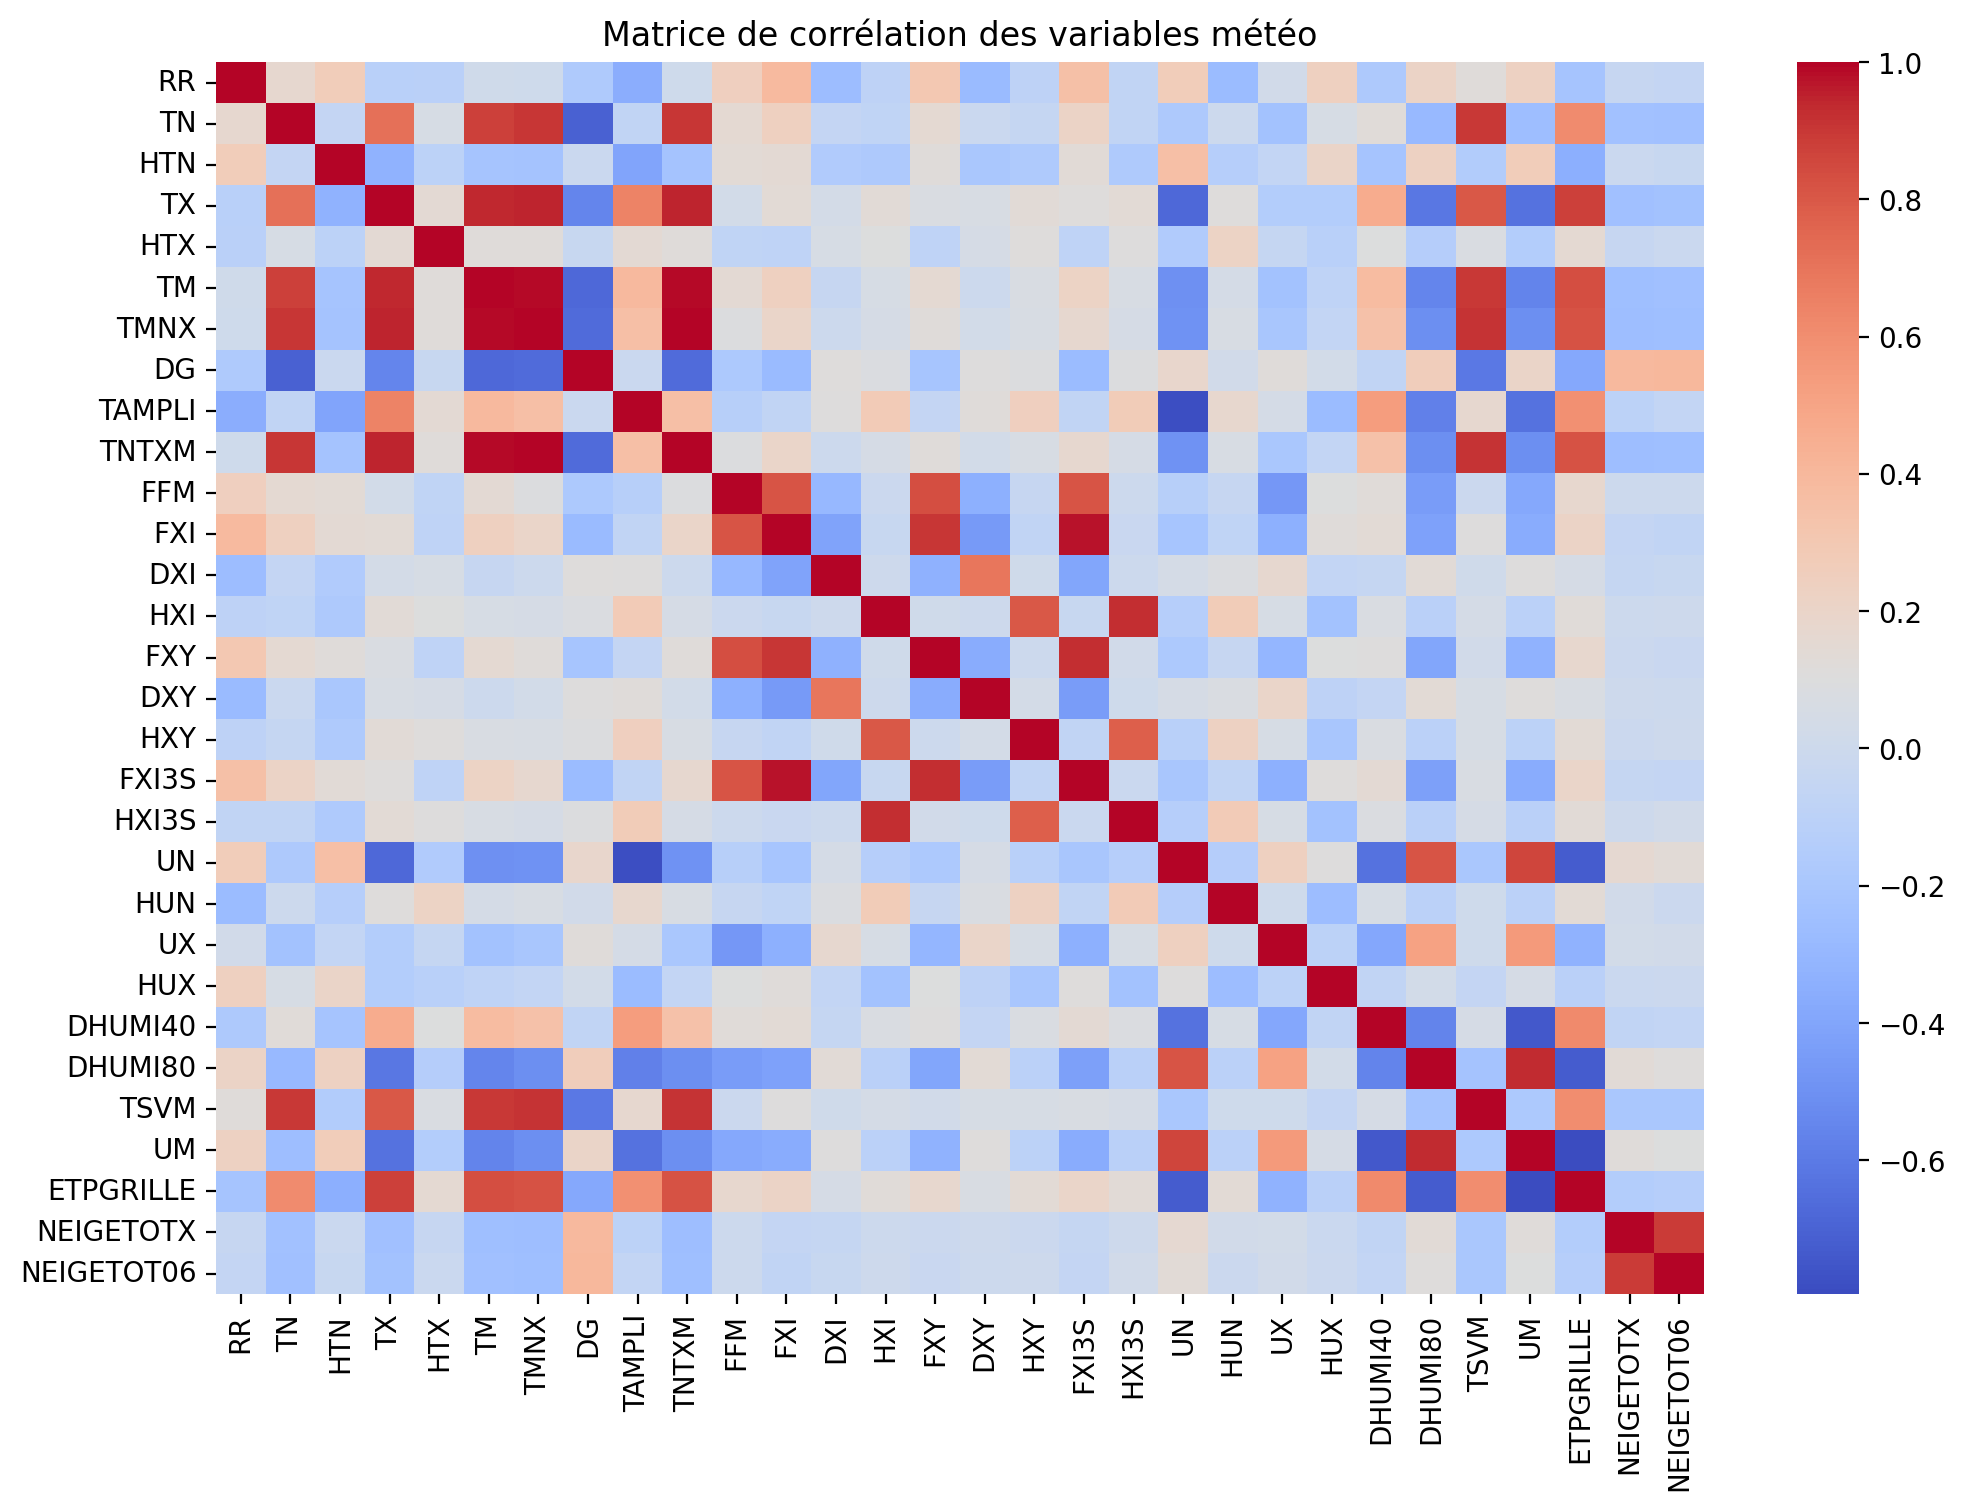

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matrice de corrélation
corr_matrix = df_with_missing[new_quant_var].corr()

# Heatmap des corrélations sans annotations numériques
f.plt.figure(figsize=(12, 8))
f.sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)  # annot=False pour enlever les nombres
f.plt.title("Matrice de corrélation des variables météo")
f.plt.show()


phgfhg

In [30]:
print("hello")

hello
